# **Strategic Zomato Data Insights to Shape a HORECA Venture**

#**Project Overview**

This notebook aims to extract strategic, data-driven insights from the Zomato dataset to support the launch of a new venture in the HORECA (Hotels, Restaurants, and Cafés) sector. The analysis focuses on identifying key opportunities and success factors across three critical dimensions — category (cuisine type), market (city or location), and channel (dining vs. delivery).

Through detailed exploration and visualization of market trends, customer preferences, pricing patterns, and restaurant performance indicators, this project seeks to uncover actionable intelligence that can guide the startup’s strategic decisions. The ultimate goal is to define an evidence-based roadmap for entering and scaling in the highly competitive food service industry.


---

# **About The Dataset**

The dataset offers a comprehensive snapshot of restaurants listed on **Zomato**, capturing key details about their performance, customer feedback, pricing, and popularity across various cities and cuisines. It provides valuable insights into market trends and consumer preferences, serving as a foundation for data-driven strategic analysis in the food service industry.


---



#**Restaurant Information**

**Restaurant_Name :** Name of the restaurant listed on Zomato.

**Cuisine :** Type of cuisine served (e.g., Fast Food, Chinese).

**Place_Name :** Local area or neighborhood of the restaurant.

**City :** City in which the restaurant is located.

**Restaurant_Popularity :** Number of items listed by the restaurant in the dataset.


---



#**Menu Item Attributes**

**Item_Name :** Name of the menu item listed.

**Best_Seller :** Bestseller status (e.g., BESTSELLER, MUST TRY, NONE).

**Is_Bestseller :** Binary flag indicating if item is marked as a bestseller.


---



#**Customer Feedback & Ratings**

**Dining_Rating :** User rating for the dine-in experience (0.0 to 5.0).

**Delivery_Rating :** User rating for the delivery experience (0.0 to 5.0).

**Dining_Votes :** Number of votes received for dine-in service.

**Delivery_Votes :** Number of votes received for delivery service.

**Votes :** Combined total votes received.

**Average_Rating :** Mean rating calculated from available sources.

**Total_Votes :** Sum of all types of votes.

**Is_Highly_Rated :** Binary flag for ratings ≥ 4.0.

**Avg_Rating_Restaurant :** Average rating of all items from the same restaurant.

**Avg_Rating_Cuisine :** Average rating across all restaurants serving the same cuisine.

**Avg_Rating_City :** Average rating across all restaurants in the same city.


---



#**Pricing & Value Indicators**

**Prices :** Price of the menu item in INR.

**Price_per_Vote :** Ratio of price to total votes (used to evaluate value for money).

**Log_Price :** Log-transformed price to reduce skewness in analysis.

**Avg_Price_Restaurant :** Average price of all items from the same restaurant.

**Avg_Price_Cuisine :** Average price across all restaurants serving the same cuisine.

**Avg_Price_City :** Average price of menu items in the same city.

**Is_Expensive :** Binary flag for prices above city’s average.


---



#**Notebook Structure**

1.   Importing Necessary Libraries.

1.   Importing The Datasets.

1.   Visualizing The Dataset.

1.   Important Pre-computation/Cleaning.

1.   Segregation Of Features.

1.   Exploratory Data Analysis - Univariate Analysis of Numerical Variables.

2.   Exploratory Data Analysis - Univariate Analysis of Categorical Variables.

2.   Exploratory Data Analysis - Bivariate Analysis.

2.   Exploratory Data Analysis - Multivariate Analysis.

2.   Exploratory Data Analysis - Some Hypothetical Analysis

2.   Exploratory Data Analysis - Top N & Bottom N Analysis.

1.   Final Recommendation

# **1. Importing Necessary Libraries**

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from textwrap import wrap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **2. Importing The Datasets**

In [277]:
zomato = pd.read_csv('Zomato Dataset.csv')
data_description = pd.read_excel('zomato_dataset_data_description.xlsx')

# **3. Visualizing The Dataset**

In [278]:
data_description

Column Name                                        Description
0         Restaurant_Name           Name of the restaurant listed on Zomato.
1           Dining_Rating  User rating for the dine-in experience (0.0 to...
2         Delivery_Rating  User rating for the delivery experience (0.0 t...
3            Dining_Votes      Number of votes received for dine-in service.
4          Delivery_Votes     Number of votes received for delivery service.
5                 Cuisine  Type of cuisine served (e.g., Fast Food, Chine...
6              Place_Name      Local area or neighborhood of the restaurant.
7                    City           City in which the restaurant is located.
8               Item_Name                      Name of the menu item listed.
9             Best_Seller  Bestseller status (e.g., BESTSELLER, MUST TRY,...
10                  Votes                     Combined total votes received.
11                 Prices                     Price of the menu item in INR.
12         Average_Rating     Mean rating calculated from available sources.
13            Total_Votes                         Sum of all types of votes.
14         Price_per_Vote  Ratio of price to total votes (used to evaluat...
15              Log_Price  Log-transformed price to reduce skewness in an...
16          Is_Bestseller  Binary flag indicating if item is marked as a ...
17  Restaurant_Popularity  Number of items listed by the restaurant in th...
18  Avg_Rating_Restaurant  Average rating of all items from the same rest...
19   Avg_Price_Restaurant  Average price of all items from the same resta...
20     Avg_Rating_Cuisine  Average rating across all restaurants serving ...
21      Avg_Price_Cuisine  Average price across all restaurants serving t...
22        Avg_Rating_City  Average rating across all restaurants in the s...
23         Avg_Price_City      Average price of menu items in the same city.
24        Is_Highly_Rated                     Binary flag for ratings ≥ 4.0.
25           Is_Expensive       Binary flag for prices above city’s average.

In [279]:
zomato.shape

(123657, 26)

In [280]:
# Top 5 rows
zomato.head()

Restaurant_Name  Dining_Rating  Delivery_Rating  Dining_Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery_Votes    Cuisine Place_Name        City                 Item_Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best_Seller  ...  Is_Bestseller  Restaurant_Popularity  \
0  BESTSELLER  ...              1                     46   
1  BESTSELLER  ...              1                     46   
2        NONE  ...              1                     46   
3  BESTSELLER  ...              1                     46   
4    MUST TRY  ...              1                     46   

   Avg_Rating_Restaurant  Avg_Price_Restaurant  Avg_Rating_Cuisine  \
0                   4.05            171.347826             3.81868   
1                   4.05            171.347826             3.81868   
2                   4.05            171.347826             3.81868   
3                   4.05            171.347826             3.81868   
4                   4.05            171.347826             3.81868   

   Avg_Price_Cuisine  Avg_Rating_City  Avg_Price_City  Is_Highly_Rated  \
0         255.954894         3.939031      245.130482                1   
1         255.954894         3.939031      245.130482                1   
2         255.954894         3.939031      245.130482                1   
3         255.954894         3.939031      245.130482                1   
4         255.954894         3.939031      245.130482                1   

   Is_Expensive  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 26 columns]

In [281]:
# Bottom 5 rows
zomato.tail()

Restaurant_Name  Dining_Rating  Delivery_Rating  Dining_Votes  \
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery_Votes Cuisine Place_Name     City              Item_Name  \
123652             523   Pizza     Purena   Raipur     Murgh Reshmi Kebab   
123653             523   Pizza     Purena   Raipur      Murgh Large Tikka   
123654             523   Pizza     Purena   Raipur  Murgh Chukandri Tikka   
123655             523   Pizza     Purena   Raipur     Murgh Golden Kebab   
123656             523   Pizza     Purena   Raipur     Gosht Gilawat Chop   

       Best_Seller  ...  Is_Bestseller  Restaurant_Popularity  \
123652        NONE  ...              1                    286   
123653        NONE  ...              1                    286   
123654        NONE  ...              1                    286   
123655        NONE  ...              1                    286   
123656  BESTSELLER  ...              1                    286   

        Avg_Rating_Restaurant  Avg_Price_Restaurant  Avg_Rating_Cuisine  \
123652                   4.05            354.475525            3.885698   
123653                   4.05            354.475525            3.885698   
123654                   4.05            354.475525            3.885698   
123655                   4.05            354.475525            3.885698   
123656                   4.05            354.475525            3.885698   

        Avg_Price_Cuisine  Avg_Rating_City  Avg_Price_City  Is_Highly_Rated  \
123652         208.939511         3.880503      194.591645                1   
123653         208.939511         3.880503      194.591645                1   
123654         208.939511         3.880503      194.591645                1   
123655         208.939511         3.880503      194.591645                1   
123656         208.939511         3.880503      194.591645                1   

        Is_Expensive  
123652             1  
123653             1  
123654             1  
123655             1  
123656             1  

[5 rows x 26 columns]

In [282]:
# Complete details(columns) of 1st row
zomato.head(1).T

0
Restaurant_Name                 Doner King
Dining_Rating                          3.9
Delivery_Rating                        4.2
Dining_Votes                            39
Delivery_Votes                           0
Cuisine                          Fast Food
Place_Name                        Malakpet
City                             Hyderabad
Item_Name              Platter Kebab Combo
Best_Seller                     BESTSELLER
Votes                                   84
Prices                               249.0
Average_Rating                        4.05
Total_Votes                             39
Price_per_Vote                    2.929412
Log_Price                         5.521461
Is_Bestseller                            1
Restaurant_Popularity                   46
Avg_Rating_Restaurant                 4.05
Avg_Price_Restaurant            171.347826
Avg_Rating_Cuisine                 3.81868
Avg_Price_Cuisine               255.954894
Avg_Rating_City                   3.939031
Avg_Price_City                  245.130482
Is_Highly_Rated                          1
Is_Expensive                             0

In [283]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Restaurant_Name        123657 non-null  object 
 1   Dining_Rating          123657 non-null  float64
 2   Delivery_Rating        123657 non-null  float64
 3   Dining_Votes           123657 non-null  int64  
 4   Delivery_Votes         123657 non-null  int64  
 5   Cuisine                123657 non-null  object 
 6   Place_Name             123657 non-null  object 
 7   City                   123657 non-null  object 
 8   Item_Name              123657 non-null  object 
 9   Best_Seller            123657 non-null  object 
 10  Votes                  123657 non-null  int64  
 11  Prices                 123657 non-null  float64
 12  Average_Rating         123657 non-null  float64
 13  Total_Votes            123657 non-null  int64  
 14  Price_per_Vote         123657 non-nu

#**4. Important Pre-computation/Cleaning**

**Segmenting Engagement Variables**

In [284]:
# Dining Votes Segmentation
zomato['Dining_Votes_Segment'] = pd.cut(zomato['Dining_Votes'], bins=[-1, 30, 217, zomato['Dining_Votes'].max()], labels=['Low Dining Engagement (0–30)', 'Moderate Dining Engagement (31–217)', 'High Dining Engagement (>217)'])

In [285]:
# Delivery Votes Segmentation
zomato['Delivery_Votes_Segment'] = pd.cut(zomato['Delivery_Votes'], bins=[-1, 0, 23, zomato['Delivery_Votes'].max()], labels=['Low Delivery Engagement (0)', 'Moderate Delivery Engagement (1–23)', 'High Delivery Engagement (>23)'])

In [286]:
# Votes Segmentation
zomato['Votes_Segment'] = pd.cut(zomato['Votes'], bins=[-1, 0, 15, zomato['Votes'].max()], labels=['Low Engagement (0)', 'Moderate Engagement (1–15)', 'High Engagement (>15)'])

In [287]:
# Total Votes Segmentation
zomato['Total_Votes_Segment'] = pd.cut(zomato['Total_Votes'], bins=[-1, 158, 447, zomato['Total_Votes'].max()], labels=['Low Overall Engagement (0–158)', 'Moderate Overall Engagement (159–447)', 'High Overall Engagement (>447)'])

In [288]:
# Restaurant Popularity Segmentation
zomato['Popularity_Segment'] = pd.cut(zomato['Restaurant_Popularity'], bins=[-1, 195, 318, zomato['Restaurant_Popularity'].max()], labels=['Low Popularity (4–195)', 'Moderate Popularity (196–318)', 'High Popularity (>318)'])

#**5. Segregation Of Features**

**Numerical (Continuous) :** Dining_Rating, Delivery_Rating, Prices, Average_Rating, Price_per_Vote, Log_Price, Avg_Rating_Restaurant, Avg_Price_Restaurant, Avg_Rating_Cuisine, Avg_Price_Cuisine, Avg_Rating_City, Avg_Price_City

**Numerical (Discrete) :** Dining_Votes, Delivery_Votes, Votes, Total_Votes, Restaurant_Popularity, Is_Bestseller, Is_Highly_Rated, Is_Expensive

**Categorical :** Restaurant_Name, Cuisine, Place_Name, City, Item_Name, Best_Seller

#**6. Exploratory Data Analysis - Univariate Analysis of Numerical Variables**

*   Quantitative Analysis.
*   Visualizing Data Distribution using Histograms with KDE.
*   Visualization of Outliers using boxplot.
*   Visualizing the Discrete Numerical Variables.

In [289]:
# Numerical Variables to be analyzed -
# Continious : Dining_Rating, Delivery_Rating, Prices, Average_Rating, Price_per_Vote, Log_Price, Avg_Rating_Restaurant, Avg_Price_Restaurant, Avg_Rating_Cuisine, Avg_Price_Cuisine, Avg_Rating_City, Avg_Price_City
# Discrete: Dining_Votes, Delivery_Votes, Votes, Total_Votes, Restaurant_Popularity, Is_Bestseller, Is_Highly_Rated, Is_Expensive

##**A. Quantitative Analysis**

###**I. Distribution of Numerical Variables**

In [290]:
print("Distribution of Numerical Variables:\n")

num_col = ['Dining_Rating', 'Delivery_Rating', 'Prices', 'Average_Rating', 'Price_per_Vote', 'Log_Price', 'Avg_Rating_Restaurant', 'Avg_Price_Restaurant', 'Avg_Rating_Cuisine', 'Avg_Price_Cuisine', 'Avg_Rating_City', 'Avg_Price_City',  'Dining_Votes', 'Delivery_Votes', 'Votes', 'Total_Votes', 'Restaurant_Popularity', 'Is_Bestseller', 'Is_Highly_Rated', 'Is_Expensive']

i = 1

for col in num_col:
    print(f"{i}. Distribution of {col.upper()}\n")
    i += 1
    # Central tendency
    print(f"Mean      : {zomato[col].mean():.2f}")
    print(f"Median    : {zomato[col].median():.2f}")

    if col in ['popularity', 'key', 'mode', 'time_signature', 'decade', 'energy']:
        print(f"Mode      : {zomato[col].mode().tolist()}")

    # Dispersion
    print(f"Std Dev   : {zomato[col].std():.2f}")
    print(f"Min       : {zomato[col].min():.4f}")
    print(f"25% (Q1)  : {zomato[col].quantile(0.25):.2f}")
    print(f"50% (Q2)  : {zomato[col].quantile(0.50):.2f}")  # same as median
    print(f"75% (Q3)  : {zomato[col].quantile(0.75):.2f}")
    print(f"Max       : {zomato[col].max():.4f}")

    # Skewness & Kurtosis
    print(f"Skewness  : {zomato[col].skew():.2f}")
    print(f"Kurtosis  : {zomato[col].kurt():.2f}")

    print("="*60)
    print()

Distribution of Numerical Variables:

1. Distribution of DINING_RATING

Mean      : 3.82
Median    : 3.82
Std Dev   : 0.35
Min       : 2.5000
25% (Q1)  : 3.70
50% (Q2)  : 3.82
75% (Q3)  : 4.00
Max       : 4.8000
Skewness  : -0.71
Kurtosis  : 1.11

2. Distribution of DELIVERY_RATING

Mean      : 3.96
Median    : 4.00
Std Dev   : 0.24
Min       : 2.5000
25% (Q1)  : 3.80
50% (Q2)  : 4.00
75% (Q3)  : 4.10
Max       : 4.6000
Skewness  : -0.48
Kurtosis  : 0.21

3. Distribution of PRICES

Mean      : 241.38
Median    : 208.57
Std Dev   : 192.83
Min       : 0.9500
25% (Q1)  : 130.00
50% (Q2)  : 208.57
75% (Q3)  : 299.00
Max       : 12024.0000
Skewness  : 6.81
Kurtosis  : 177.96

4. Distribution of AVERAGE_RATING

Mean      : 3.89
Median    : 3.91
Std Dev   : 0.24
Min       : 3.0000
25% (Q1)  : 3.75
50% (Q2)  : 3.91
75% (Q3)  : 4.05
Max       : 4.6500
Skewness  : -0.48
Kurtosis  : 0.45

5. Distribution of PRICE_PER_VOTE

Mean      : 154.71
Median    : 95.00
Std Dev   : 207.52
Min       : 0.0066

###**II. Insights**

**A. Ratings Insights (Customer Satisfaction)**

1. Dining_Rating (Mean 3.82, Skew −0.71)

    * Ratings are slightly left-skewed, meaning most restaurants are rated well (between 3.7 and 4.0).

    * Customers are generally satisfied with dine-in experiences.

2. Delivery_Rating (Mean 3.96, Skew −0.48)

    * Delivery experiences score a bit higher than dine-in.

    * Indicates good acceptance of online ordering and delivery quality.

3. Average_Rating (Mean 3.89)

    * Stable overall market rating; competition is tight.

    * Restaurants rated above 4.2 stand out significantly.

4. Avg_Rating_Restaurant (Mean 3.89)

    * Similar to overall rating; shows that most restaurants perform at the same satisfaction level.

5. Avg_Rating_Cuisine (Mean 3.89, SD 0.07)

    * Very little variation across cuisines — customers perceive most cuisines similarly in quality.

6. Avg_Rating_City (Mean 3.89, SD 0.03)

    * Almost no difference in rating across cities — service quality standards are consistent.


---



**B. Pricing Insights (Affordability & Segmentation)**

1. Prices (Mean ₹241, Median ₹208, Skew 6.81)

    * Extremely right-skewed: most restaurants are low- to mid-priced, with a few luxury outliers.

    * The mass market lies between ₹150–₹300 per order.

2. Log_Price (Skew −0.63)

    * Log transformation normalizes distribution; confirms typical price range ₹150–₹300.

3. Avg_Price_Restaurant (Mean ₹241, SD 95)

    * Moderate variation in restaurant-level pricing; most operate around the same mid-price range.

4. Avg_Price_Cuisine (Mean ₹241, Median ₹255)

    * Small differences among cuisines — premium cuisines slightly higher but not extreme.

5. Avg_Price_City (Mean ₹241, SD 29, Skew 2.52)

    * Pricing levels across cities are largely similar; metro cities have slightly higher averages.


---



**C. Popularity & Demand Insights**

1. Total_Votes (Mean 268, Median 158)

    * Moderate skewness — a few highly popular restaurants, most with average engagement.

2. Dining_Votes (Mean 152, Median 30)

    * Many restaurants get few dine-in votes; engagement is limited to a small share.

3. Delivery_Votes (Mean 116, Median 0)

    * Many restaurants haven’t yet optimized for delivery — opportunity space for newcomers.

4. Votes (Mean 25, Skew 32.5)

    * A handful of restaurants dominate overall engagement; brand recognition drives visibility.

5. Restaurant_Popularity (Mean 304, Skew 3.13)

    * Popularity distribution is heavily right-skewed — few leaders, many average performers.

6. Is_Highly_Rated (Mean 0.37)

    * Only about 37 % of restaurants achieve “highly rated” status — quality can still be improved.

7. Is_Expensive (Mean 0.24)

    * Only a quarter of restaurants are premium-priced; rest target the budget and mid-market segments.


---



**D. Statistical Patterns & Market Structure**

1. Price and votes variables are highly skewed, meaning a small number of restaurants capture disproportionate attention and revenue.

2. Rating variables are nearly normal, suggesting stable and predictable customer satisfaction levels.

3. High kurtosis in price and votes implies a few extreme performers dominate visibility.

4. Variability is highest in price and demand, not in quality — the market competes more on value and engagement than on food quality.

##**B. Visualizing Data Distribution using Histograms with KDE**


*   **Variables :** Dining_Rating, Delivery_Rating,Prices, Log_Price, Price_per_Vote, Restaurant_Popularity, Average_Rating, Avg_Price_Restaurant,   Avg_Price_Cuisine, Avg_Price_City, Avg_Rating_Cuisine, Total_Votes.
*   **Objective :** To show their distribution shapes, skewness, and potential multi-modality.



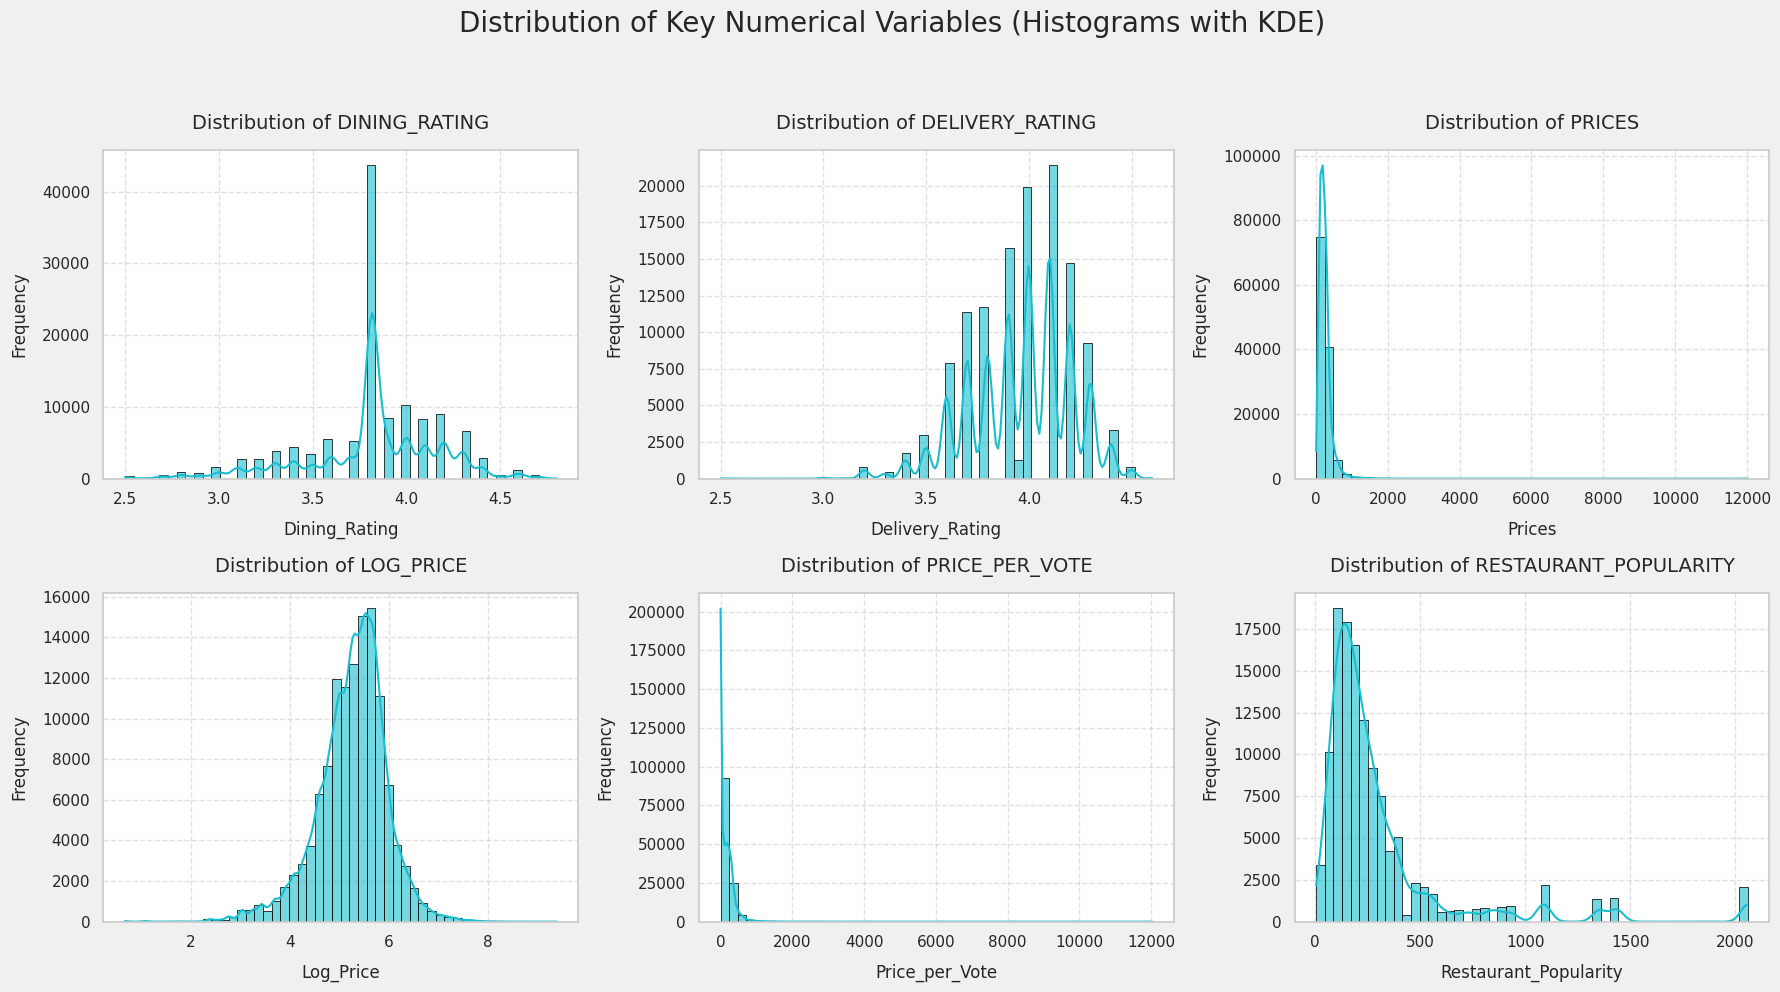

In [291]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Dining_Rating', 'Delivery_Rating','Prices', 'Log_Price', 'Price_per_Vote','Restaurant_Popularity']

# Set a professional plotting style
# sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Distribution of Key Numerical Variables (Histograms with KDE)', fontsize=20, y=1.02) # Main title for the entire figure


# For BG color
fig.patch.set_facecolor('#f0f0f0')  # light grey background


# Loop through each column and plot its histogram with KDE
for i, col in enumerate(columns_to_plot):
    # Use sns.histplot for histogram and KDE (Kernel Density Estimate)
    # sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#1f77b4', palette='Set1' , edgecolor='black')
    # sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#2ca02c', edgecolor='black', alpha=0.6)
    sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#17becf', edgecolor='black', alpha=0.6)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=14, pad = 15)
    axes[i].set_xlabel(col, fontsize=12, labelpad = 10)
    axes[i].set_ylabel('Frequency', fontsize=12, labelpad = 10)

    # Axis color
    axes[i].set_facecolor('#ffffff')  # white, can be any color

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

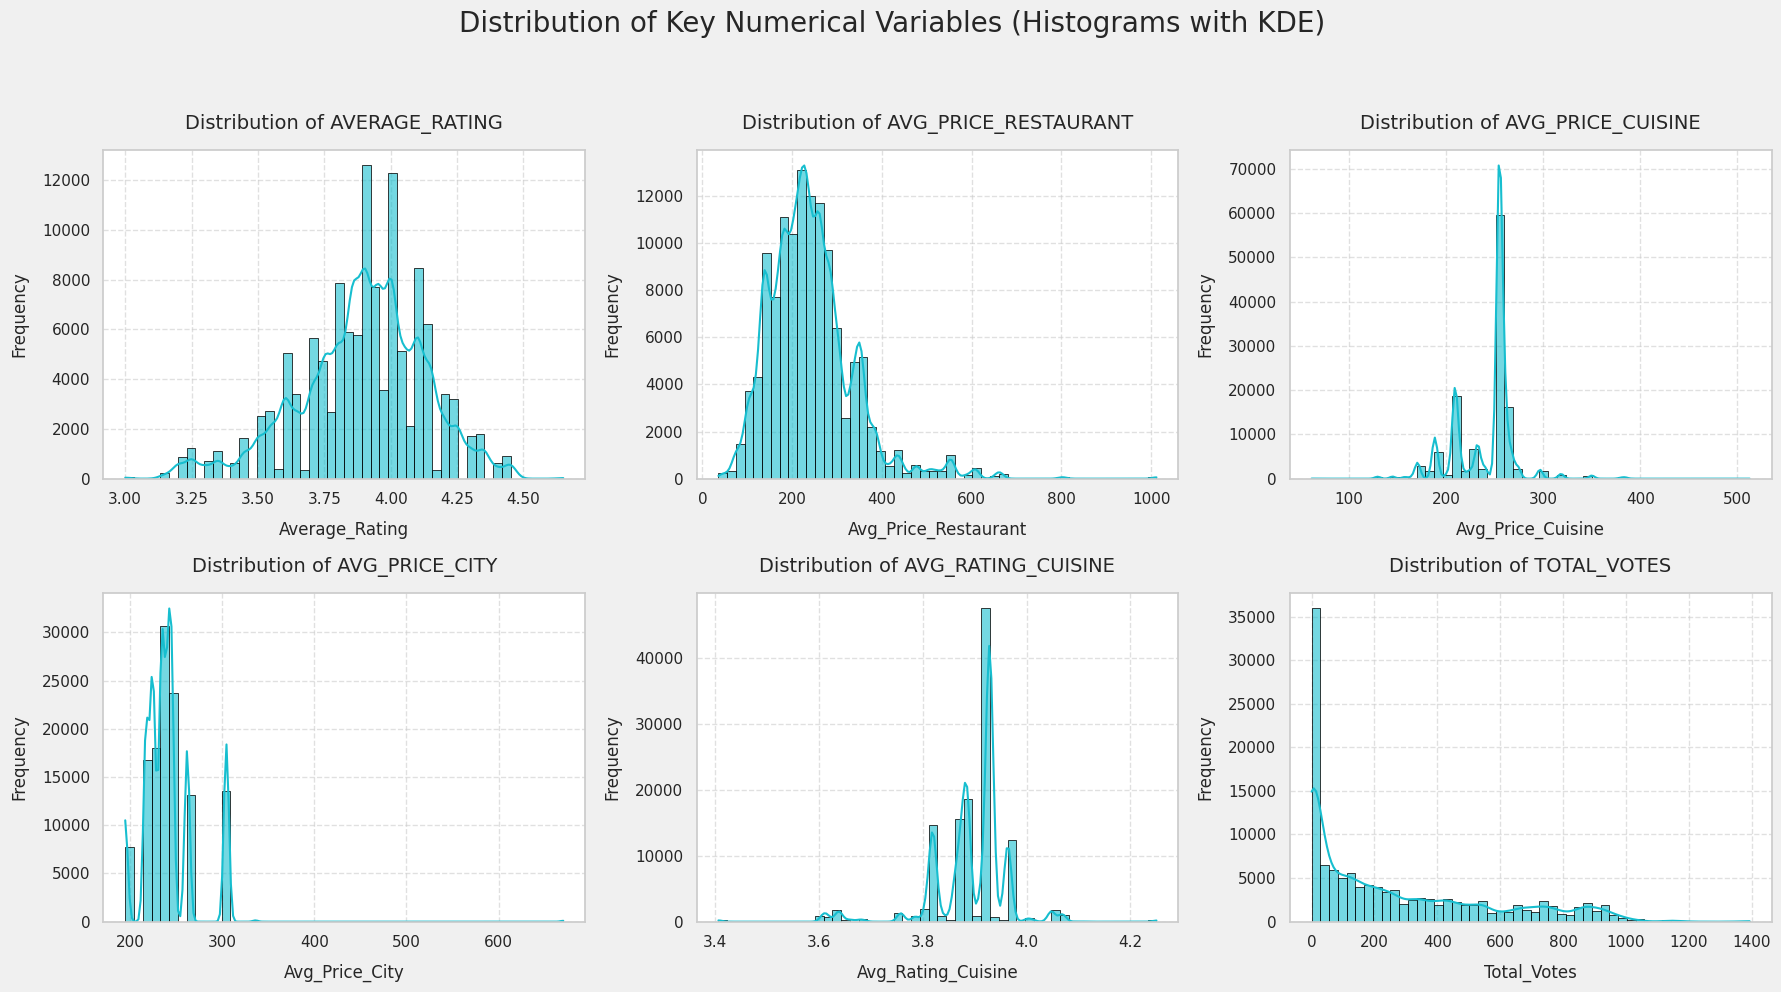

In [292]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Average_Rating','Avg_Price_Restaurant', 'Avg_Price_Cuisine', 'Avg_Price_City', 'Avg_Rating_Cuisine', 'Total_Votes']

# Set a professional plotting style
# sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Distribution of Key Numerical Variables (Histograms with KDE)', fontsize=20, y=1.02) # Main title for the entire figure


# For BG color
fig.patch.set_facecolor('#f0f0f0')  # light grey background


# Loop through each column and plot its histogram with KDE
for i, col in enumerate(columns_to_plot):
    # Use sns.histplot for histogram and KDE (Kernel Density Estimate)
    # sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#1f77b4', palette='Set1' , edgecolor='black')
    # sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#2ca02c', edgecolor='black', alpha=0.6)
    sns.histplot(data=zomato, x=col, kde=True, ax=axes[i], bins=50, color='#17becf', edgecolor='black', alpha=0.6)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=14, pad = 15)
    axes[i].set_xlabel(col, fontsize=12, labelpad = 10)
    axes[i].set_ylabel('Frequency', fontsize=12, labelpad = 10)

    # Axis color
    axes[i].set_facecolor('#ffffff')  # white, can be any color

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

**INSIGHTS**

* Average_Rating is narrowly distributed with a peak around ~3.9–4.1, meaning small rating uplifts above 4.2 will materially stand out in this market.​

* Dining_Rating and Delivery_Rating both center near ~3.8–4.2 with similar peaks, suggesting delivery satisfaction is not materially worse than dine‑in at the market level.​

* Prices for individual items are highly right‑skewed with most observations in the ~100–400 INR band and long outliers beyond 10,000 INR, while Log_Price is close to normal, confirming a log‑normal price process.​

* Avg_Price_Restaurant and Avg_Price_Cuisine concentrate between roughly 200–350 INR with long right tails, indicating a clear mid‑market price cluster with premium outliers.​

* Avg_Price_City shows multiple tight clusters around ~220–300 INR plus sparse high‑price cities, implying meaningful cross‑city variation in reference prices.​

* Avg_Rating_Cuisine is tightly bunched near ~3.9–4.0, showing limited cuisine‑level rating separation and implying quality signals beyond cuisine choice drive differentiation.​

* Total_Votes is heavily right‑skewed with many low‑vote items and a long tail past 1,000, evidencing winner‑take‑more dynamics in social proof.​

* Price_per_Vote is extremely right‑skewed, implying wide dispersion in perceived value for money and that “value plays” can outperform on engagement at similar prices.​

* Restaurant_Popularity (items per restaurant in the dataset) is right‑skewed: many restaurants have modest item counts while a few maintain very large catalogs, signaling diminishing returns from very large menus.

##**C. Visualization of Outliers using Boxplot**

*   **Variables :** Restaurant_Popularity, Dining_Rating, Delivery_Rating, Average_Rating, Avg_Rating_Cuisine, Avg_Rating_City, Prices, Log_Price, Avg_Price_Restaurant, Avg_Price_Cuisine, Avg_Price_City,
Total_Votes.
*   **Objective :** Identify outliers and quartiles.

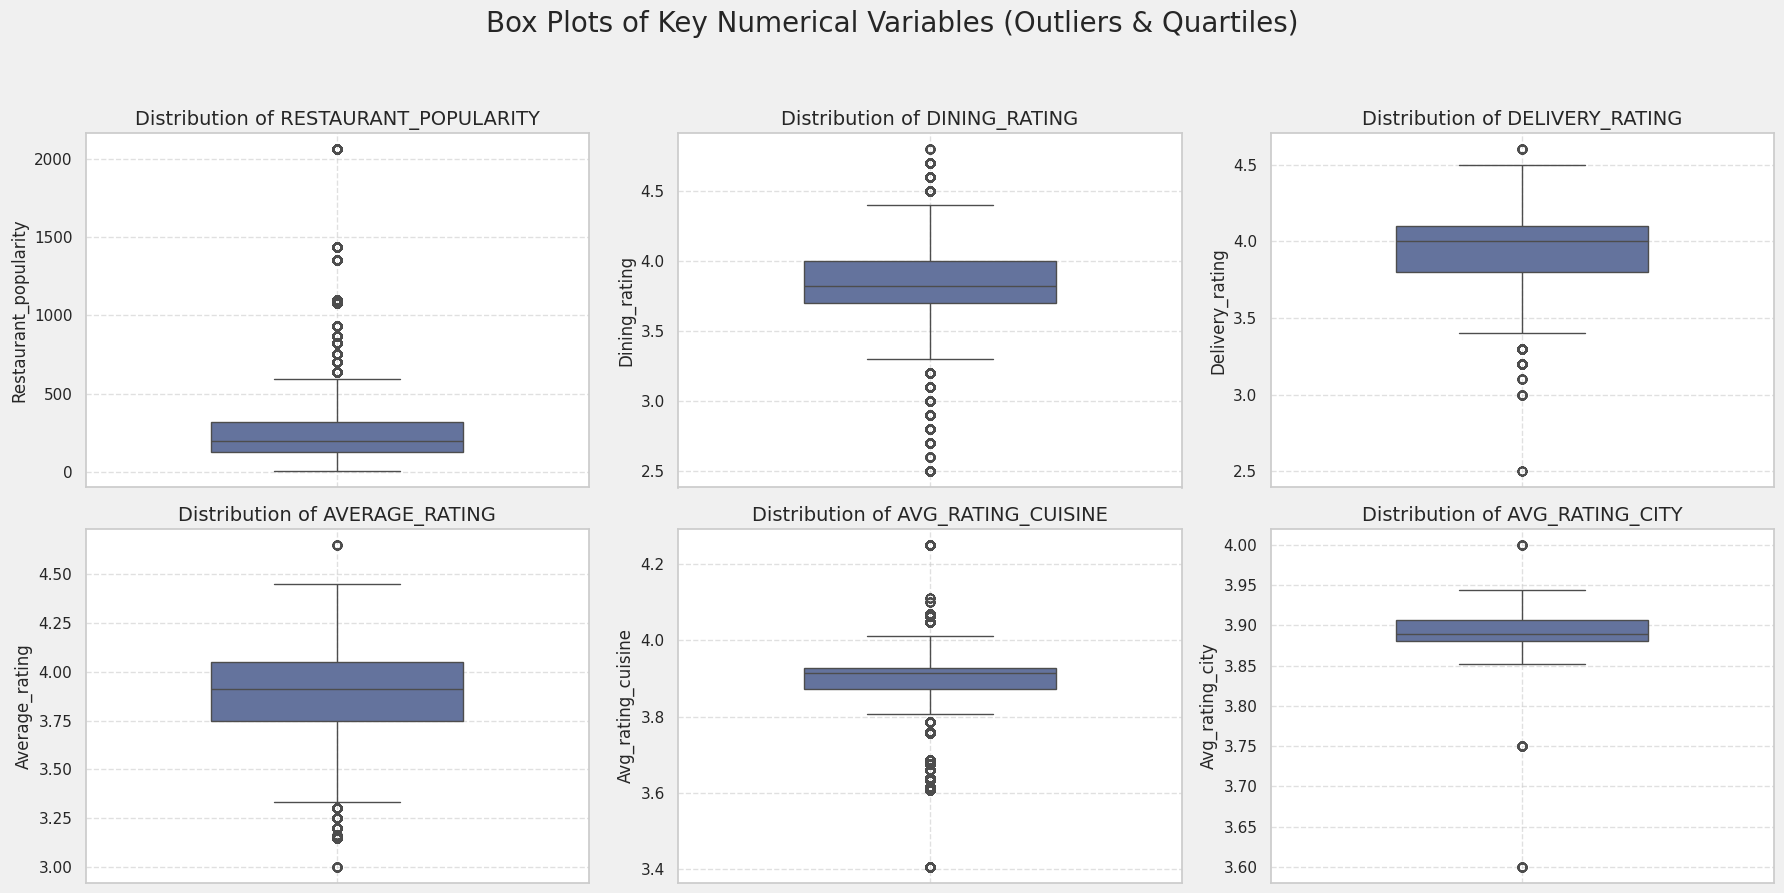

In [293]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Restaurant_Popularity', 'Dining_Rating', 'Delivery_Rating', 'Average_Rating', 'Avg_Rating_Cuisine', 'Avg_Rating_City']

# Set a professional plotting style
sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Box Plots of Key Numerical Variables (Outliers & Quartiles)', fontsize=20, y=1.02) # Main title for the entire figure

# For BG color
fig.patch.set_facecolor('#f0f0f0')  # light grey background

# Loop through each column and plot its box plot
for i, col in enumerate(columns_to_plot):
    # Use sns.boxplot for box plots
    sns.boxplot(data=zomato, y=col, ax=axes[i], color='#5B6EA6', width=0.5)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=14)
    axes[i].set_xlabel('') # No x-label needed as it's a single box plot
    axes[i].set_ylabel(col.capitalize(), fontsize=12)

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

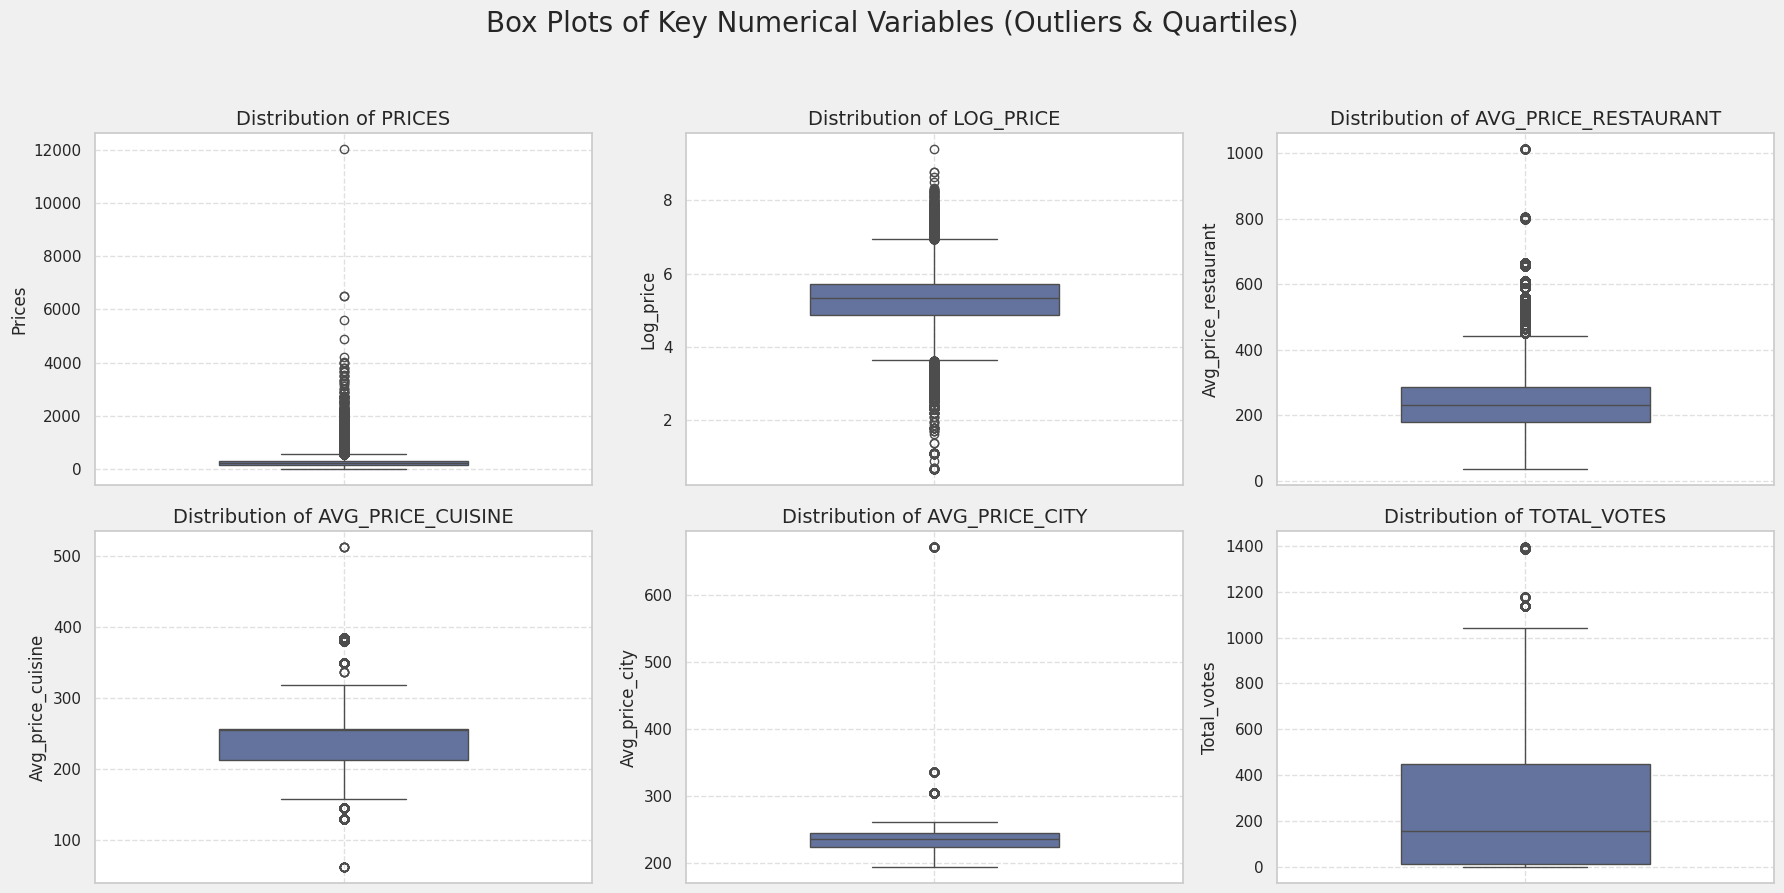

In [294]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Prices', 'Log_Price', 'Avg_Price_Restaurant', 'Avg_Price_Cuisine', 'Avg_Price_City',
'Total_Votes']

# Set a professional plotting style
sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Box Plots of Key Numerical Variables (Outliers & Quartiles)', fontsize=20, y=1.02) # Main title for the entire figure

# For BG color
fig.patch.set_facecolor('#f0f0f0')  # light grey background

# Loop through each column and plot its box plot
for i, col in enumerate(columns_to_plot):
    # Use sns.boxplot for box plots
    sns.boxplot(data=zomato, y=col, ax=axes[i], color='#5B6EA6', width=0.5)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=14)
    axes[i].set_xlabel('') # No x-label needed as it's a single box plot
    axes[i].set_ylabel(col.capitalize(), fontsize=12)

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

**INSIGHTS**

* Average_Rating is tightly bunched with a narrow IQR near ~3.8–4.0 and a median just under ~4.0, so small lifts above ~4.2 will stand out against a compressed field.​

* Delivery_Rating has a slightly higher median and upper whisker than Dining_Rating, indicating delivery satisfaction is at least on par, if not marginally better, than dine‑in at market level.​

* Avg_Rating_City and Avg_Rating_Cuisine both show very tight IQRs around ~3.9, implying limited variation by city or cuisine and making operational execution, speed, and consistency the real differentiators.​

* Prices are strongly right‑skewed with most items concentrated roughly in the 100–400 INR band and extreme outliers to 10k+, while Log_Price is near‑normal, confirming a log‑normal price process.​

* Avg_Price_Restaurant, Avg_Price_Cuisine, and Avg_Price_City cluster in the low‑to‑mid 200s INR with long right tails, signaling a clear mid‑market price “center of gravity” and a thinner premium segment.​

* Total_Votes is heavy‑tailed with a low median and a long tail beyond 1,000, indicating winner‑take‑more dynamics where a few items accumulate most social proof.​

* Price_per_Vote is extremely dispersed and right‑skewed, evidencing large differences in perceived value for money even at similar absolute prices.​

* Restaurant_Popularity (items per restaurant) is right‑skewed with many modest catalogs and a few very large ones, suggesting diminishing returns from very broad menus.

##**D. Visualizing the Discrete Numerical Variables**

###**I. Frequency/count analysis of variables**

In [295]:
# Distribution of Restaurant_Popularity

print("\n--- Distribution of Popularity ---\n")
print("A. Top Popularities\n")
print(zomato['Restaurant_Popularity'].value_counts().head(20))
print("\n" + "="*50)
print("B. Bottom Popularities\n")
print(zomato['Restaurant_Popularity'].value_counts().tail(20))
print("\n" + "="*50)

print("\n--- Distribution of Restaurant Popularity Segments ---\n")
print(zomato['Popularity_Segment'].value_counts())
print("\n" + "="*50)

# Distribution of Dining_Votes

print("\n--- Distribution of Dining Votes ---\n")
print("A. Top No of Votes\n")
print(zomato['Dining_Votes'].value_counts().head(20))
print("\n" + "="*50)
print("B. Bottom NO of Votes\n")
print(zomato['Dining_Votes'].value_counts().tail(20))
print("\n" + "="*50)

print("\n--- Distribution of Restaurant Votes Segments ---\n")
print(zomato['Votes_Segment'].value_counts())
print("\n" + "="*50)

# Distribution of Delivery_Votes

print("\n--- Distribution of Delivery Votes ---\n")
print("A. Top No of Votes\n")
print(zomato['Delivery_Votes'].value_counts().head(20))
print("\n" + "="*50)
print("B. Bottom NO of Votes\n")
print(zomato['Delivery_Votes'].value_counts().tail(20))
print("\n" + "="*50)

print("\n--- Distribution of Delivery Votes Segments ---\n")
print(zomato['Delivery_Votes_Segment'].value_counts())
print("\n" + "="*50)

# Distribution of Total Votes

print("\n--- Distribution of Total Votes ---\n")
print("A. Top No of Votes\n")
print(zomato['Total_Votes'].value_counts().head(20))
print("\n" + "="*50)
print("B. Bottom NO of Votes\n")
print(zomato['Total_Votes'].value_counts().tail(20))
print("\n" + "="*50)

print("\n--- Distribution of Total Votes Segments ---\n")
print(zomato['Total_Votes_Segment'].value_counts())
print("\n" + "="*50)

# Distribution of Votes

print("\n--- Distribution of Votes ---\n")
print("A. Top No of Votes\n")
print(zomato['Votes'].value_counts().head(20))
print("\n" + "="*50)
print("B. Bottom NO of Votes\n")
print(zomato['Votes'].value_counts().tail(20))
print("\n" + "="*50)

print("\n--- Distribution of Votes Segments ---\n")
print(zomato['Votes_Segment'].value_counts())
print("\n" + "="*50)

# Distribution of Is_Highly_Rated

print("\n--- Distribution of High Rated ---\n")
print(zomato['Is_Highly_Rated'].value_counts())
print("\n" + "="*50)

# Distribution of Is_Expensive

print("\n--- Distribution of Expensiveness ---\n")
print(zomato['Is_Expensive'].value_counts())
print("\n" + "="*50)


--- Distribution of Popularity ---

A. Top Popularities

Restaurant_Popularity
2059    2059
1435    1435
1352    1352
111     1110
1097    1097
1077    1077
140      980
119      952
237      948
188      940
934      934
460      920
228      912
128      896
99       891
868      868
282      846
209      836
278      834
823      823
Name: count, dtype: int64

B. Bottom Popularities

Restaurant_Popularity
20    60
55    55
24    48
12    48
23    46
43    43
10    40
9     36
33    33
31    31
14    28
26    26
18    18
17    17
15    15
5     15
4     12
6     12
8      8
7      7
Name: count, dtype: int64


--- Distribution of Restaurant Popularity Segments ---

Popularity_Segment
Low Popularity (4–195)           61937
Moderate Popularity (196–318)    30981
High Popularity (>318)           30739
Name: count, dtype: int64


--- Distribution of Dining Votes ---

A. Top No of Votes

Dining_Votes
0      42516
2       1831
4       1430
1       1122
872      934
3        922
14       9

###**II. Visualizations**

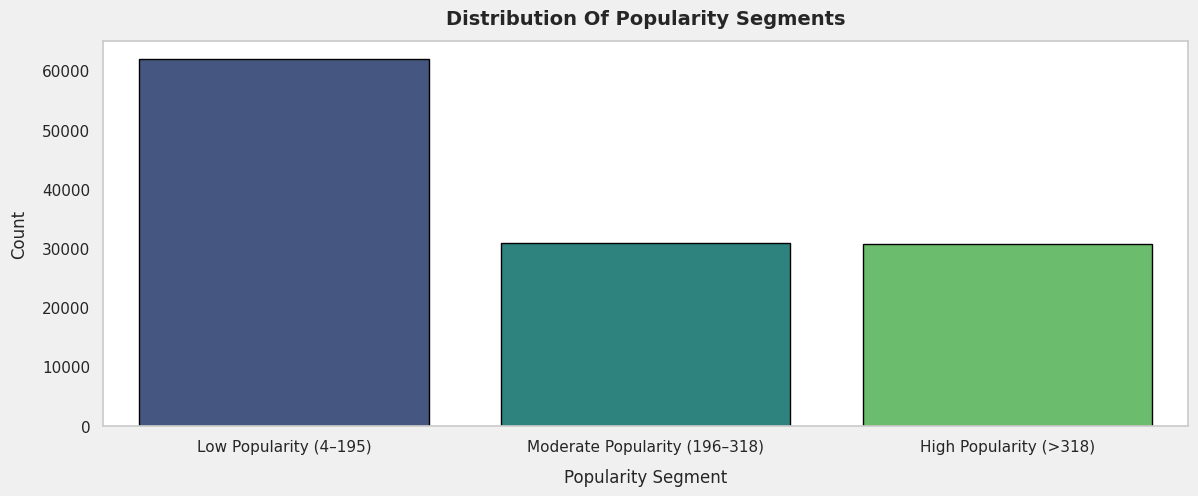

In [296]:
# Visualizing the Resturant Popularity Segment distribution
plt.figure(figsize=(14,5), facecolor='#f0f0f0')

sns.barplot(x=zomato['Popularity_Segment'].value_counts().index, y=zomato['Popularity_Segment'].value_counts().values, palette='viridis', edgecolor='black')

plt.title('Distribution Of Popularity Segments', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Popularity Segment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
# plt.xticks(rotation=30)
plt.grid(False)
plt.show()

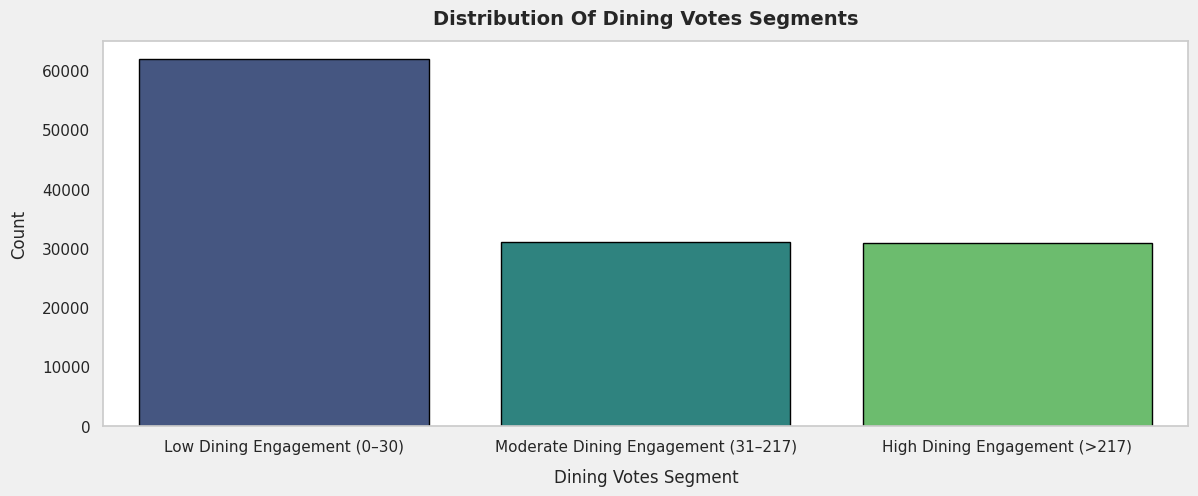

In [297]:
# Visualizing the Resturant Dining Votes Segment distribution
plt.figure(figsize=(14,5), facecolor='#f0f0f0')

sns.barplot(x=zomato['Dining_Votes_Segment'].value_counts().index, y=zomato['Dining_Votes_Segment'].value_counts().values, palette='viridis', edgecolor='black')

plt.title('Distribution Of Dining Votes Segments', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Dining Votes Segment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
# plt.xticks(rotation=30)
plt.grid(False)
plt.show()

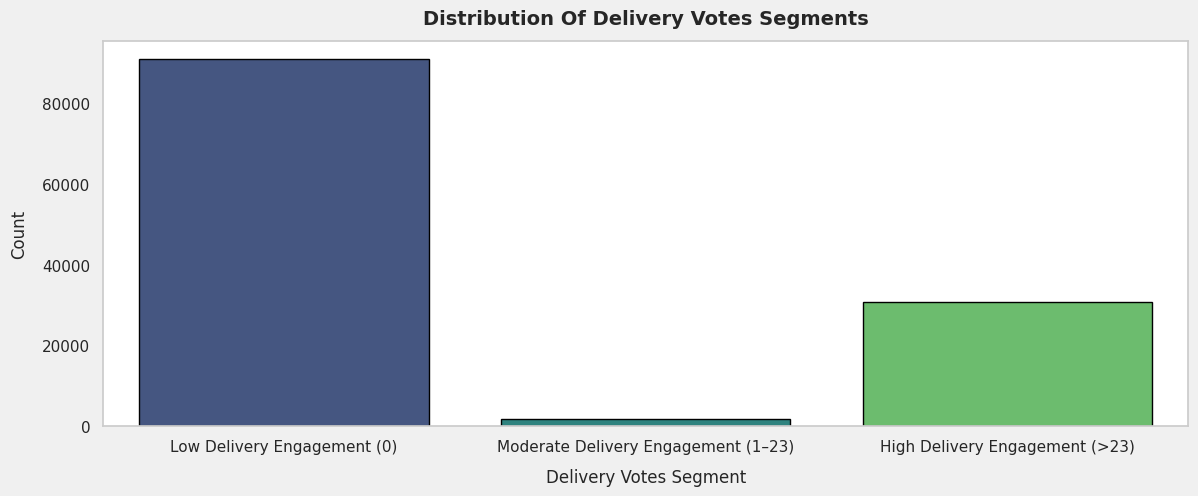

In [298]:
# Visualizing the Resturant Delivery Votes Segment distribution
plt.figure(figsize=(14,5), facecolor='#f0f0f0')

sns.barplot(x=zomato['Delivery_Votes_Segment'].value_counts().index, y=zomato['Delivery_Votes_Segment'].value_counts().values, palette='viridis', edgecolor='black')

plt.title('Distribution Of Delivery Votes Segments', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Delivery Votes Segment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
# plt.xticks(rotation=30)
plt.grid(False)
plt.show()

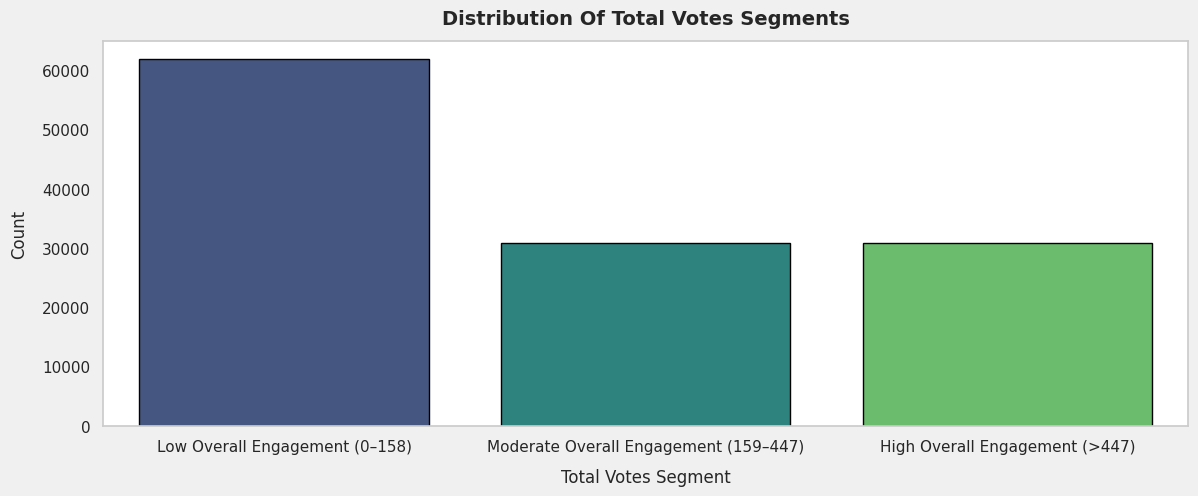

In [299]:
# Visualizing the Resturant Total Votes Segment distribution
plt.figure(figsize=(14,5), facecolor='#f0f0f0')

sns.barplot(x=zomato['Total_Votes_Segment'].value_counts().index, y=zomato['Total_Votes_Segment'].value_counts().values, palette='viridis', edgecolor='black')

plt.title('Distribution Of Total Votes Segments', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Total Votes Segment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
# plt.xticks(rotation=30)
plt.grid(False)
plt.show()

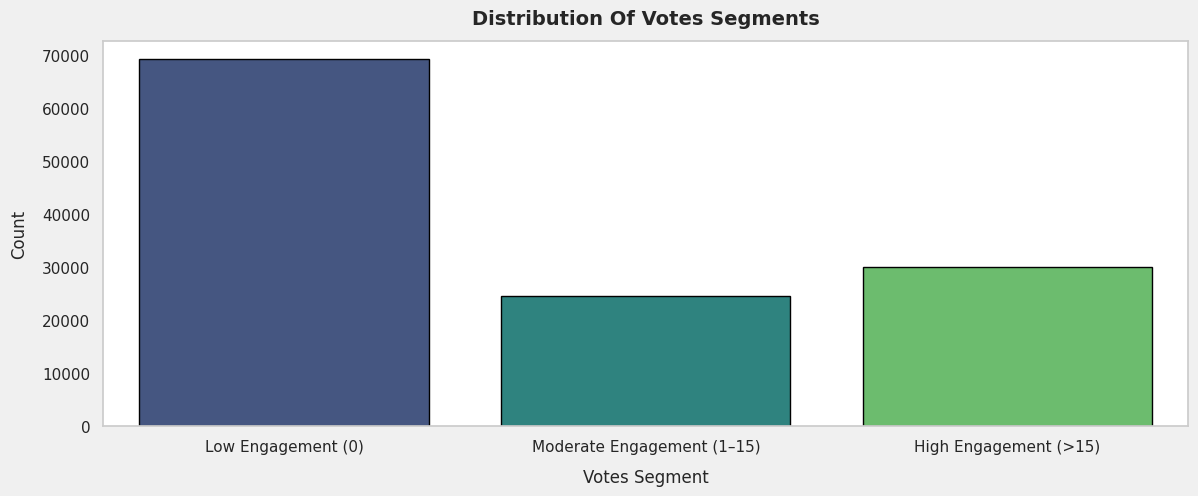

In [300]:
# Visualizing the Resturant Votes Segment distribution
plt.figure(figsize=(14,5), facecolor='#f0f0f0')

sns.barplot(x=zomato['Votes_Segment'].value_counts().index, y=zomato['Votes_Segment'].value_counts().values, palette='viridis', edgecolor='black')

plt.title('Distribution Of Votes Segments', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Votes Segment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
# plt.xticks(rotation=30)
plt.grid(False)
plt.show()

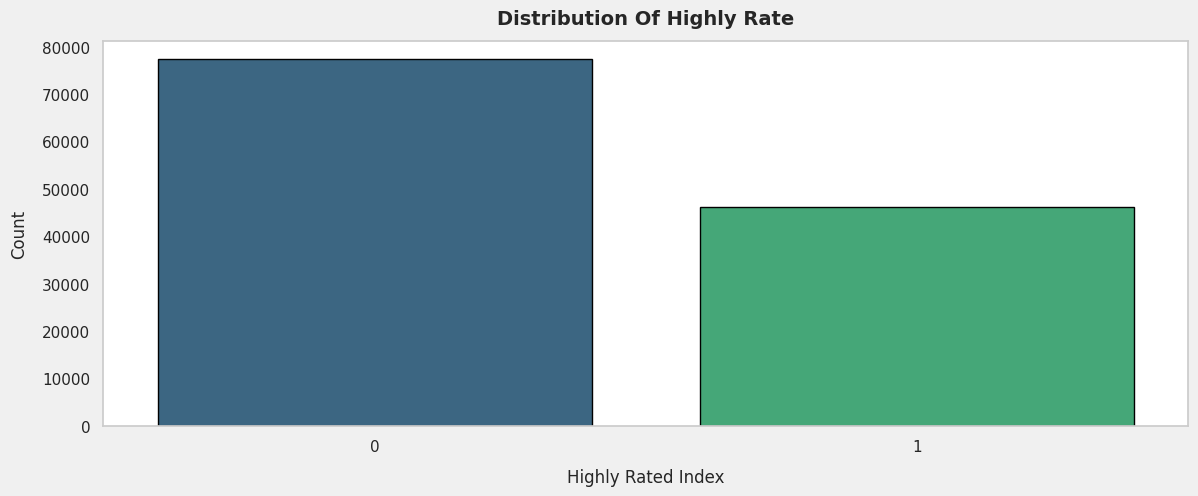

In [301]:
# Visualizing the Highly_Rate distribution

plt.figure(figsize = (14,5), facecolor='#f0f0f0')
sns.barplot(zomato['Is_Highly_Rated'].value_counts() , palette = 'viridis' , edgecolor = 'black' , order = zomato['Is_Highly_Rated'].value_counts().index)

plt.title('Distribution Of Highly Rate', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Highly Rated Index', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
# plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

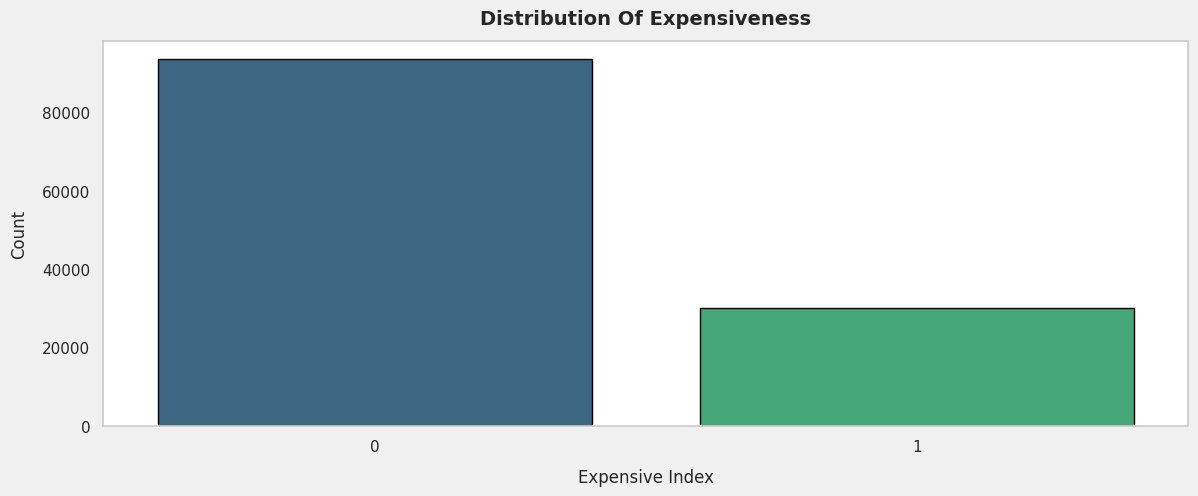

In [302]:
# Visualizing the Expensiveness distribution

plt.figure(figsize = (14,5), facecolor='#f0f0f0')
sns.barplot(zomato['Is_Expensive'].value_counts() , palette = 'viridis' , edgecolor = 'black' , order = zomato['Is_Expensive'].value_counts().index)

plt.title('Distribution Of Expensiveness', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Expensive Index', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
# plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

**INSIGHTS**

* Restaurant_Popularity is long‑tailed: the largest mass is in Low Popularity (4–195), with smaller but notable masses in Moderate (196–318) and High (>318).​

* Delivery_Votes are highly polarized: the dominant group has 0 votes, with a smaller Moderate (1–23) and a sizable High (>23) head.​

* Total_Votes mirror a bifurcation: many Low (0–158) items but a similarly large High (>447) cohort, consistent with social proof concentration.​

* Dining_Votes show the same pattern as total votes: many Low (0–30) with substantial High (>217), indicating in‑store winners also compound attention.

* Votes are polarized: most items have zero votes, while the next largest block is high engagement (>15), exceeding the moderate band (1–15), showing a clear winner‑take‑more dynamic once traction starts.​

* The market skews value‑seeking: a large majority of items are not expensive relative to city averages (Is_Expensive=0), with a smaller premium minority.​

* Quality bar is meaningful: a substantial minority achieves Highly Rated (≥4.0), but the non‑highly‑rated group is still larger, so clearing the 4.0 threshold remains differentiating.

#**7. Exploratory Data Analysis - Univariate Analysis of Categorical Variables**

##**A. Quantitative Analysis**

In [303]:
# Number of unique Restaurants, Cuisines, Places, Cities, Items, Selling Status.

print("\n--- Number of Unique Values ---\n")
print(f"   Number of unique Restaurants: {zomato['Restaurant_Name'].nunique()}")
print(f"   Number of unique Cuisines: {zomato['Cuisine'].nunique()}")
print(f"   Number of unique Places: {zomato['Place_Name'].nunique()}")
print(f"   Number of unique Cities: {zomato['City'].nunique()}")
print(f"   Number of unique Items: {zomato['Item_Name'].nunique()}")
print(f"   Number of unique Selling Status: {zomato['Best_Seller'].nunique()}")
print("\n" + "="*50)

# Most frequent Restaurants (count/percentage).

print("\n--- Distribution of Restaurants ---\n")
print("\nA. Frequency:\n")
print(zomato['Restaurant_Name'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%):\n")
print(zomato['Restaurant_Name'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage
print("\n" + "="*50)

# Most frequent Cuisines (count/percentage).

print("\n--- Distribution of Cuisines ---\n")
print("\nA. Frequency:\n")
print(zomato['Cuisine'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%):\n")
print(zomato['Cuisine'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage
print("\n" + "="*50)

# Most frequent Places (count/percentage).

print("\n--- Frequency of Places ---\n")
print("\nA. Frequency:\n")
print(zomato['Place_Name'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%)\n")
print(zomato['Place_Name'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage

# Most frequent Cities (count/percentage).

print("\n--- Frequency of Cities ---\n")
print("\nA. Frequency:\n")
print(zomato['City'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%)\n")
print(zomato['City'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage

# Most frequent Items (count/percentage).

print("\n--- Frequency of Items ---\n")
print("\nA. Frequency:\n")
print(zomato['Item_Name'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%)\n")
print(zomato['Item_Name'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage

# Most frequent Selling Status (count/percentage).

print("\n--- Frequency of Selling Status ---\n")
print("\nA. Frequency:\n")
print(zomato['Best_Seller'].value_counts())
# print("\n" + "="*50)
print("\nB. Percentage(%)\n")
print(zomato['Best_Seller'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage


--- Number of Unique Values ---

   Number of unique Restaurants: 826
   Number of unique Cuisines: 48
   Number of unique Places: 324
   Number of unique Cities: 17
   Number of unique Items: 55693
   Number of unique Selling Status: 14


--- Distribution of Restaurants ---


A. Frequency:

Restaurant_Name
McDonald's              2059
Domino's Pizza          1435
Burger King             1352
FreshMenu               1097
Pizza Hut               1077
                        ... 
Arabian Food Court         5
Akbar Fast Food            5
Sukanta                    4
Asian Bowls By Zahvi       4
Evoke                      4
Name: count, Length: 826, dtype: int64

B. Percentage(%):

Restaurant_Name
McDonald's              1.665090
Domino's Pizza          1.160468
Burger King             1.093347
FreshMenu               0.887131
Pizza Hut               0.870958
                          ...   
Arabian Food Court      0.004043
Akbar Fast Food         0.004043
Sukanta                 0.003235

##**B. Visualizations**

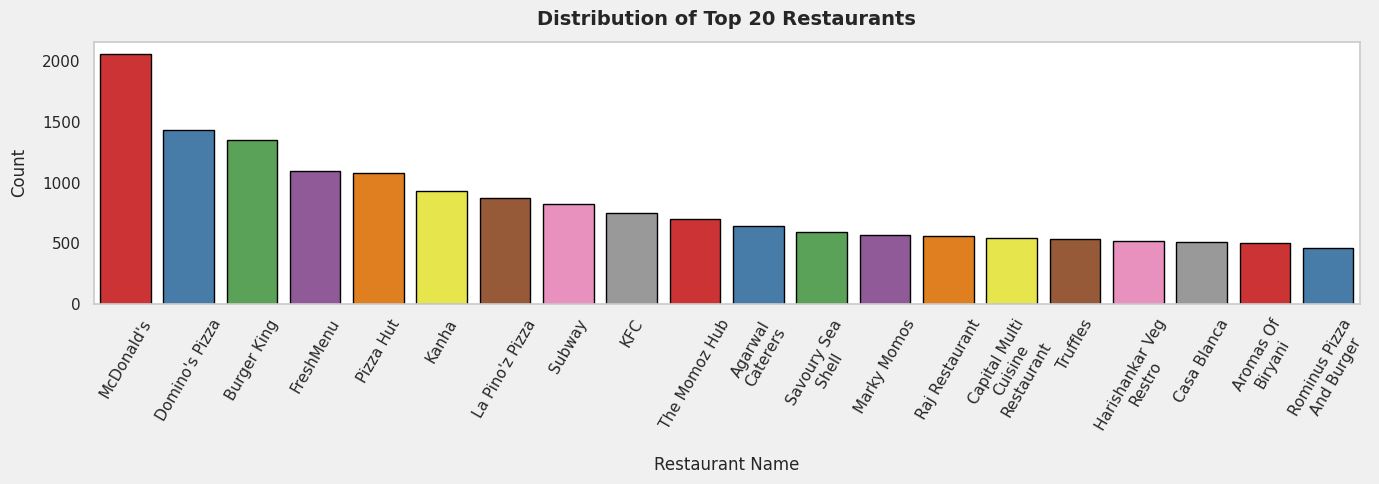

In [304]:
# Top 20 restaurants
top_restaurant = zomato['Restaurant_Name'].value_counts().head(20)

# Wrap long x-axis labels
restaurant_wrapped_labels = ['\n'.join(wrap(label, 15)) for label in top_restaurant.index]  # 15 = max chars per line

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=restaurant_wrapped_labels, y=top_restaurant.values, palette='Set1', edgecolor='black')

plt.title('Distribution of Top 20 Restaurants', fontsize=14, pad=12, fontweight='bold')
plt.xlabel('Restaurant Name', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.xticks(rotation=60)  # No need to rotate after wrapping
plt.grid(False)
plt.tight_layout()
plt.show()

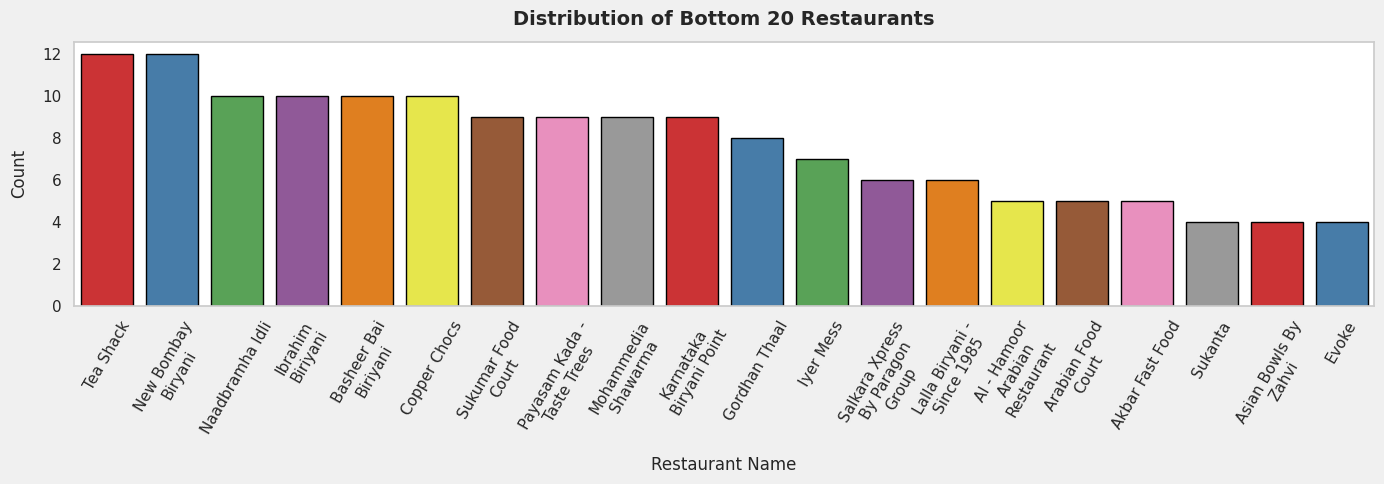

In [305]:
# Bottom 20 restaurants
bottom_restaurant = zomato['Restaurant_Name'].value_counts().tail(20)

# Wrap long x-axis labels
restaurant_wrapped_labels = ['\n'.join(wrap(label, 15)) for label in bottom_restaurant.index]  # 15 = max chars per line

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=restaurant_wrapped_labels, y=bottom_restaurant.values, palette='Set1', edgecolor='black')

plt.title('Distribution of Bottom 20 Restaurants', fontsize=14, pad=12, fontweight='bold')
plt.xlabel('Restaurant Name', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.xticks(rotation=60)  # No need to rotate after wrapping
plt.grid(False)
plt.tight_layout()
plt.show()

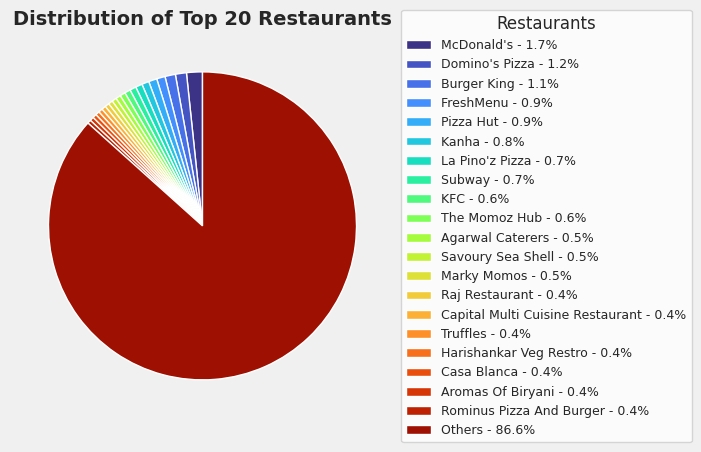

In [306]:
# Pie chart for Top 20 Artists + Others
count_restaurant_name = zomato['Restaurant_Name'].value_counts()

# Keep top 20, rest as 'Others'
top20 = count_restaurant_name.head(20)
others = pd.Series(count_restaurant_name.iloc[20:].sum(), index=["Others"])
count_restaurant_name_final = pd.concat([top20, others])

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
wedges, texts = plt.pie(count_restaurant_name_final, startangle=90, colors=sns.color_palette("turbo", len(count_restaurant_name_final)))

# Prepare labels with percentage values
labels = [f"{artist} - {val:.1f}%" for artist, val in zip(count_restaurant_name_final.index, count_restaurant_name_final / count_restaurant_name_final.sum() * 100)]

# Add legend
plt.legend(wedges, labels, title="Restaurants", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title("Distribution of Top 20 Restaurants", fontsize=14, fontweight="bold")
plt.show()

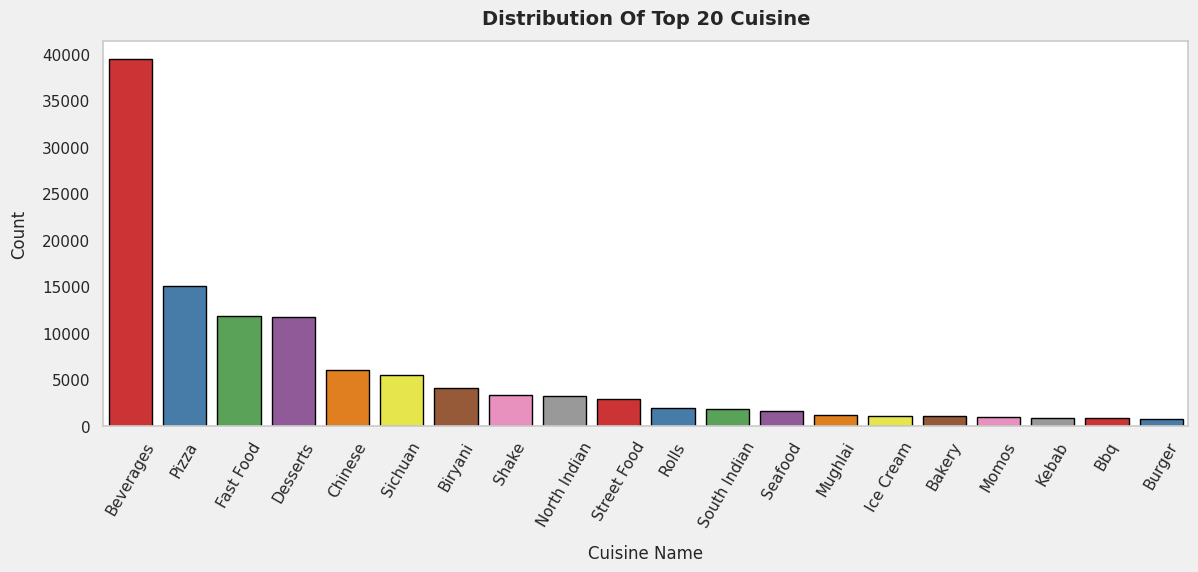

In [307]:
top_cuisine = zomato['Cuisine'].value_counts().head(20)

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=top_cuisine.index, y=top_cuisine.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Top 20 Cuisine', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Cuisine Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

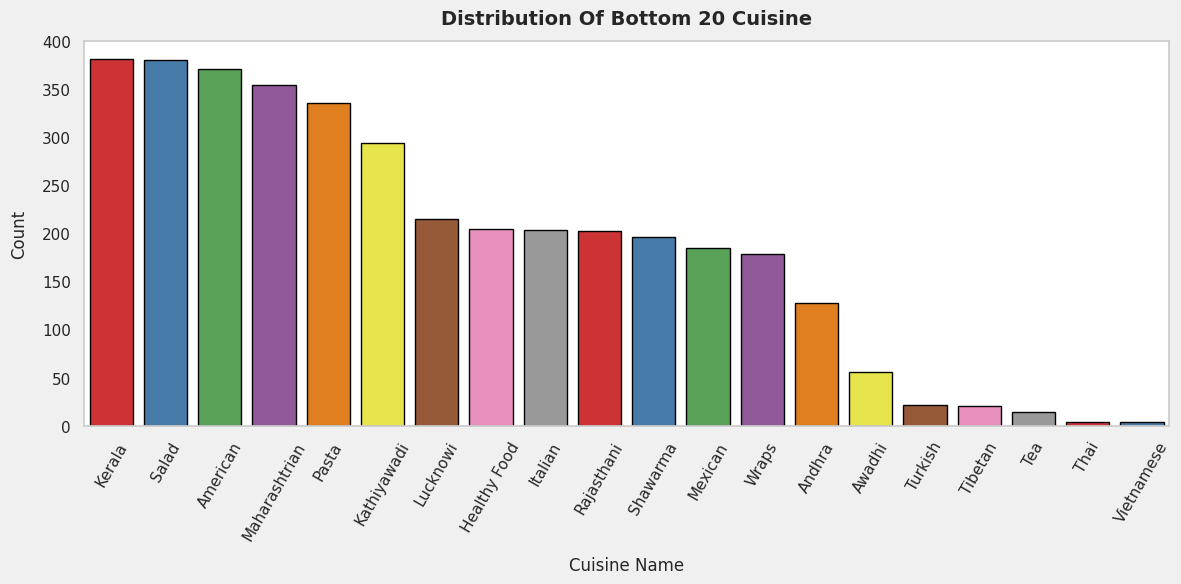

In [308]:
bottom_cuisine = zomato['Cuisine'].value_counts().tail(20)

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=bottom_cuisine.index, y=bottom_cuisine.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Bottom 20 Cuisine', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Cuisine Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

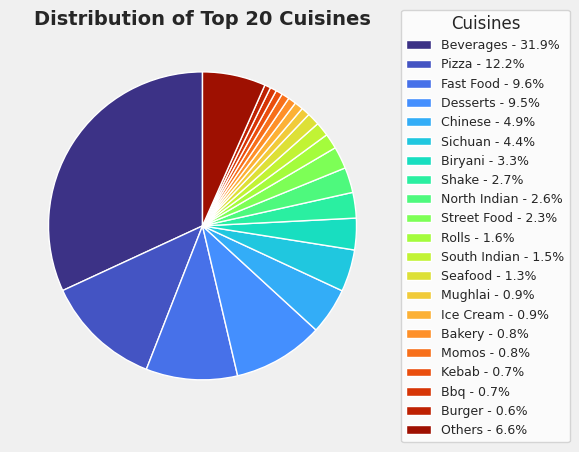

In [309]:
# Pie chart for Top 20 Artists + Others
count_cuisine_name = zomato['Cuisine'].value_counts()

# Keep top 20, rest as 'Others'
top20 = count_cuisine_name.head(20)
others = pd.Series(count_cuisine_name.iloc[20:].sum(), index=["Others"])
count_cuisine_name_final = pd.concat([top20, others])

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
wedges, texts = plt.pie(count_cuisine_name_final, startangle=90, colors=sns.color_palette("turbo", len(count_cuisine_name_final)))

# Prepare labels with percentage values
labels = [f"{artist} - {val:.1f}%" for artist, val in zip(count_cuisine_name_final.index, count_cuisine_name_final / count_cuisine_name_final.sum() * 100)]

# Add legend
plt.legend(wedges, labels, title="Cuisines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title("Distribution of Top 20 Cuisines", fontsize=14, fontweight="bold")
plt.show()

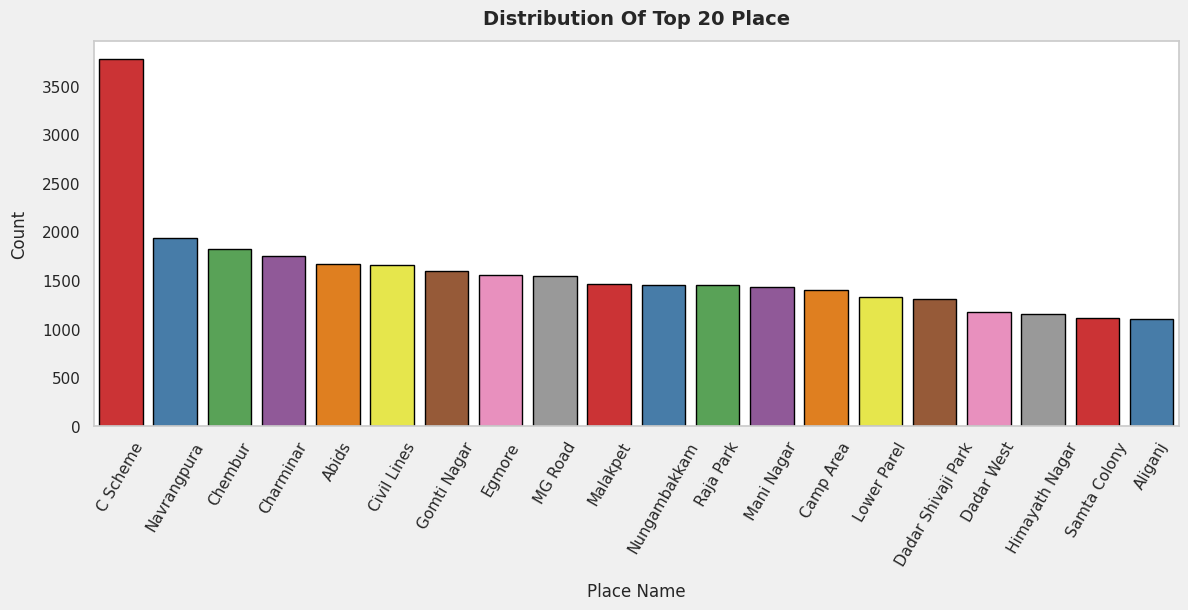

In [310]:
top_Place = zomato['Place_Name'].value_counts().head(20)

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=top_Place.index, y=top_Place.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Top 20 Place', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Place Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

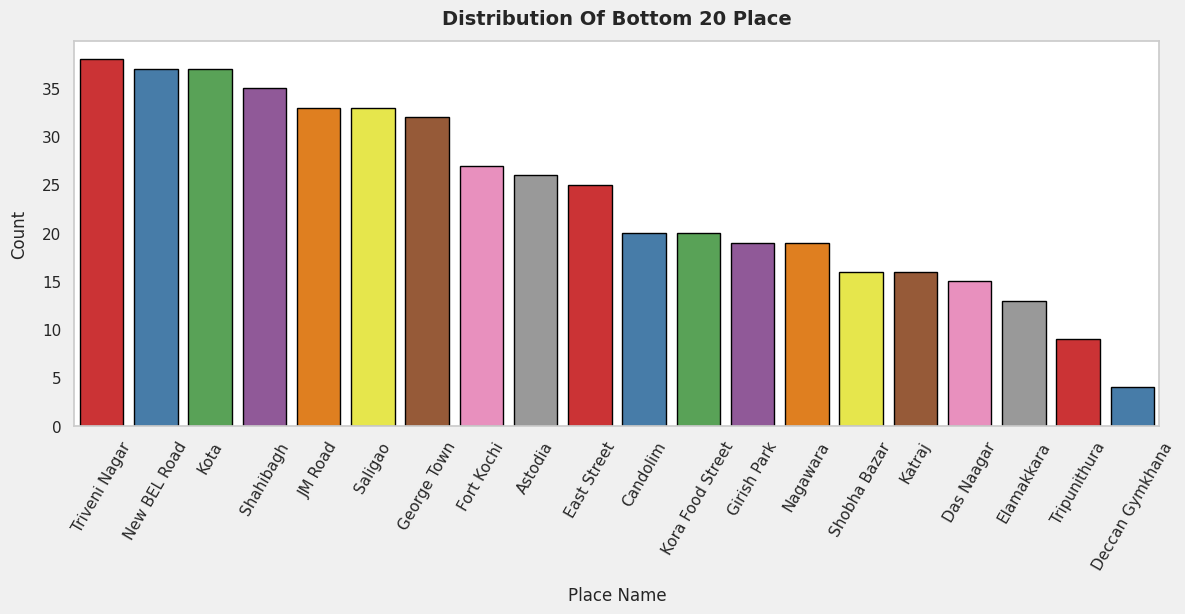

In [311]:
bottom_Place = zomato['Place_Name'].value_counts().tail(20)

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=bottom_Place.index, y=bottom_Place.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Bottom 20 Place', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Place Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

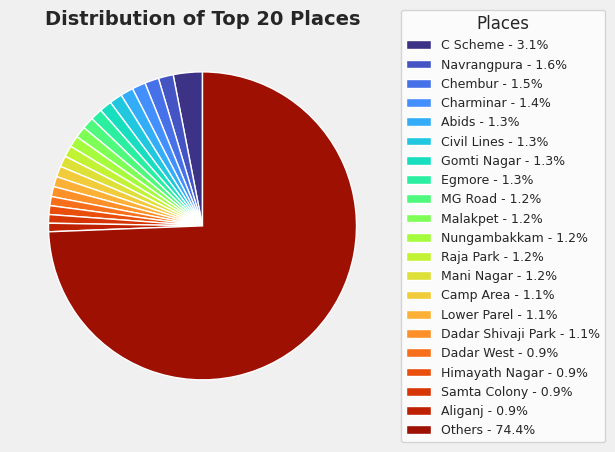

In [312]:
# Pie chart for Top 20 Artists + Others
count_place_name = zomato['Place_Name'].value_counts()

# Keep top 20, rest as 'Others'
top20 = count_place_name.head(20)
others = pd.Series(count_place_name.iloc[20:].sum(), index=["Others"])
count_place_name_final = pd.concat([top20, others])

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
wedges, texts = plt.pie(count_place_name_final, startangle=90, colors=sns.color_palette("turbo", len(count_place_name_final)))

# Prepare labels with percentage values
labels = [f"{artist} - {val:.1f}%" for artist, val in zip(count_place_name_final.index, count_place_name_final / count_place_name_final.sum() * 100)]

# Add legend
plt.legend(wedges, labels, title="Places", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title("Distribution of Top 20 Places", fontsize=14, fontweight="bold")
plt.show()

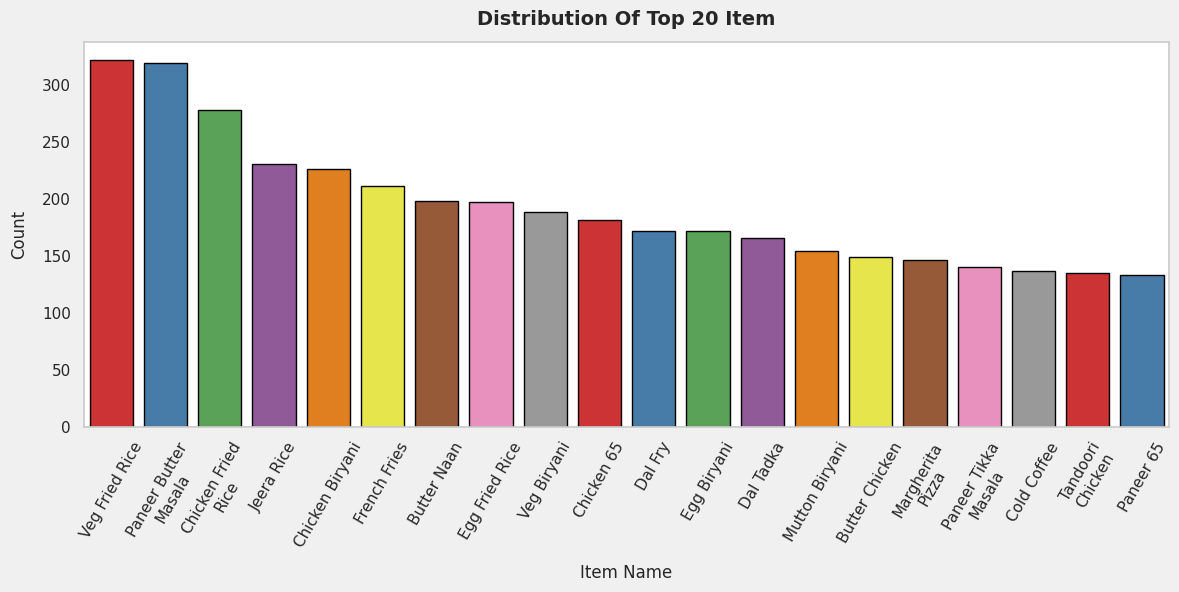

In [313]:
top_item = zomato['Item_Name'].value_counts().head(20)

# Wrap long x-axis labels
item_wrapped_labels = ['\n'.join(wrap(label, 15)) for label in top_item.index]  # 15 = max chars per line

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=item_wrapped_labels, y=top_item.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Top 20 Item', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Item Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

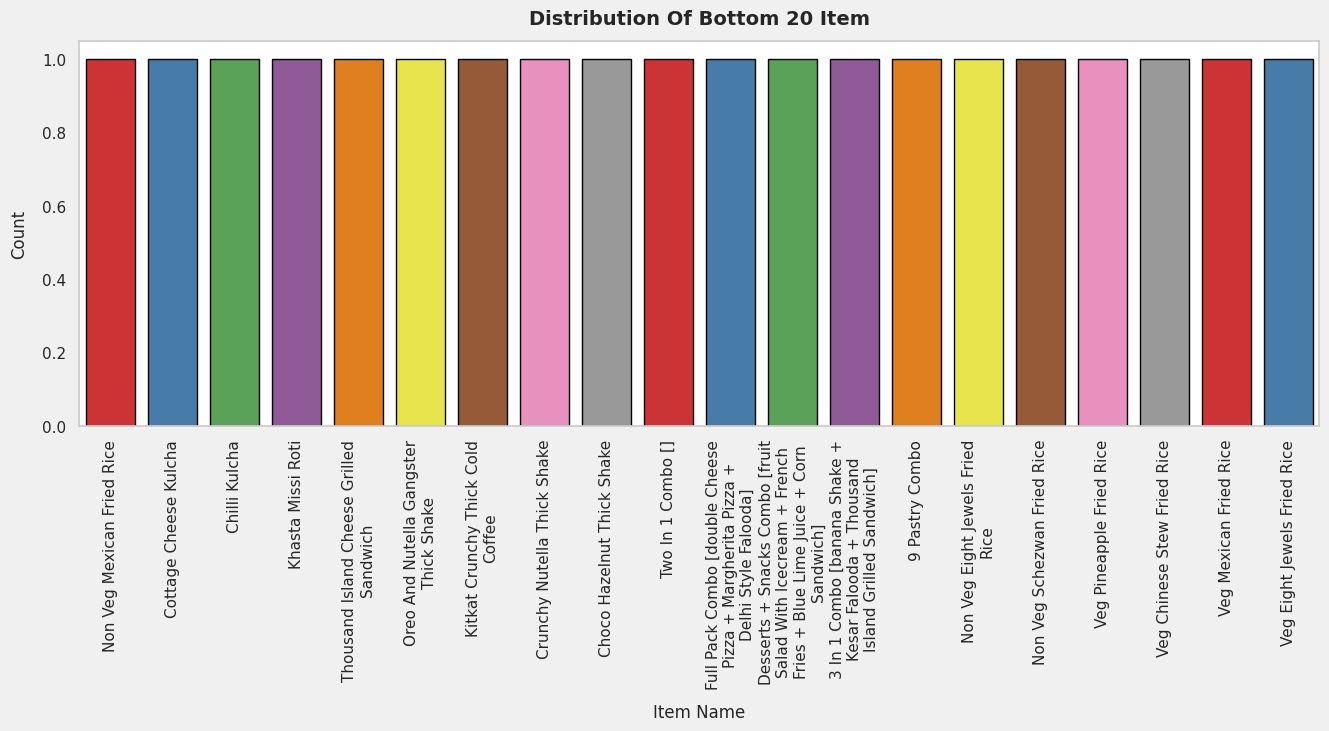

In [314]:
bottom_item = zomato['Item_Name'].value_counts().tail(20)

# Wrap long x-axis labels
item_wrapped_labels = ['\n'.join(wrap(label, 30)) for label in bottom_item.index]  # 15 = max chars per line

# Plot
plt.figure(figsize=(16,5), facecolor='#f0f0f0')
sns.barplot(x=item_wrapped_labels, y=bottom_item.values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Bottom 20 Item', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Item Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

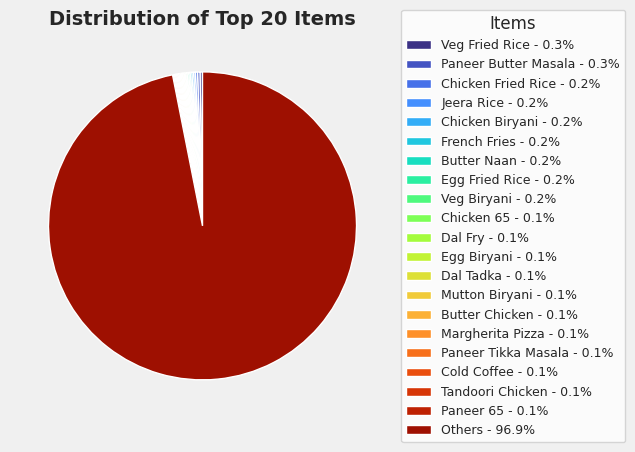

In [315]:
# Pie chart for Top 20 Artists + Others
count_item_name = zomato['Item_Name'].value_counts()

# Keep top 20, rest as 'Others'
top20 = count_item_name.head(20)
others = pd.Series(count_item_name.iloc[20:].sum(), index=["Others"])
count_item_name_final = pd.concat([top20, others])

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
wedges, texts = plt.pie(count_item_name_final, startangle=90, colors=sns.color_palette("turbo", len(count_item_name_final)))

# Prepare labels with percentage values
labels = [f"{artist} - {val:.1f}%" for artist, val in zip(count_item_name_final.index, count_item_name_final / count_item_name_final.sum() * 100)]

# Add legend
plt.legend(wedges, labels, title="Items", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title("Distribution of Top 20 Items", fontsize=14, fontweight="bold")
plt.show()

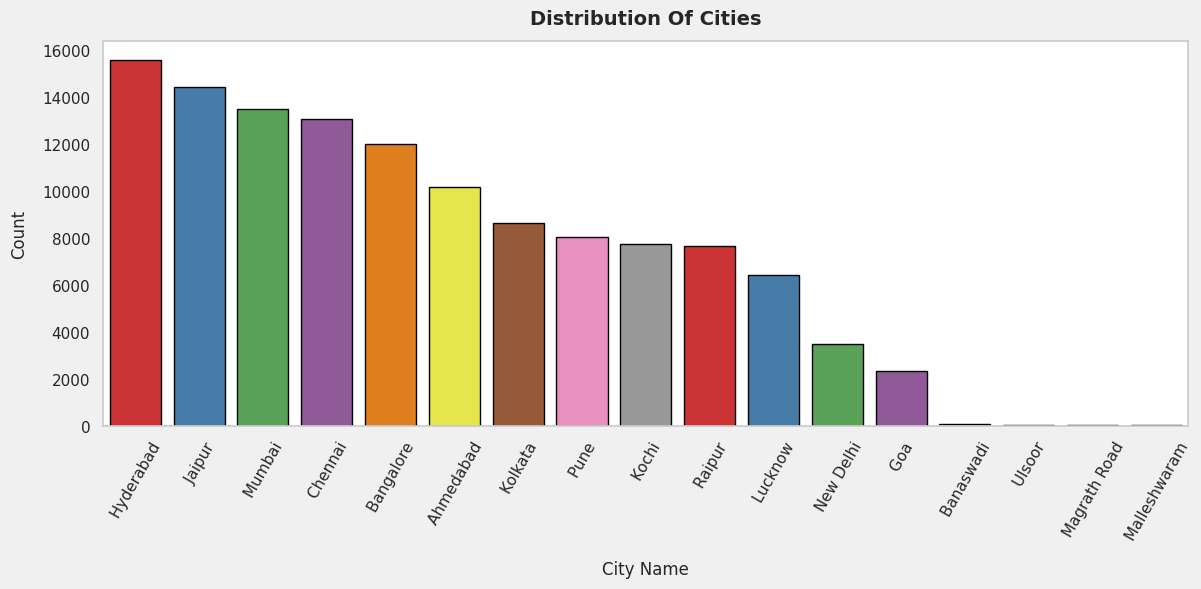

In [316]:
# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=zomato['City'].value_counts().index, y=zomato['City'].value_counts().values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Cities', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('City Name', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

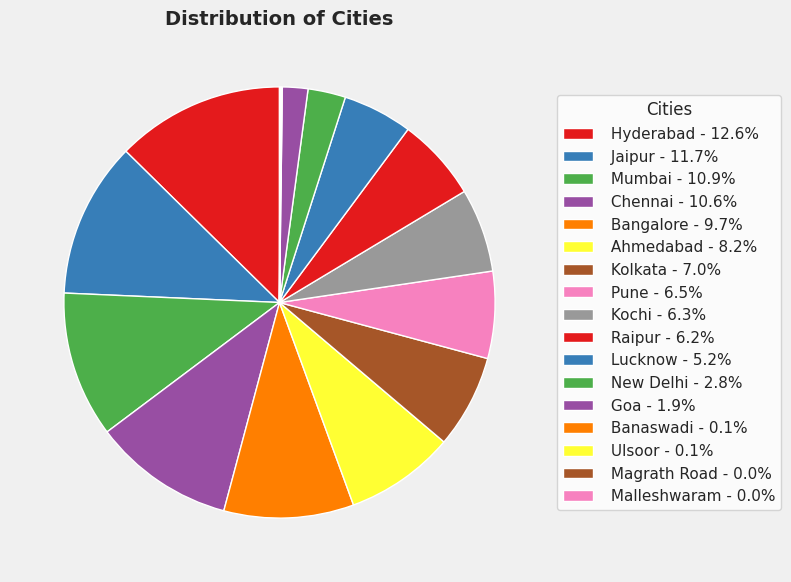

In [317]:
plt.figure(figsize=(7,7), facecolor='#f0f0f0')
wedges, texts = plt.pie(zomato['City'].value_counts(), startangle=90, colors=sns.color_palette("Set1", len(zomato['City'].value_counts())))

# Prepare labels with percentage values
labels = [f"{lang} - {val:.1f}%" for lang, val in zip(zomato['City'].value_counts().index, zomato['City'].value_counts()/zomato['City'].value_counts().sum()*100)]

# Add legend with labels + percentages
plt.legend(wedges, labels, title="Cities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribution of Cities", fontsize=14, fontweight="bold")
plt.show()

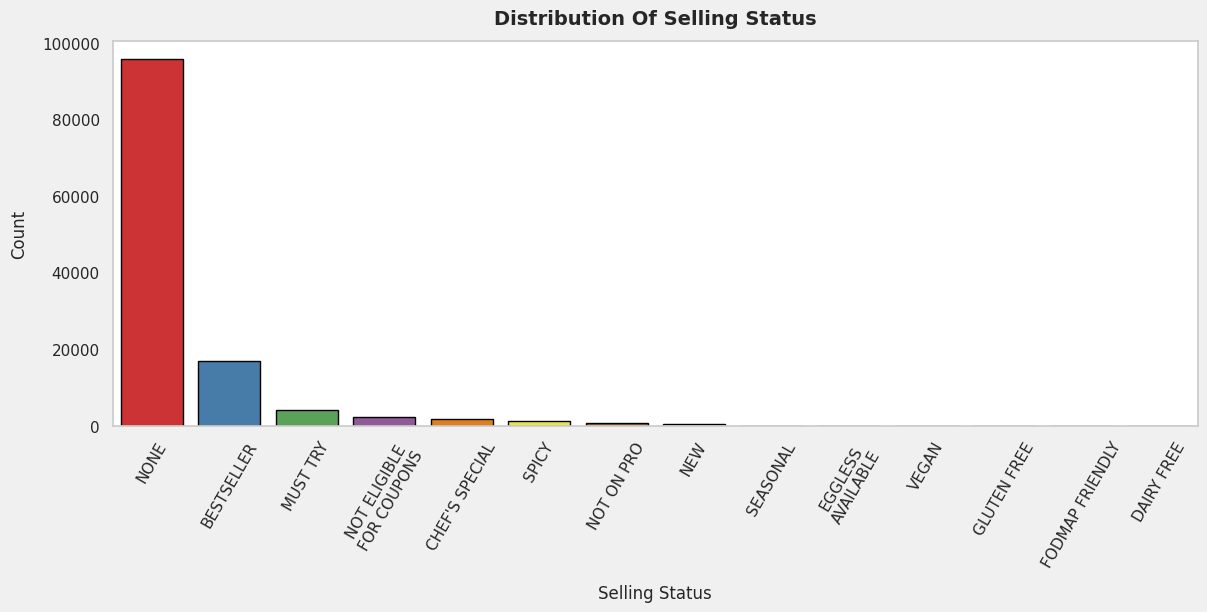

In [318]:
# Wrap long x-axis labels
selling_status_wrapped_labels = ['\n'.join(wrap(label, 15)) for label in zomato['Best_Seller'].value_counts().index]  # 15 = max chars per line

# Plot
plt.figure(figsize=(14,5), facecolor='#f0f0f0')
sns.barplot(x=selling_status_wrapped_labels, y=zomato['Best_Seller'].value_counts().values, palette='Set1', edgecolor='black')

plt.title('Distribution Of Selling Status', fontsize = 14, pad = 12, fontweight='bold')
plt.xlabel('Selling Status', fontsize = 12, labelpad = 10)
plt.ylabel('Count', fontsize = 12, labelpad = 10)
plt.xticks(rotation = 60)
plt.grid(False)
plt.show()

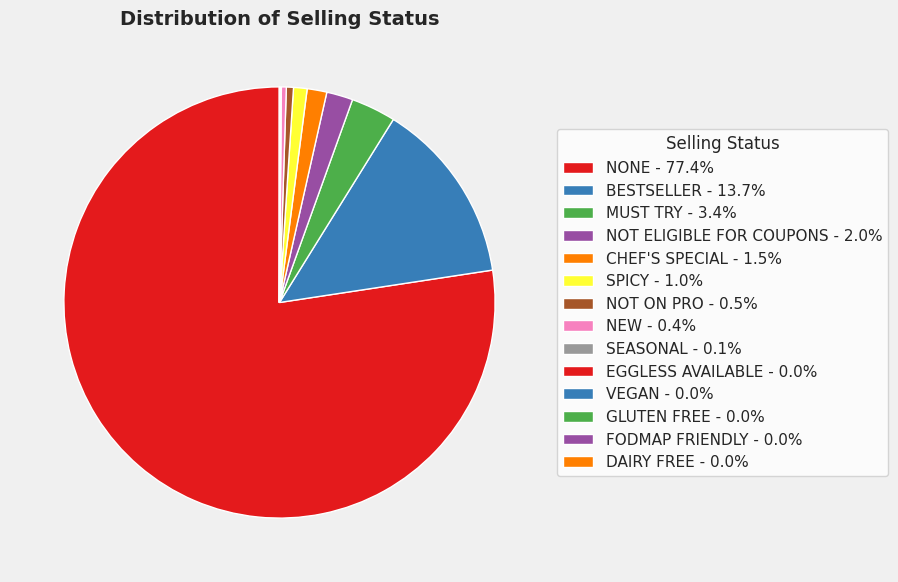

In [319]:
plt.figure(figsize=(7,7), facecolor='#f0f0f0')
wedges, texts = plt.pie(zomato['Best_Seller'].value_counts(), startangle=90, colors=sns.color_palette("Set1", len(zomato['Best_Seller'].value_counts())))

# Prepare labels with percentage values
labels = [f"{lang} - {val:.1f}%" for lang, val in zip(zomato['Best_Seller'].value_counts().index, zomato['Best_Seller'].value_counts()/zomato['Best_Seller'].value_counts().sum()*100)]

# Add legend with labels + percentages
plt.legend(wedges, labels, title="Selling Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribution of Selling Status", fontsize=14, fontweight="bold")
plt.show()

**INSIGHTS**

Restaurants
* Even among the Top‑20, each brand is ≤1.7% share and “Others” is 86.6%, confirming high fragmentation.​

* Top counts are dominated by QSR leaders (McDonald’s ~2k, Domino’s ~1.4k, Burger King ~1.3k, Pizza Hut ~1.1k), with Subway/KFC also in the top cohort.​

* Bottom‑20 restaurants have very low presence (single‑digit to low‑teens counts), showing a long tail with minimal scale.

Cuisines

* Beverages lead the market by a wide margin (~32%), with pizza second and fast food/desserts close behind.​

* Mid‑tier demand exists in Chinese, Sichuan, Biryani, Shakes, and North Indian, each far smaller than beverages/pizza.​

* Bottom‑20 cuisines (e.g., Vietnamese, Thai, Tea, Tibetan, Turkish, Awadhi) show very low counts, indicating thin supply/demand.​

* Overall mix skews toward snackable, delivery‑friendly categories (beverages, pizza, fast food, desserts).

Places

* C Scheme is the clear leader by count, roughly double the next cluster of places, indicating a tiered hierarchy of demand.​

* The Top‑20 places collectively represent only ~25.6% of listings, confirming high fragmentation beyond a few hubs.​

* Bottom‑20 places show extremely low counts (single‑ to few‑dozens), implying thin demand and weak discovery.

Items

* Veg Fried Rice and Paneer Butter Masala lead counts (~320 each), followed by Chicken Fried Rice, Jeera Rice, Chicken/Veg/Egg/Mutton Biryani, Dal, Naan, Fries, and Margherita Pizza.​

* The Top‑20 items collectively are ~3.1% of items, indicating severe item‑name fragmentation and long‑tail demand.​

* Bottom‑20 items are unique, verbose combo/dessert variants (e.g., thick shakes, multi‑item combos) with count=1, signaling negligible traction.

Cities & Selling Status

* Selling status is dominated by NONE (~77%), with BESTSELLER at ~13.7% and MUST TRY ~3.4%, and all other tags collectively very small.​

* Health/diet tags (vegan, gluten‑free, dairy‑free) are near zero, indicating underused differentiation vectors.​

* City distribution is concentrated in large metros: Hyderabad (~12.6%), Jaipur (~11.7%), Mumbai (~10.9%), Chennai (~10.6%), and Bangalore (~9.7%) lead.​

* Long tail exists across remaining cities, implying fragmented supply and discoverability outside the top metros.

#**8. Exploratory Data Analysis - Bivariate Analysis**

##**Correlation Heatmap**

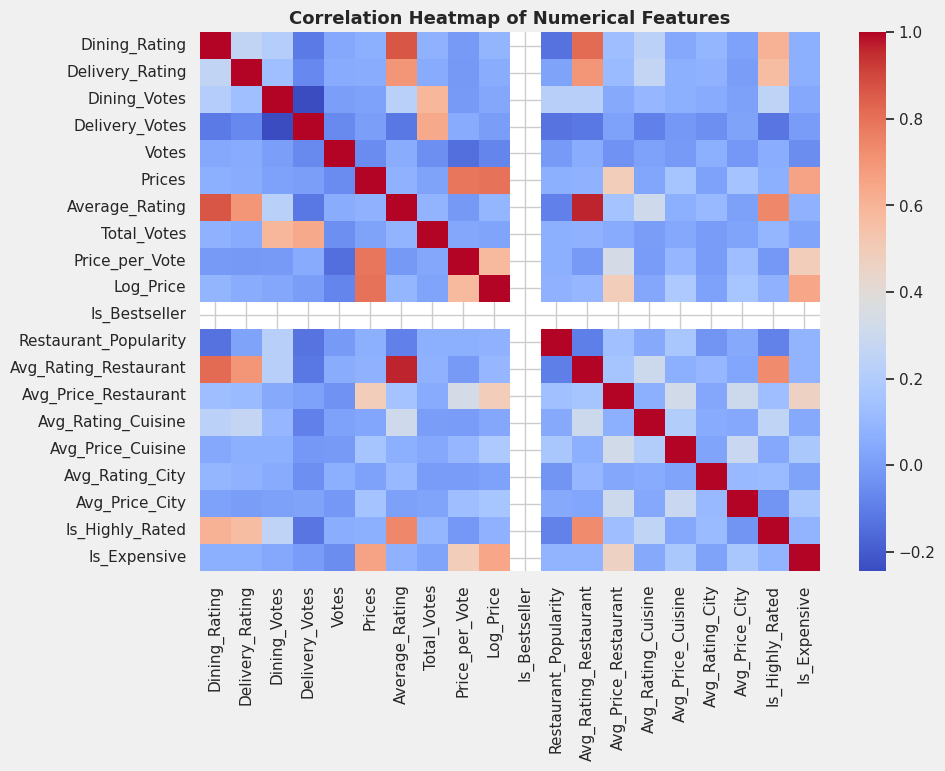

In [320]:
plt.figure(figsize=(10,7), facecolor='#f0f0f0')
corr = zomato.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features', fontsize=13, fontweight='bold')
plt.show()

**INSIGHTS**

* Votes, ratings, and Is_Bestseller are strongly correlated, signaling that social proof and perceived quality drive bestseller status.​

* Prices, Log_Price, Avg_Price_Restaurant, Avg_Price_City, and Is_Expensive cluster together, so price positioning and reference points are tightly linked.​

* Dining and delivery ratings are weakly correlated with prices or expensiveness, showing quality perception is not dictated by price alone.​

* Item/cuisine popularity and average ratings are mostly independent, implying menu breadth or cuisine type alone will not guarantee quality or votes.

##**A. Performance Analysis (Quality & Experience)**

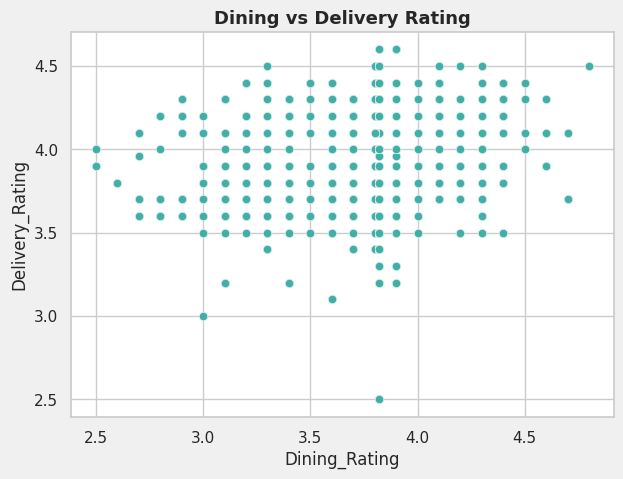

In [321]:
# 1. Dining vs Delivery Rating — Service Consistency ⭐
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Dining_Rating', y='Delivery_Rating', color = '#40B0A6', data=zomato, alpha=0.6)
plt.title('Dining vs Delivery Rating', fontsize=13, fontweight='bold')
plt.show()

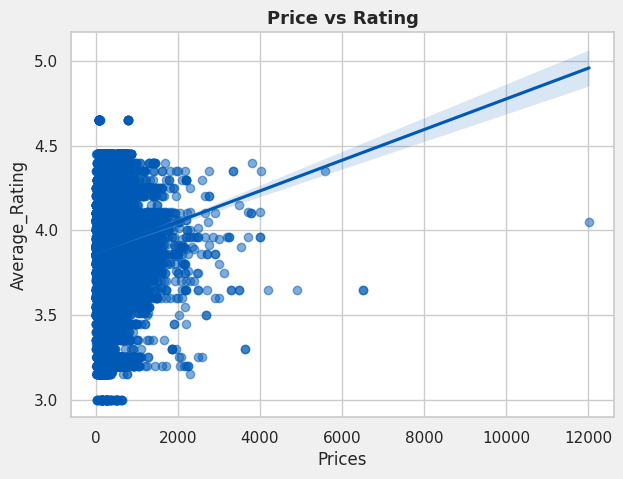

In [322]:
# 2. Average Rating vs Prices — Price–Quality Relationship ⭐
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.regplot(x='Prices', y='Average_Rating', data=zomato, color = '#005AB5', scatter_kws={'alpha':0.5})
plt.title('Price vs Rating', fontsize=13, fontweight='bold')
plt.show()

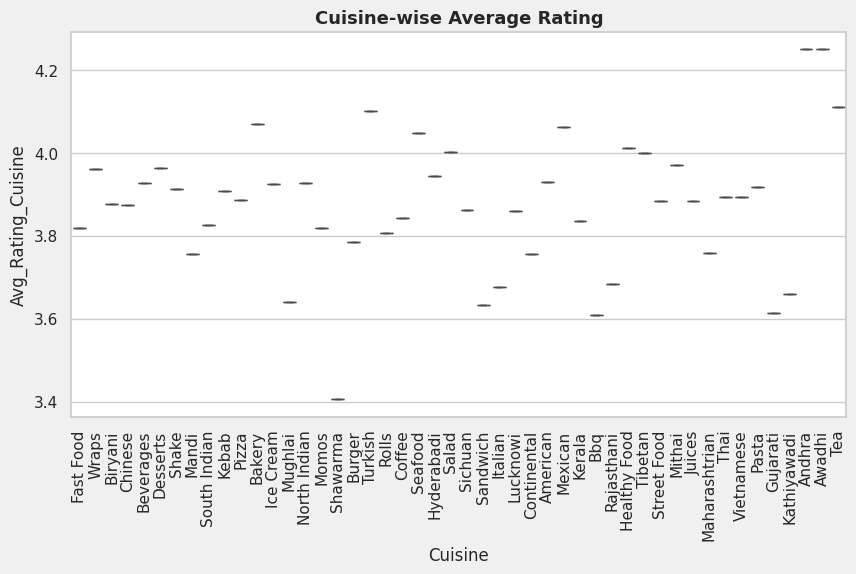

In [323]:
# 3. Average Rating by Cuisine
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.boxplot(x='Cuisine', y='Avg_Rating_Cuisine',data=zomato)
plt.xticks(rotation=90)
plt.title('Cuisine-wise Average Rating', fontsize=13, fontweight='bold')
plt.show()

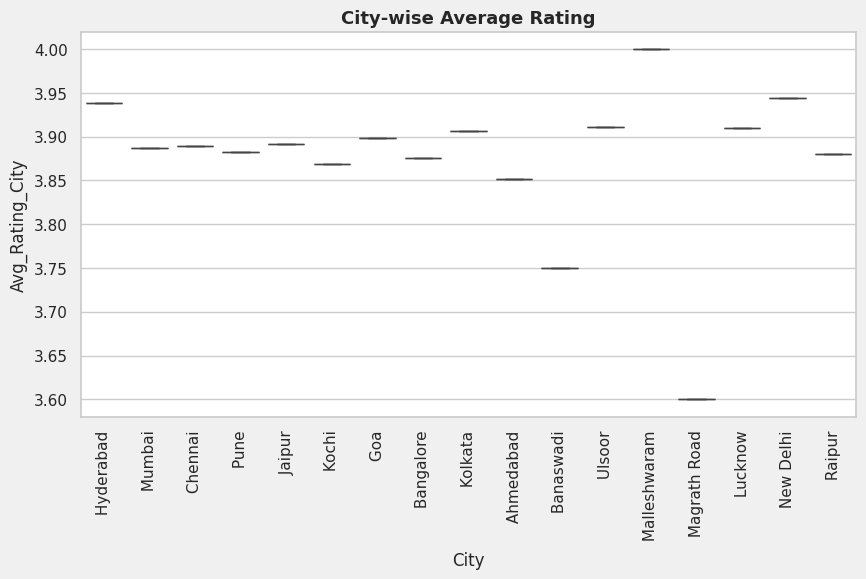

In [324]:
# 4. Average Rating by City
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.boxplot(x='City', y='Avg_Rating_City', color = '#E66100', data=zomato)
plt.xticks(rotation=90)
plt.title('City-wise Average Rating', fontsize=13, fontweight='bold')
plt.show()

**INSIGHTS**

* Cuisine averages sit mostly between ~3.8 and ~4.2 with a few cuisines reaching the top quartile near ~4.2–4.25, indicating limited headroom but clear leaders worth emphasizing.​

* Price vs. rating shows a weak upward trend with wide dispersion at low price points, meaning premium venues can earn high ratings but price alone does not guarantee quality perception.​

* Dining vs. delivery ratings are positively related but not equal; several points show delivery underperforming dining, flagging consistency and travel integrity issues.​

* City/locality averages are tightly banded, yet one or two areas lag by ~0.2–0.3 rating points, suggesting local execution or expectations drive measurable variance.

##**B. Engagement Analysis (Customer Interaction & Popularity)**

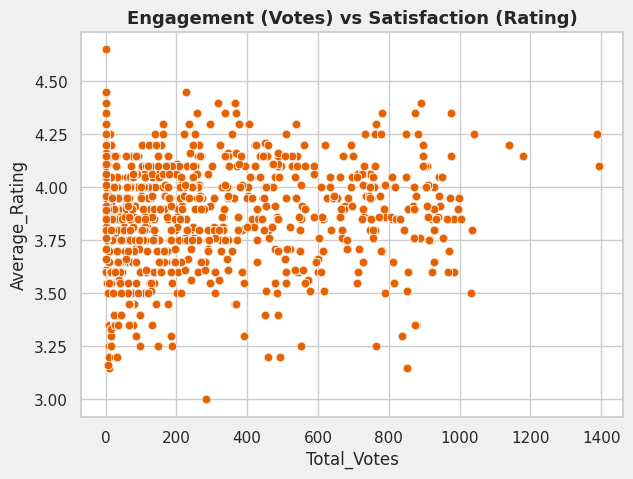

In [325]:
# 1. Total Votes vs Average Rating — Engagement vs Satisfaction ⭐
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Total_Votes', y='Average_Rating', color = '#E66100', data=zomato, alpha=0.6)
plt.title('Engagement (Votes) vs Satisfaction (Rating)', fontsize=13, fontweight='bold')
plt.show()

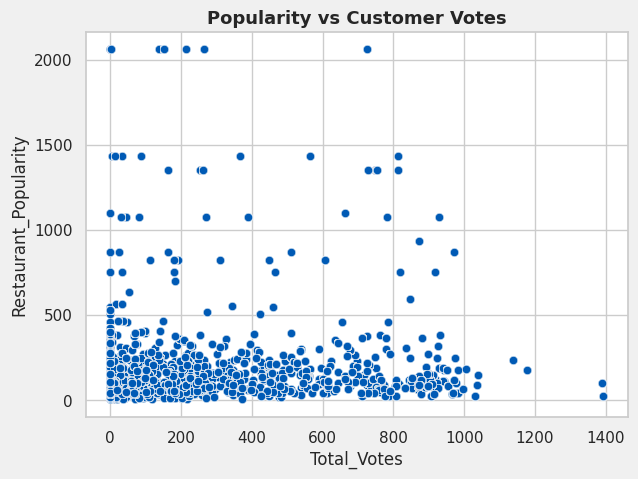

In [326]:
# 2. Restaurant Popularity vs Total Votes
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Total_Votes', y='Restaurant_Popularity', color = '#005AB5', data=zomato, alpha=0.6)
plt.title('Popularity vs Customer Votes', fontsize=13, fontweight='bold')
plt.show()

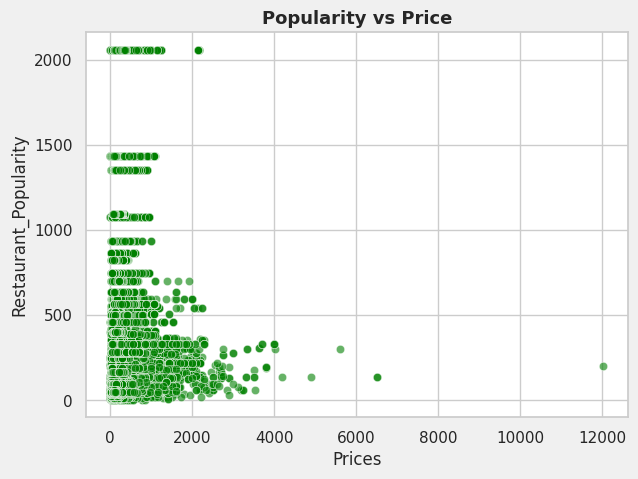

In [327]:
# 3. Restaurant Popularity vs Prices
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Prices', y='Restaurant_Popularity', color = 'Green', data=zomato, alpha=0.6)
plt.title('Popularity vs Price', fontsize=13, fontweight='bold')
plt.show()

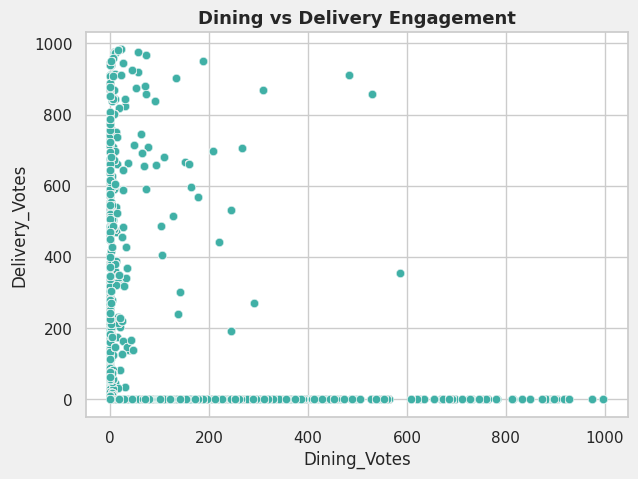

In [328]:
# 4. Dining Votes vs Delivery Votes
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Dining_Votes', y='Delivery_Votes', color = '#40B0A6', data=zomato, alpha=0.6)
plt.title('Dining vs Delivery Engagement', fontsize=13, fontweight='bold')
plt.show()

**INSIGHTS**

* Popularity scales with vote volume while satisfaction (ratings) rises only weakly with engagement, indicating demand visibility is driven more by how many customers speak up than by marginal rating gains.​​

* Popularity concentrates at accessible price points and drops off as prices rise, showing affordability and perceived value dominate discovery and traction on the platform.​

* Engagement is primarily delivery-led (many listings with high delivery votes but near‑zero dine‑in votes), so the growth flywheel lives in the off‑premise channel rather than on‑prem.

##**C. Pricing & Market Strategy**

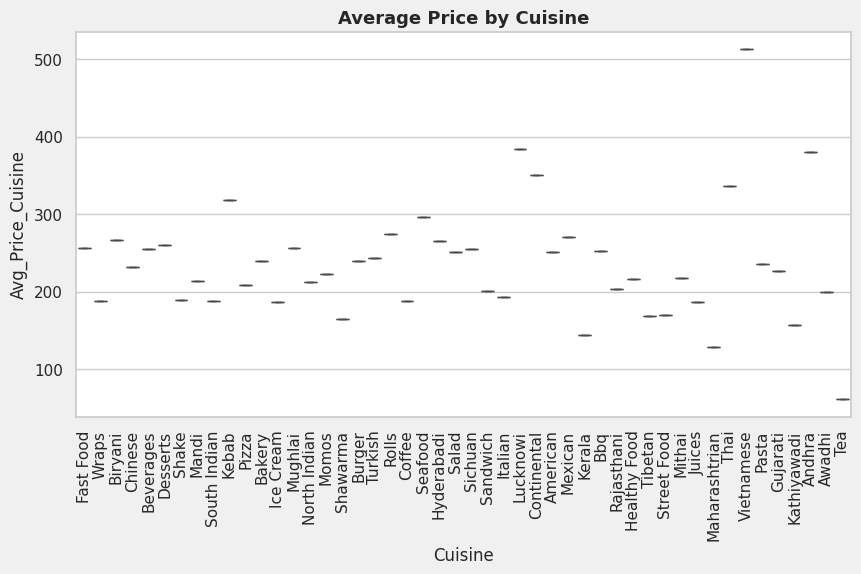

In [329]:
# 1. Average Price by Cuisine ⭐
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.boxplot(x='Cuisine', y='Avg_Price_Cuisine', data=zomato)
plt.xticks(rotation=90)
plt.title('Average Price by Cuisine', fontsize=13, fontweight='bold')
plt.show()

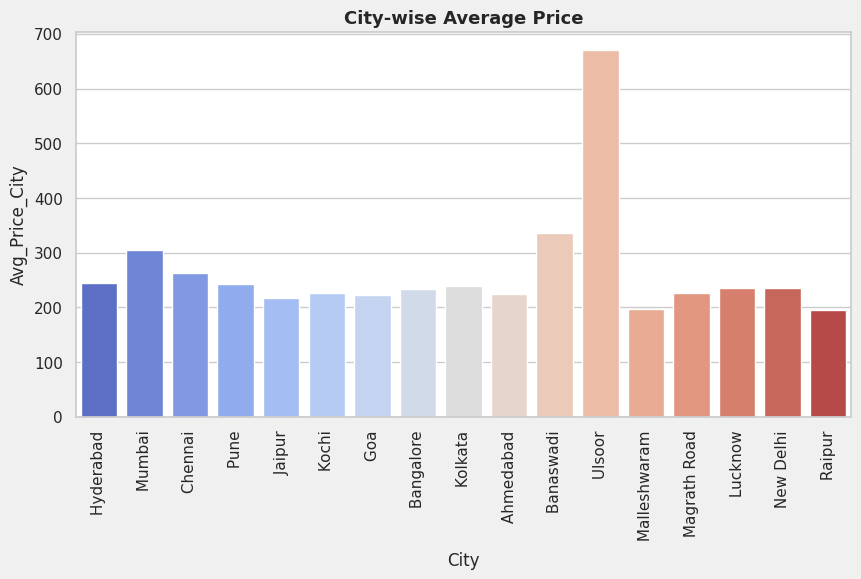

In [330]:
# 2. Average Price by City ⭐
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.barplot(x='City', y='Avg_Price_City', data=zomato, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('City-wise Average Price', fontsize=13, fontweight='bold')
plt.show()

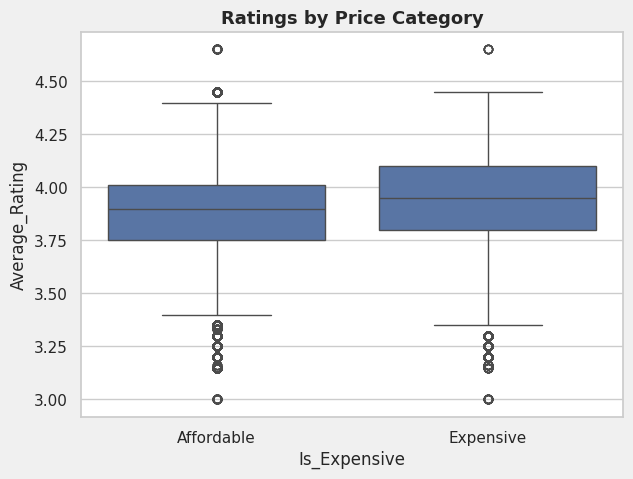

In [331]:
# 3. Expensive vs Affordable — Rating Perception
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.boxplot(x='Is_Expensive', y='Average_Rating', data=zomato)
plt.xticks([0,1], ['Affordable', 'Expensive'])
plt.title('Ratings by Price Category', fontsize=13, fontweight='bold')
plt.show()

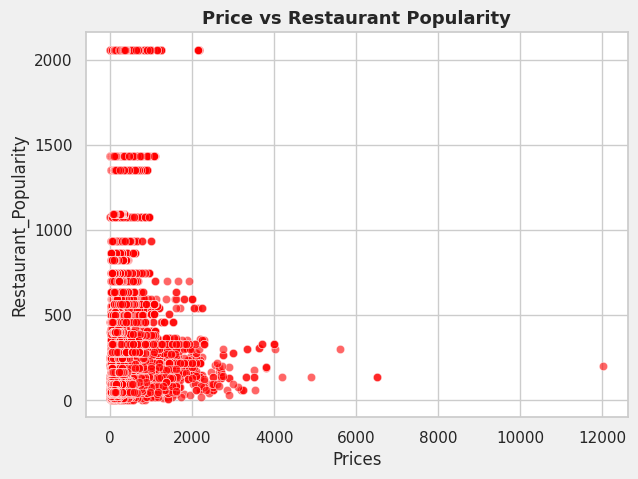

In [332]:
# 4. Price vs Popularity
plt.figure(figsize=(7,5), facecolor='#f0f0f0')
sns.scatterplot(x='Prices', y='Restaurant_Popularity', color = 'Red', data=zomato, alpha=0.6)
plt.title('Price vs Restaurant Popularity', fontsize=13, fontweight='bold')
plt.show()

**INSIGHTS**

* Popularity clusters at lower price points and thins out rapidly as prices rise, showing demand is value‑driven rather than price‑led.​

* Expensive venues show only a marginally higher median rating with heavy overlap versus affordable places, so higher price does not reliably buy higher satisfaction.​

* Average prices vary widely across cities, with some localities priced substantially above others, implying distinct willingness‑to‑pay bands and mispricing risk if a single policy is used.​

* Cuisines exhibit material price dispersion, indicating certain cuisines can sustain premium positioning while everyday/snack categories work best as entry‑price traffic drivers.

##**D. Menu & Product Insights (Offer Optimization)**

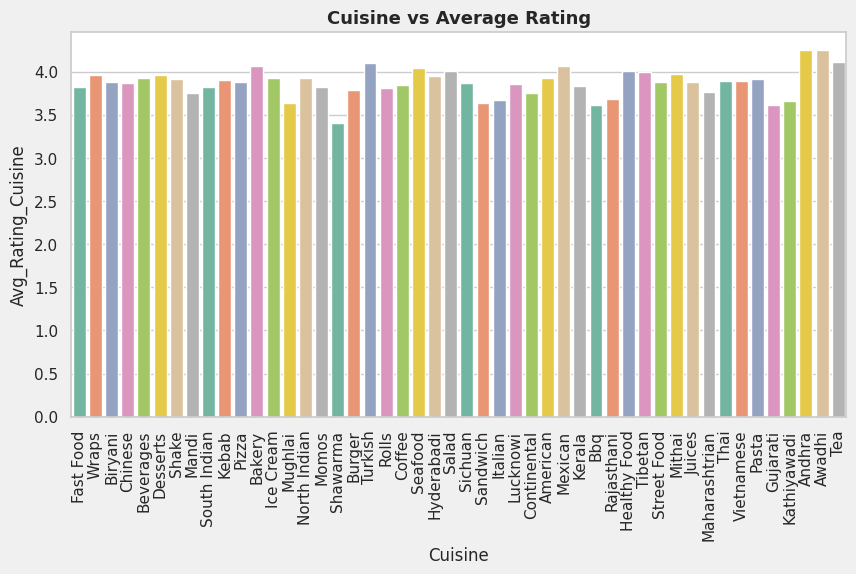

In [333]:
# 1. Cuisine vs Avg Rating — Menu Quality Insight ⭐
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.barplot(x='Cuisine', y='Avg_Rating_Cuisine', data=zomato, palette='Set2')
plt.xticks(rotation=90)
plt.title('Cuisine vs Average Rating', fontsize=13, fontweight='bold')
plt.show()

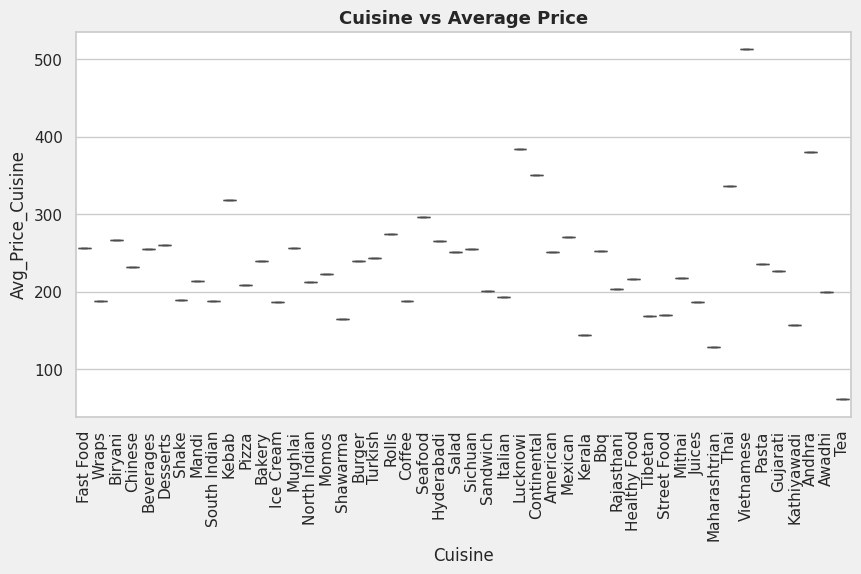

In [334]:
# 2. Cuisine vs Avg Price
plt.figure(figsize=(10,5), facecolor='#f0f0f0')
sns.boxplot(x='Cuisine', y='Avg_Price_Cuisine', data=zomato)
plt.xticks(rotation=90)
plt.title('Cuisine vs Average Price', fontsize=13, fontweight='bold')
plt.show()

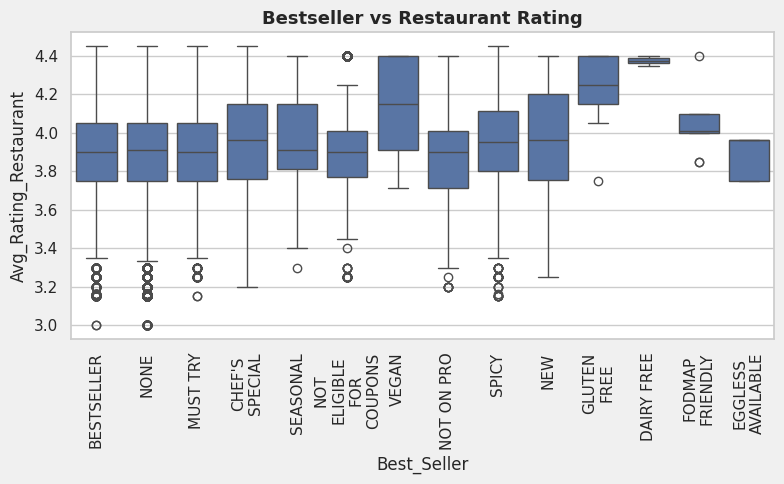

In [335]:
# 3. Best Seller vs Rating ⭐

plt.figure(figsize=(8,5), facecolor='#f0f0f0')
# Wrap x-axis labels (e.g., long Best_Seller names)
wrapped_labels = ['\n'.join(wrap(str(label), 10)) for label in zomato['Best_Seller'].unique()]
sns.boxplot(x='Best_Seller', y='Avg_Rating_Restaurant', data=zomato)
plt.title('Bestseller vs Restaurant Rating', fontsize=13, fontweight='bold')
# Apply wrapped labels to x-axis
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=90)

plt.tight_layout()
plt.show()

**INSIGHTS**

* Most cuisines cluster at 3.7–4.1 average rating, but select cuisines (Awadhi, Tea, Italian) consistently exceed 4.1, reflecting uniquely high satisfaction in these segments.​

* Substantial price dispersion exists across cuisines, with some (like Awadhi, Italian) supporting both high average ratings and higher average prices, showing real promise for premium positioning.​

* Items tagged as “Bestseller,” “Vegan,” or “Gluten Free” are associated with higher median ratings, whereas “Not on Pro” or “Eligible for Coupons” items tend toward lower ratings and higher variability.​

* Quality perception is generally even across most cuisines, but focused clusters of excellence and premium potential stand out.

#**9. Exploratory Data Analysis - Multivariate Analysis**

##**A. CATEGORY-BASED ANALYSIS (Cuisine Performance)**

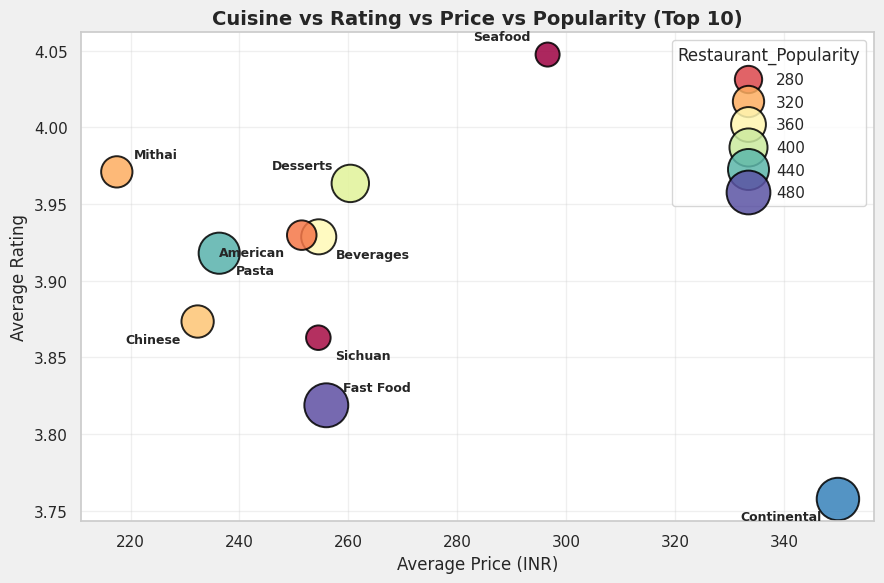

In [336]:
# ⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')

# one-liner data prep
top_cuisines = zomato.groupby('Cuisine').agg({'Average_Rating':'mean','Prices':'mean','Restaurant_Popularity':'mean'}).reset_index().nlargest(10,'Restaurant_Popularity')

# single-line plot call
sns.scatterplot(data=top_cuisines, x='Prices', y='Average_Rating', size='Restaurant_Popularity', hue='Restaurant_Popularity', palette='Spectral', sizes=(300,1000), alpha=0.85, edgecolor='black', legend='brief')

# annotate with small alternating offsets to reduce overlap (stable, no extra package)
for i,(x,y,label) in enumerate(zip(top_cuisines['Prices'], top_cuisines['Average_Rating'], top_cuisines['Cuisine'])):
    dx = 12 if i % 2 == 0 else -12        # horizontal offset in points
    dy = 8 if i % 3 == 0 else -8          # vertical offset in points
    plt.annotate(label, xy=(x,y), xytext=(dx,dy), textcoords='offset points', fontsize=9, weight='bold',
                 ha='left' if dx>0 else 'right', va='bottom' if dy>0 else 'top')

plt.title('Cuisine vs Rating vs Price vs Popularity (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (INR)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

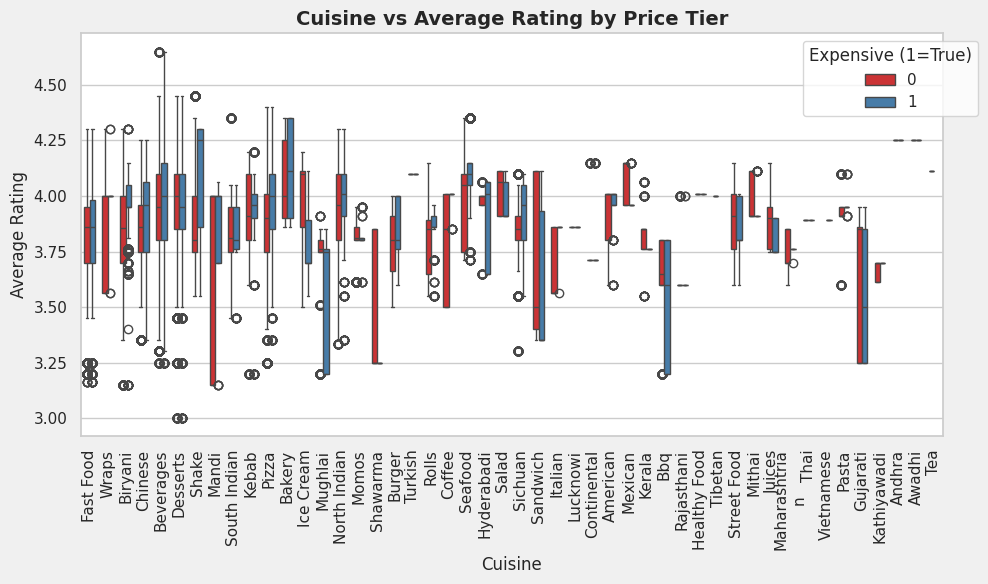

In [337]:
# ⭐
plt.figure(figsize=(10,6), facecolor='#f0f0f0')

# Wrap long cuisine names
wrapped_labels = ['\n'.join(wrap(str(label), 12)) for label in zomato['Cuisine'].unique()]

sns.boxplot(data=zomato,x='Cuisine', y='Average_Rating', hue='Is_Expensive',palette='Set1', width=0.6)

plt.title('Cuisine vs Average Rating by Price Tier', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=0)
plt.legend(title='Expensive (1=True)', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

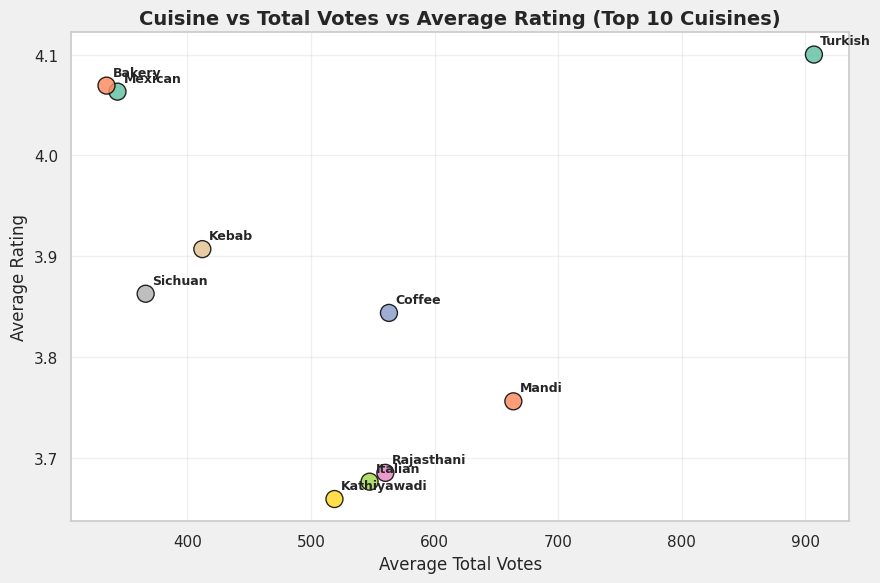

In [338]:
# Summarize by cuisine
cuisine_votes = zomato.groupby('Cuisine').agg({'Total_Votes': 'mean','Average_Rating': 'mean'}).reset_index()

# Select top 10 cuisines by average votes
top_cuisine_votes = cuisine_votes.nlargest(10, 'Total_Votes')

# Plot
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
sns.scatterplot(data=top_cuisine_votes,x='Total_Votes', y='Average_Rating',hue='Cuisine', s=150, palette='Set2', alpha=0.85, edgecolor='black', legend=False)

# Label points with cuisine names
for i, row in top_cuisine_votes.iterrows():
    plt.text(row['Total_Votes']+5, row['Average_Rating']+0.01, row['Cuisine'], fontsize=9, weight='bold')

plt.title('Cuisine vs Total Votes vs Average Rating (Top 10 Cuisines)', fontsize=14, fontweight='bold')
plt.xlabel('Average Total Votes', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


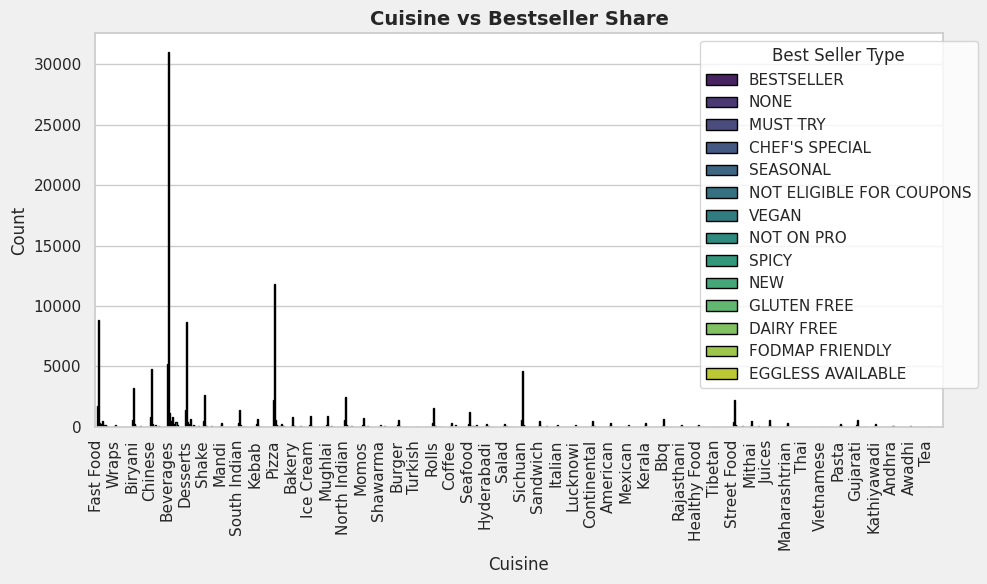

In [339]:
plt.figure(figsize=(10,6), facecolor='#f0f0f0')

sns.countplot(data=zomato,x='Cuisine', hue='Best_Seller',palette='viridis', edgecolor='black')

plt.title('Cuisine vs Bestseller Share', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Best Seller Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**INSIGHTS**

* Bestseller share is largest in beverage and QSR-friendly categories (beverages, fast food, desserts, pizza, biryani).​

* High average ratings with strong popularity are seen for seafood, bakery, Turkish, and American, but some regional types are high-rated but less popular (e.g., Mithai, Mexican).​

* Expensive items do not always command higher ratings—affordable items often have broad appeal and positive feedback.​

* Most cuisines have wide spreads in ratings by price tier, showing value-for-money is key across categories.

##**B. MARKET-BASED ANALYSIS (City & Location Insights)**

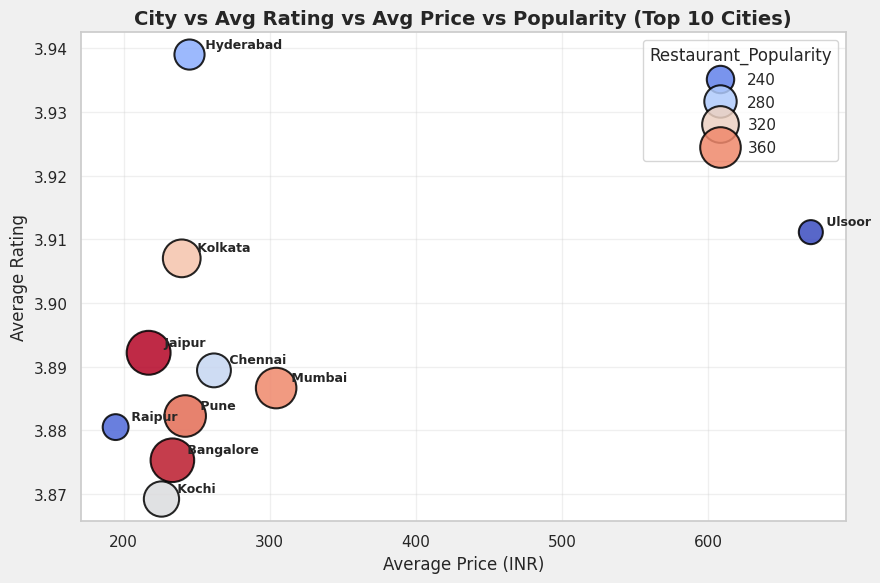

In [340]:
# ⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
city_summary = zomato.groupby('City').agg({'Average_Rating':'mean','Prices':'mean','Restaurant_Popularity':'mean'}).reset_index().nlargest(10,'Restaurant_Popularity')
sns.scatterplot(data=city_summary, x='Prices', y='Average_Rating', size='Restaurant_Popularity', hue='Restaurant_Popularity', palette='coolwarm', sizes=(300,1000), alpha=0.85, edgecolor='black', legend='brief')
for i,(x,y,label) in enumerate(zip(city_summary['Prices'], city_summary['Average_Rating'], city_summary['City'])):
    plt.annotate(label, xy=(x,y), xytext=(8,5), textcoords='offset points', fontsize=9, weight='bold')
plt.title('City vs Avg Rating vs Avg Price vs Popularity (Top 10 Cities)', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


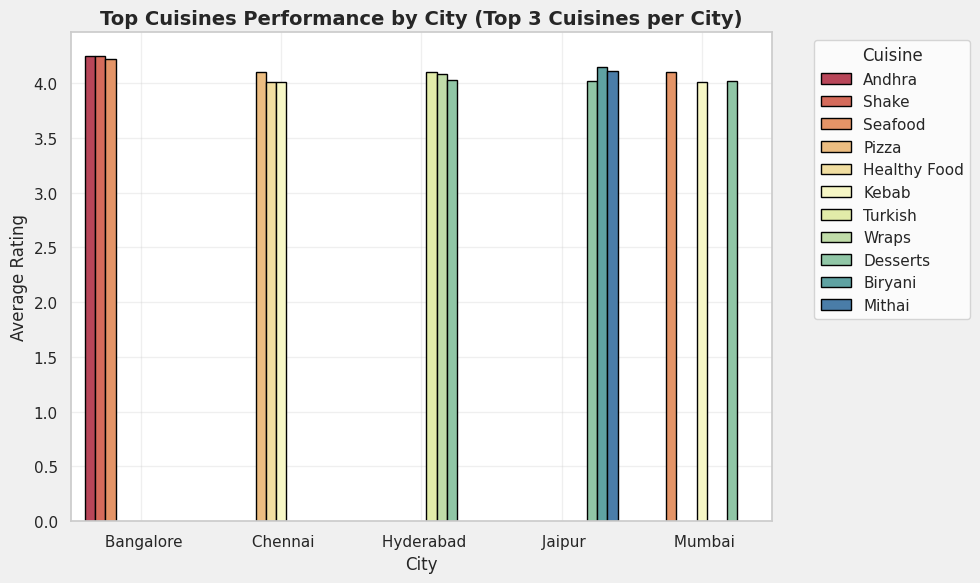

In [341]:
# ⭐
plt.figure(figsize=(10,6), facecolor='#f0f0f0')
top_cities = zomato['City'].value_counts().head(5).index
top_cuisine_city = zomato[zomato['City'].isin(top_cities)].groupby(['City','Cuisine']).agg({'Average_Rating':'mean'}).reset_index()
top_cuisine_city = top_cuisine_city.groupby('City').apply(lambda x: x.nlargest(3,'Average_Rating')).reset_index(drop=True)
sns.barplot(data=top_cuisine_city, x='City', y='Average_Rating', hue='Cuisine', palette='Spectral', edgecolor='black')
plt.title('Top Cuisines Performance by City (Top 3 Cuisines per City)', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Cuisine', bbox_to_anchor=(1.05,1), loc='upper left'); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

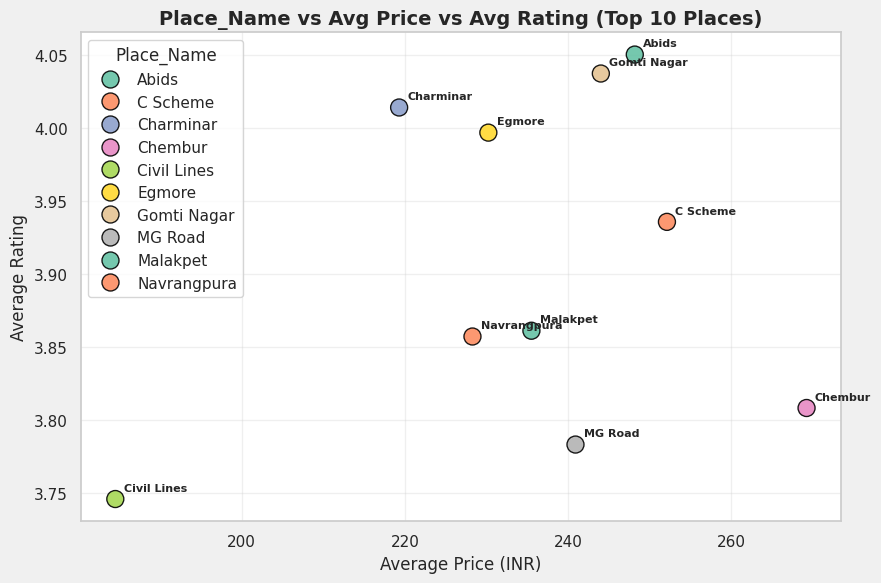

In [342]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
top_places = zomato['Place_Name'].value_counts().head(10).index
place_summary = zomato[zomato['Place_Name'].isin(top_places)].groupby('Place_Name').agg({'Prices':'mean','Average_Rating':'mean'}).reset_index()
sns.scatterplot(data=place_summary, x='Prices', y='Average_Rating', hue='Place_Name', palette='Set2', s=150, alpha=0.9, edgecolor='black')
for i,(x,y,label) in enumerate(zip(place_summary['Prices'], place_summary['Average_Rating'], place_summary['Place_Name'])):
    plt.annotate(label, xy=(x,y), xytext=(6,6), textcoords='offset points', fontsize=8, weight='bold')
plt.title('Place_Name vs Avg Price vs Avg Rating (Top 10 Places)', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

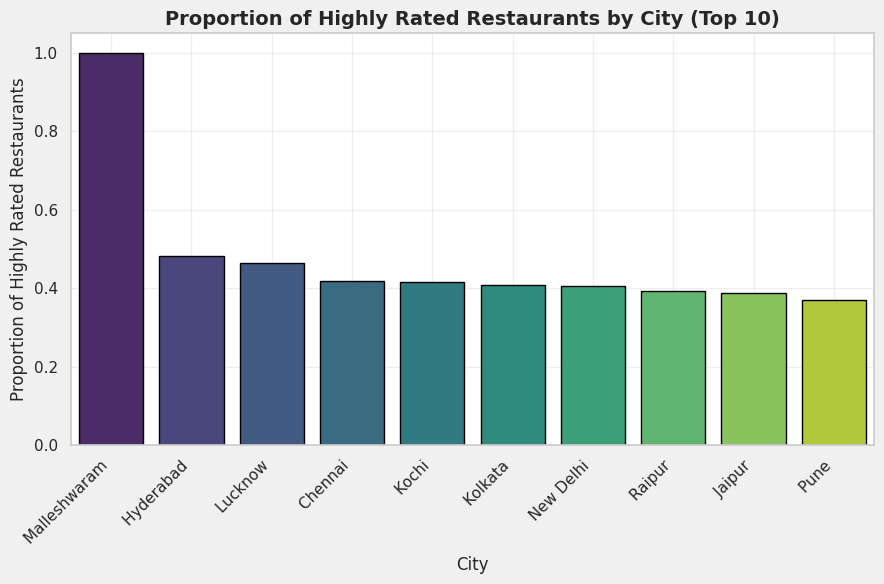

In [343]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
city_highly_rated = zomato.groupby('City')['Is_Highly_Rated'].mean().reset_index().sort_values(by='Is_Highly_Rated', ascending=False).head(10)
sns.barplot(data=city_highly_rated, x='City', y='Is_Highly_Rated', palette='viridis', edgecolor='black')
plt.title('Proportion of Highly Rated Restaurants by City (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12); plt.ylabel('Proportion of Highly Rated Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right'); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

**INSIGHTS**

* Share of highly rated restaurants peaks in Malleswaram (~100%), followed by Hyderabad and Lucknow at ~0.47–0.49, with other metros clustered near ~0.38–0.42.​

* City rating–price map: Hyderabad has the highest average rating (3.94) at mid prices (250), Kolkata is next (3.91) at lower prices (240), while Ulsoor is premium priced (660) with solid ratings (~3.91).​

* Place‑level sweet spots: Abids (250 INR, 4.05), Gomti Nagar (245, 4.03), Charminar (218, 4.01), and Egmore (232, 3.99) outperform at mid prices; Chembur (270, 3.81) and Civil Lines (~185, ~3.75) underperform on rating.​

* City x cuisine fit: Bangalore’s top‑rated are Andhra/Seafood/Shakes (4.1–4.2); Chennai favors Pizza/Healthy/Mithai (4.0–4.1); Hyderabad favors Wraps/Desserts/Biryani (4.0–4.1); Jaipur favors Mithai/Kebab/Turkish (4.0–4.1); Mumbai favors Pizza/Turkish/Wraps (~4.0–4.1).

##**C. CHANNEL-BASED ANALYSIS (Dining vs Delivery)**

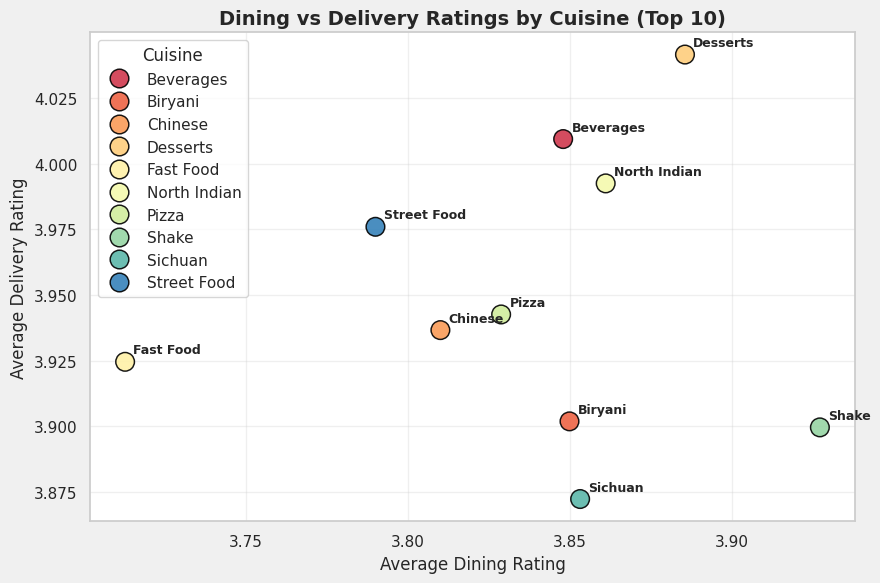

In [344]:
#⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
top_cuisines = zomato['Cuisine'].value_counts().head(10).index
cuisine_ratings = zomato[zomato['Cuisine'].isin(top_cuisines)].groupby('Cuisine')[['Dining_Rating','Delivery_Rating']].mean().reset_index()
sns.scatterplot(data=cuisine_ratings, x='Dining_Rating', y='Delivery_Rating', hue='Cuisine', s=180, alpha=0.9, edgecolor='black', palette='Spectral')
for i,(x,y,label) in enumerate(zip(cuisine_ratings['Dining_Rating'], cuisine_ratings['Delivery_Rating'], cuisine_ratings['Cuisine'])):
    plt.annotate(label, xy=(x,y), xytext=(6,6), textcoords='offset points', fontsize=9, weight='bold')
plt.title('Dining vs Delivery Ratings by Cuisine (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Average Dining Rating', fontsize=12); plt.ylabel('Average Delivery Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

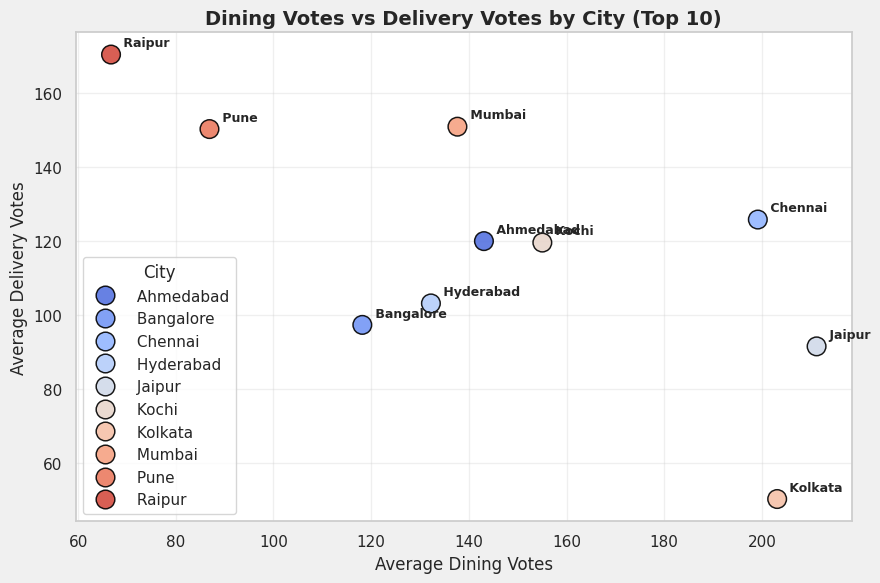

In [345]:
#⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
top_cities = zomato['City'].value_counts().head(10).index
city_votes = zomato[zomato['City'].isin(top_cities)].groupby('City')[['Dining_Votes','Delivery_Votes']].mean().reset_index()
sns.scatterplot(data=city_votes, x='Dining_Votes', y='Delivery_Votes', hue='City', s=180, alpha=0.9, edgecolor='black', palette='coolwarm')
for i,(x,y,label) in enumerate(zip(city_votes['Dining_Votes'], city_votes['Delivery_Votes'], city_votes['City'])):
    plt.annotate(label, xy=(x,y), xytext=(6,6), textcoords='offset points', fontsize=9, weight='bold')
plt.title('Dining Votes vs Delivery Votes by City (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Average Dining Votes', fontsize=12); plt.ylabel('Average Delivery Votes', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

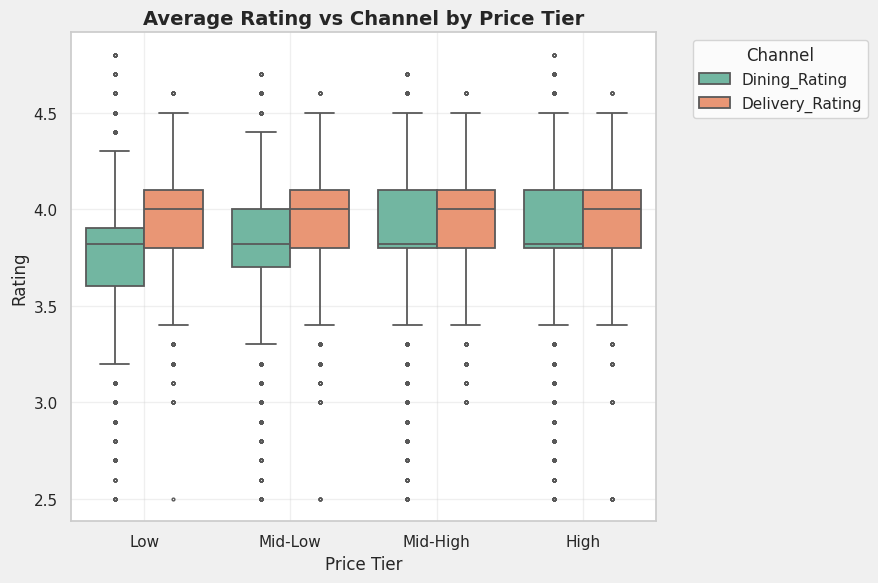

In [346]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
zomato['Price_Tier'] = pd.qcut(zomato['Prices'], q=4, labels=['Low','Mid-Low','Mid-High','High'])
ratings_long = zomato.melt(id_vars=['Price_Tier'], value_vars=['Dining_Rating','Delivery_Rating'], var_name='Channel', value_name='Rating')
sns.boxplot(data=ratings_long, x='Price_Tier', y='Rating', hue='Channel', palette='Set2', fliersize=2, linewidth=1.3)
plt.title('Average Rating vs Channel by Price Tier', fontsize=14, fontweight='bold')
plt.xlabel('Price Tier', fontsize=12); plt.ylabel('Rating', fontsize=12)
plt.legend(title='Channel', bbox_to_anchor=(1.05,1), loc='upper left'); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

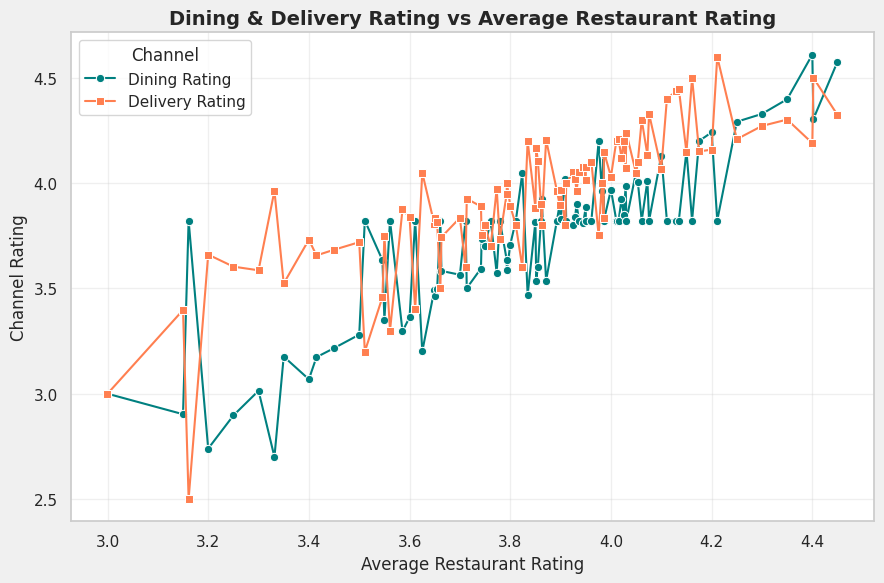

In [347]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
avg_rating_trend = zomato.groupby('Avg_Rating_Restaurant')[['Dining_Rating','Delivery_Rating']].mean().reset_index().sort_values(by='Avg_Rating_Restaurant')
sns.lineplot(data=avg_rating_trend, x='Avg_Rating_Restaurant', y='Dining_Rating', marker='o', label='Dining Rating', color='teal')
sns.lineplot(data=avg_rating_trend, x='Avg_Rating_Restaurant', y='Delivery_Rating', marker='s', label='Delivery Rating', color='coral')
plt.title('Dining & Delivery Rating vs Average Restaurant Rating', fontsize=14, fontweight='bold')
plt.xlabel('Average Restaurant Rating', fontsize=12); plt.ylabel('Channel Rating', fontsize=12)
plt.grid(alpha=0.3); plt.legend(title='Channel'); plt.tight_layout(); plt.show()

**INSIGHTS**

* City split: Raipur and Pune have far more delivery votes than dining, while Jaipur and Kolkata skew toward dine‑in; Mumbai shows delivery > dining despite mid dining strength.​

* Channel quality: Delivery ratings run slightly higher than dining at nearly all average‑rating levels, rising together as overall restaurant quality improves.​

* By cuisine: Desserts, beverages, and North Indian show delivery ratings at or above dining, with fast food notably stronger on delivery; only minor gaps appear for categories like shakes.​

* By price tier: Delivery holds a higher median rating than dining from low to high tiers, and dispersion increases with price—value consistency matters more than premium.

##**D. VALUE-BASED ANALYSIS (Pricing & Rating Interactions)**

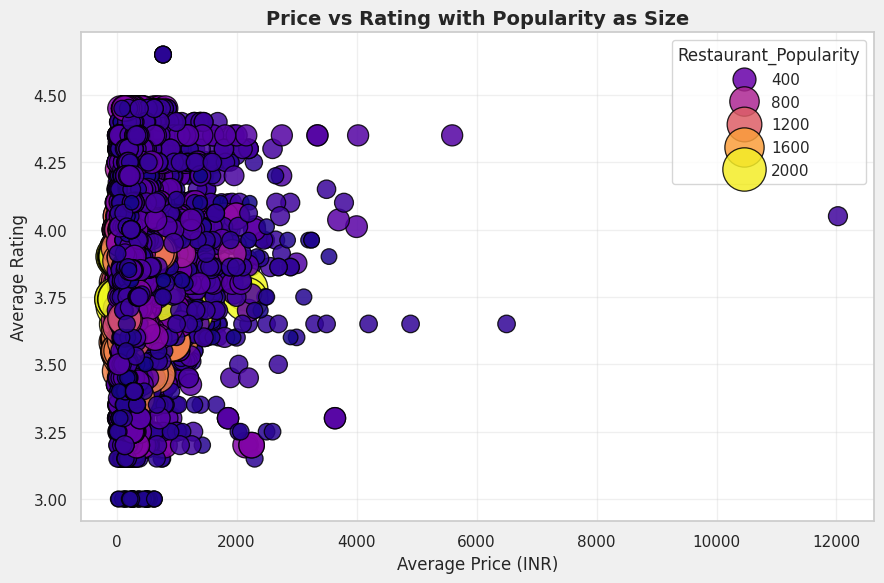

In [348]:
#⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
price_rating = zomato.groupby('Item_Name').agg({'Prices':'mean','Average_Rating':'mean','Restaurant_Popularity':'mean'}).reset_index()
sns.scatterplot(data=price_rating, x='Prices', y='Average_Rating', size='Restaurant_Popularity', hue='Restaurant_Popularity', palette='plasma', sizes=(100,1000), alpha=0.85, edgecolor='black', legend='brief')
plt.title('Price vs Rating with Popularity as Size', fontsize=14, fontweight='bold')
plt.xlabel('Average Price (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

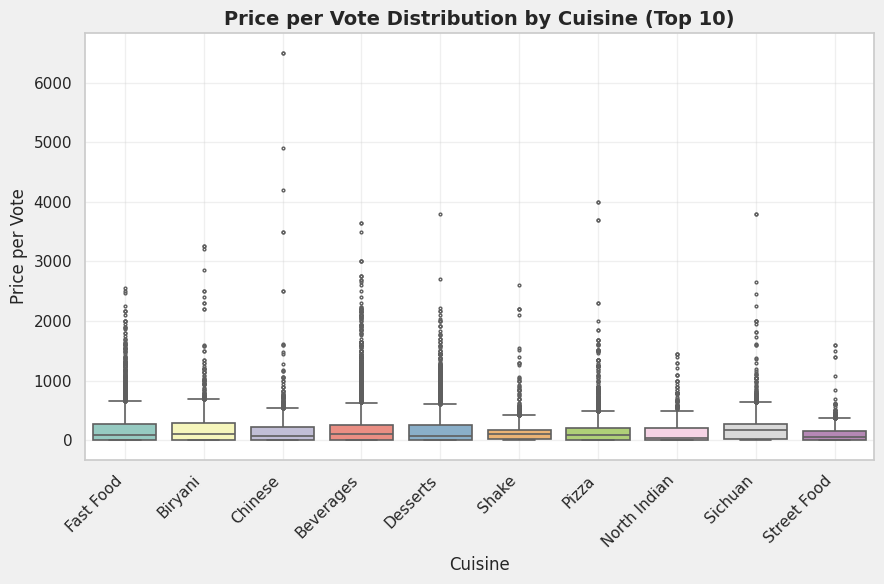

In [349]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
top_cuisines = zomato['Cuisine'].value_counts().head(10).index
sns.boxplot(data=zomato[zomato['Cuisine'].isin(top_cuisines)], x='Cuisine', y='Price_per_Vote', palette='Set3', linewidth=1.2, fliersize=2)
plt.title('Price per Vote Distribution by Cuisine (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine', fontsize=12); plt.ylabel('Price per Vote', fontsize=12)
plt.xticks(rotation=45, ha='right'); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

<Figure size 800x600 with 0 Axes>

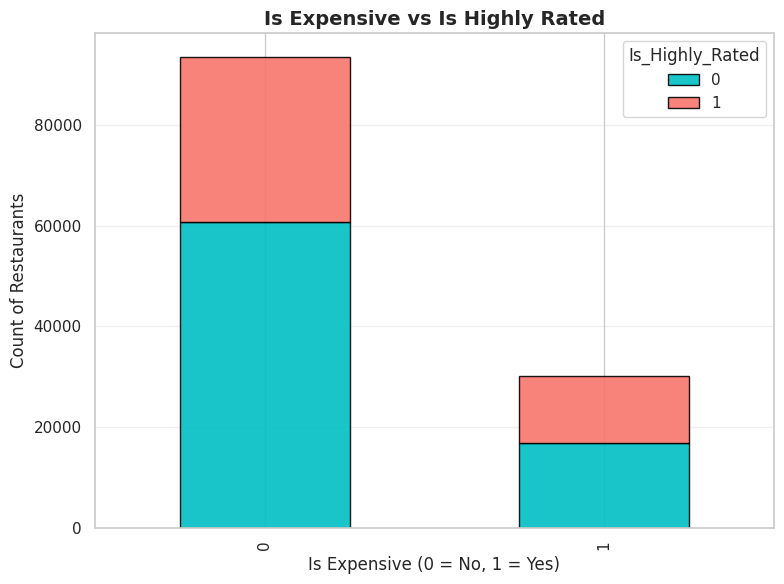

In [350]:
plt.figure(figsize=(8,6), facecolor='#f0f0f0')
expensive_rating = zomato.groupby(['Is_Expensive','Is_Highly_Rated']).size().unstack(fill_value=0)
expensive_rating.plot(kind='bar', stacked=True, color=['#00bfc4','#f8766d'], edgecolor='black', figsize=(8,6), alpha=0.9)
plt.title('Is Expensive vs Is Highly Rated', fontsize=14, fontweight='bold')
plt.xlabel('Is Expensive (0 = No, 1 = Yes)', fontsize=12); plt.ylabel('Count of Restaurants', fontsize=12)
plt.grid(alpha=0.3, axis='y'); plt.tight_layout(); plt.show()

**INSIGHTS**

* Popularity and observations cluster heavily at sub‑₹500–₹3000 with ratings spread across 3.0–4.6, while high‑price outliers are rare and not systematically higher rated.​

* Price_per_Vote shows long right tails across cuisines; the lower median bands appear in fast food, shakes, and street food, indicating accessible value positions, while Chinese/Sichuan/beverages show higher dispersion and tails.​

* High ratings occur in both “not expensive” and “expensive” groups, but the majority of highly rated items sit in the not‑expensive bucket, proving a premium tag is not required to hit ≥4.0.​

* Wide PPV variability within each cuisine suggests portion size, bundling, and discounting drive perceived value more than category alone.

##**E. ENGAGEMENT & QUALITY ANALYSIS (Votes & Popularity)**

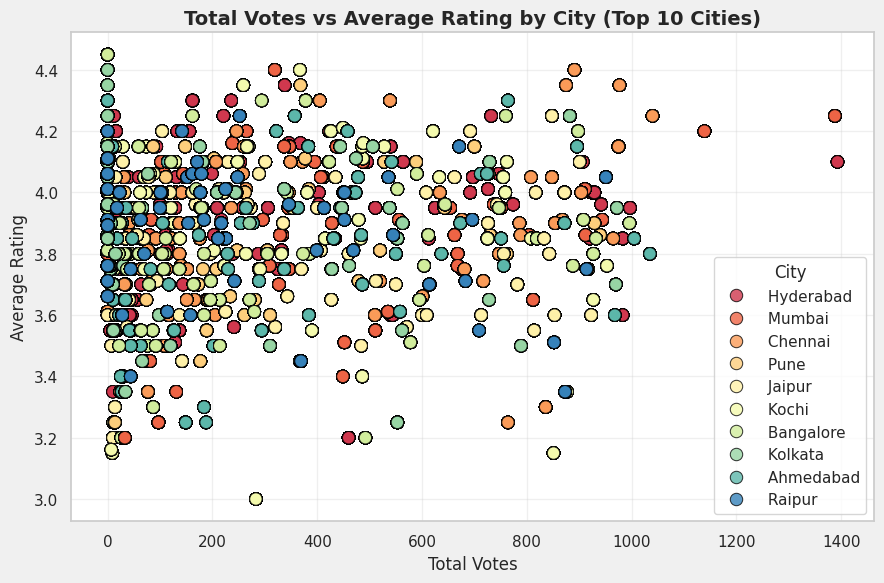

In [351]:
#⭐
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
top_cities = zomato['City'].value_counts().head(10).index
votes_rating_city = zomato[zomato['City'].isin(top_cities)]
sns.scatterplot(data=votes_rating_city, x='Total_Votes', y='Average_Rating', hue='City', palette='Spectral', alpha=0.8, s=80, edgecolor='black')
plt.title('Total Votes vs Average Rating by City (Top 10 Cities)', fontsize=14, fontweight='bold')
plt.xlabel('Total Votes', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

In [352]:
# ⭐
fig = px.scatter(zomato, x='Restaurant_Popularity', y='Avg_Rating_Cuisine', color='Cuisine',hover_data=['Restaurant_Name'], size_max=10,title='Restaurant Popularity vs Average Cuisine Rating',color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(plot_bgcolor='#f0f0f0')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

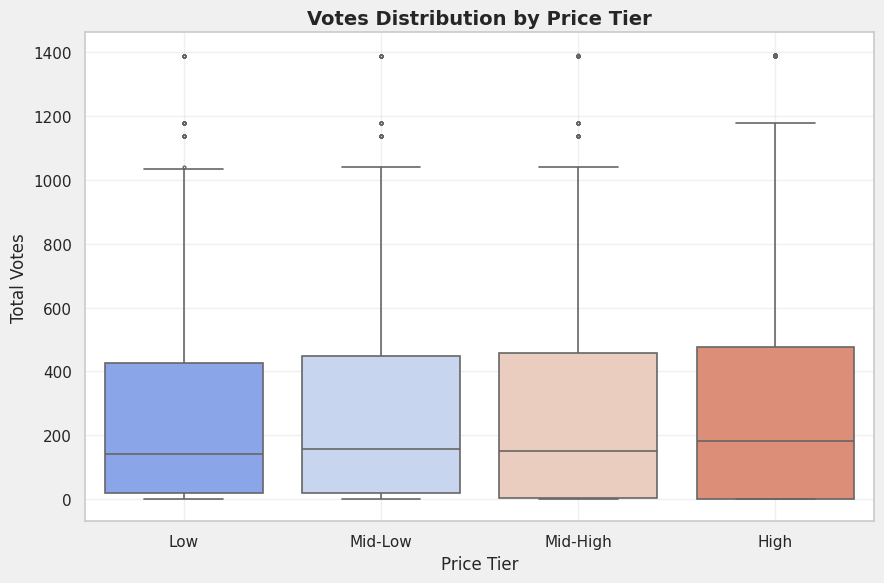

In [353]:
plt.figure(figsize=(9,6), facecolor='#f0f0f0')
zomato['Price_Tier'] = pd.qcut(zomato['Prices'], q=4, labels=['Low','Mid-Low','Mid-High','High'])
sns.boxplot(data=zomato, x='Price_Tier', y='Total_Votes', palette='coolwarm', linewidth=1.2, fliersize=2)
plt.title('Votes Distribution by Price Tier', fontsize=14, fontweight='bold')
plt.xlabel('Price Tier', fontsize=12); plt.ylabel('Total Votes', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


**INSIGHTS**

* Votes vs rating shows weak coupling: items span 3.5–4.3 across all vote levels, with many low‑vote items and a smaller head beyond ~500 votes indicating social‑proof concentration.​

* Higher price tiers have slightly higher median votes but huge dispersion, confirming visibility is gained by engagement tactics rather than price alone.​

* Restaurant_Popularity (catalog size proxy) is largely uncorrelated with Avg_Rating_Cuisine; very popular menus still hover near ~3.8–4.0, implying diminishing returns from breadth.

##**F. STRATEGIC COMBINATION ANALYSIS (Cuisine + City + Price)**

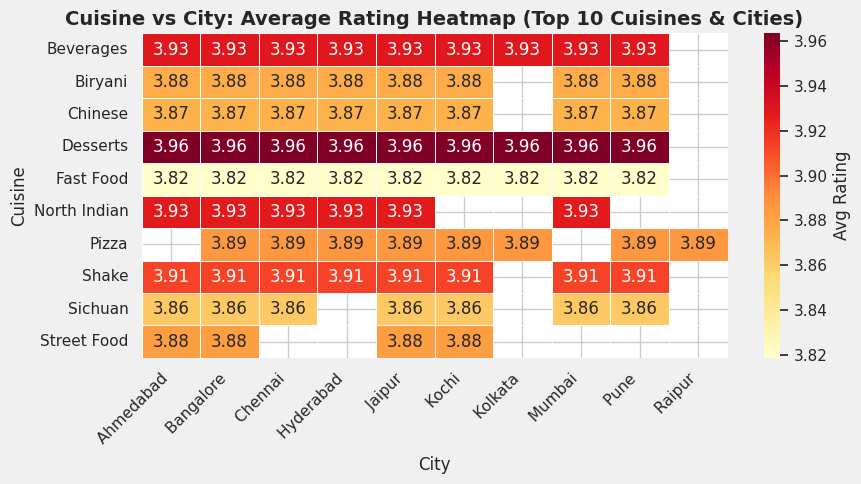

In [354]:
#⭐
# pick top 10 cuisines and top 10 cities to keep the heatmap readable
top_cuisines = zomato['Cuisine'].value_counts().head(10).index
top_cities = zomato['City'].value_counts().head(10).index

# prepare pivot table safely
heat_data = zomato[zomato['Cuisine'].isin(top_cuisines) & zomato['City'].isin(top_cities)]
pivot_data = heat_data.pivot_table(index='Cuisine', columns='City', values='Avg_Rating_Cuisine', aggfunc='mean')

# plot
plt.figure(figsize=(9,5), facecolor='#f0f0f0')
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label':'Avg Rating'}, square=False)
plt.title('Cuisine vs City: Average Rating Heatmap (Top 10 Cuisines & Cities)', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12); plt.ylabel('Cuisine', fontsize=12)
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

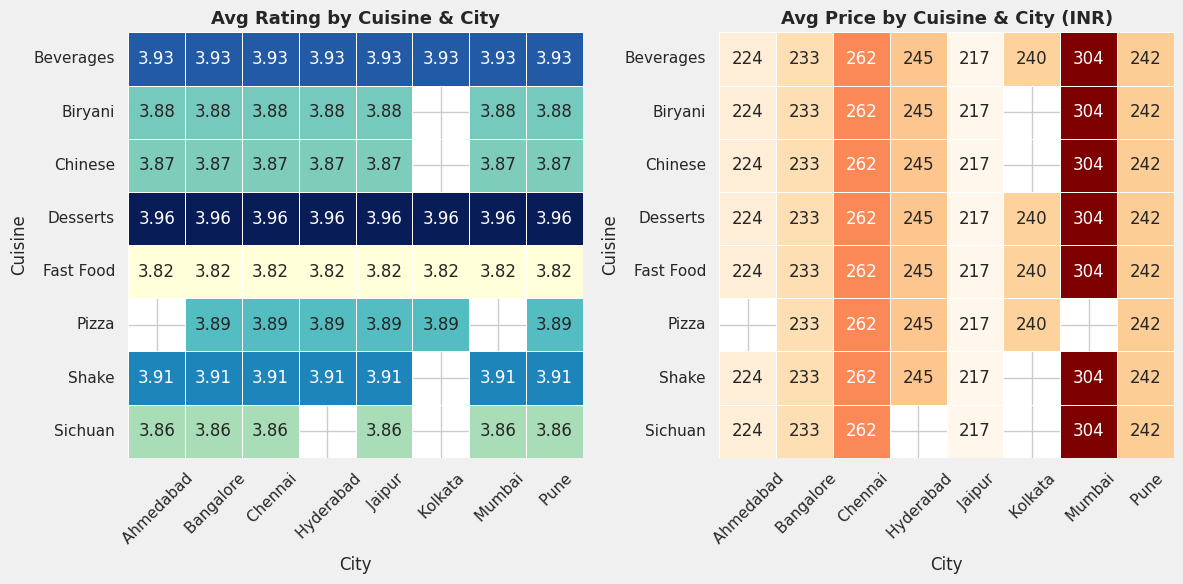

In [355]:
#⭐
# Limit to top cuisines and cities for readability
top_cuisines = zomato['Cuisine'].value_counts().head(8).index
top_cities = zomato['City'].value_counts().head(8).index
data = zomato[zomato['Cuisine'].isin(top_cuisines) & zomato['City'].isin(top_cities)]

# Create pivot tables
pivot_rating = data.pivot_table(values='Avg_Rating_Cuisine', index='Cuisine', columns='City', aggfunc='mean')
pivot_price = data.pivot_table(values='Avg_Price_City', index='Cuisine', columns='City', aggfunc='mean')

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12,6), facecolor='#f0f0f0')

sns.heatmap(pivot_rating, cmap='YlGnBu', annot=True, fmt='.2f', ax=axes[0], cbar=False, linewidths=0.4)
axes[0].set_title('Avg Rating by Cuisine & City', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

sns.heatmap(pivot_price, cmap='OrRd', annot=True, fmt='.0f', ax=axes[1], cbar=False, linewidths=0.4)
axes[1].set_title('Avg Price by Cuisine & City (INR)', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

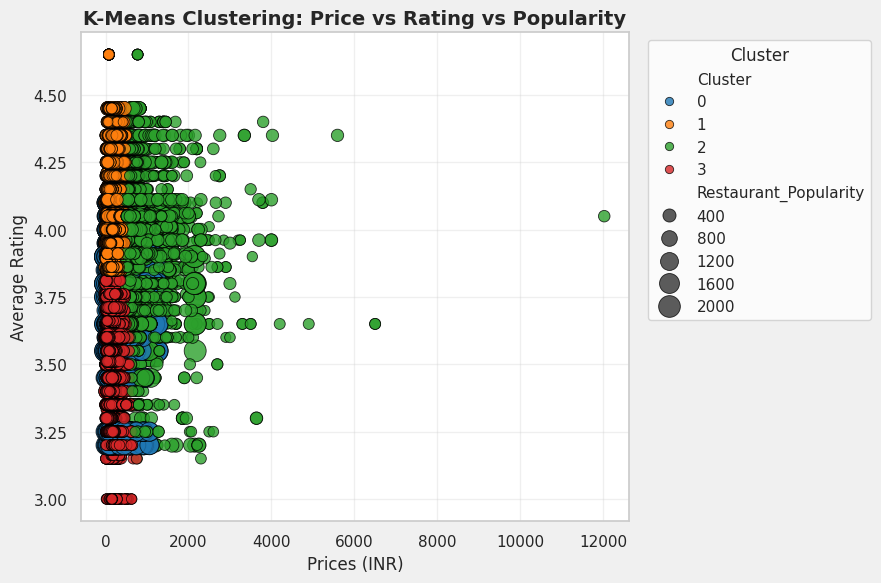

In [356]:
#⭐
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = zomato[['Prices','Average_Rating','Restaurant_Popularity']].dropna()
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
zomato['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(9,6), facecolor='#f0f0f0')
sns.scatterplot(data=zomato, x='Prices', y='Average_Rating', hue='Cluster', size='Restaurant_Popularity', palette='tab10', sizes=(50,250), alpha=0.8, edgecolor='black')
plt.title('K-Means Clustering: Price vs Rating vs Popularity', fontsize=14, fontweight='bold')
plt.xlabel('Prices (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.02,1), loc='upper left'); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

**INSIGHTS**

* Ratings by cuisine are remarkably stable across cities, with desserts near ~3.96 universally, shakes ~3.91, beverages ~3.93, and fast food lowest ~3.82.​

* Price heatmap shows a clear metro premium, especially in Mumbai (~₹304 across cuisines) versus ~₹224–₹262 elsewhere, with similar ratings, indicating location‑driven pricing power rather than quality gains.​

* The best value sweet spots by place are mid prices (~₹217–₹262) paired with top ratings for desserts/shakes/beverages across top cities.​

* Clustering on price–rating–popularity yields a large mid‑market cluster (Cluster 2) spanning most observations, plus small low‑price/low‑rating and high‑price pockets, reinforcing the mid‑market opportunity.

#**10. Exploratory Data Analysis - Some Hypothetical Analysis**

##**A. Market Entry Simulation (Best City–Cuisine Combination)**
Goal: Predict which city–cuisine pair gives the highest expected rating and lowest price volatility.

**Business Potential Index (BPI)= (Avg Rating × Popularity) / Price​**

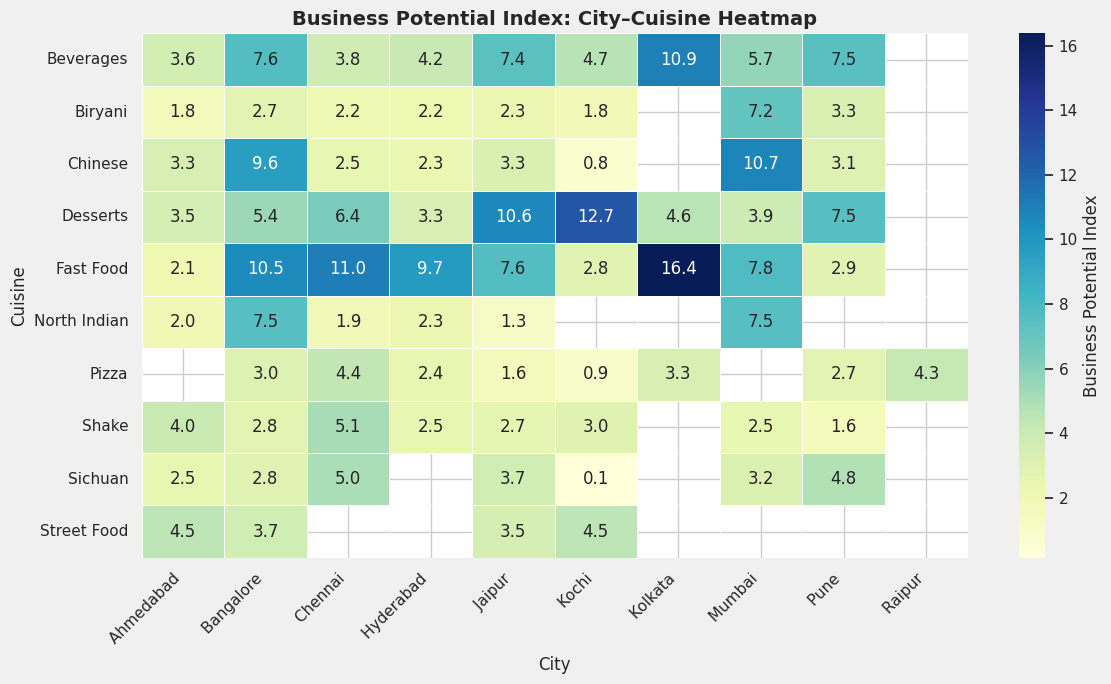

In [357]:
# Compute Business Potential Index (BPI)
zomato['BPI'] = (zomato['Avg_Rating_Cuisine'] * zomato['Restaurant_Popularity']) / zomato['Avg_Price_Cuisine']

# Limit to top 10 cities & cuisines for clarity
top_cities = zomato['City'].value_counts().head(10).index
top_cuisines = zomato['Cuisine'].value_counts().head(10).index

bpi_data = zomato[zomato['City'].isin(top_cities) & zomato['Cuisine'].isin(top_cuisines)]
pivot_bpi = bpi_data.pivot_table(values='BPI', index='Cuisine', columns='City', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12,7), facecolor='#f0f0f0')
sns.heatmap(pivot_bpi, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label':'Business Potential Index'})
plt.title('Business Potential Index: City–Cuisine Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12); plt.ylabel('Cuisine', fontsize=12)
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

**INSIGHTS**

* The highest single opportunity is Fast Food in Kolkata, materially above all other pairs, indicating outsized headroom in that market–category.​

* Dessert plays are strong in Kochi and Jaipur, suggesting a sweets/dessert brand can scale across multiple cities with favorable potential.​

* Beverages in Kolkata and Chinese in Mumbai present metro-scale opportunities where demand depth and competitive gaps align.​

* Bangalore shows multi-category strength (Fast Food ≈10.5 and Chinese ≈9.6), making it a robust second-wave hub for cross-category rollout.

##**B. Cuisine Market Gap Analysis**
Goal: Identify cuisines that are highly rated but underrepresented (low availability, high demand potential).

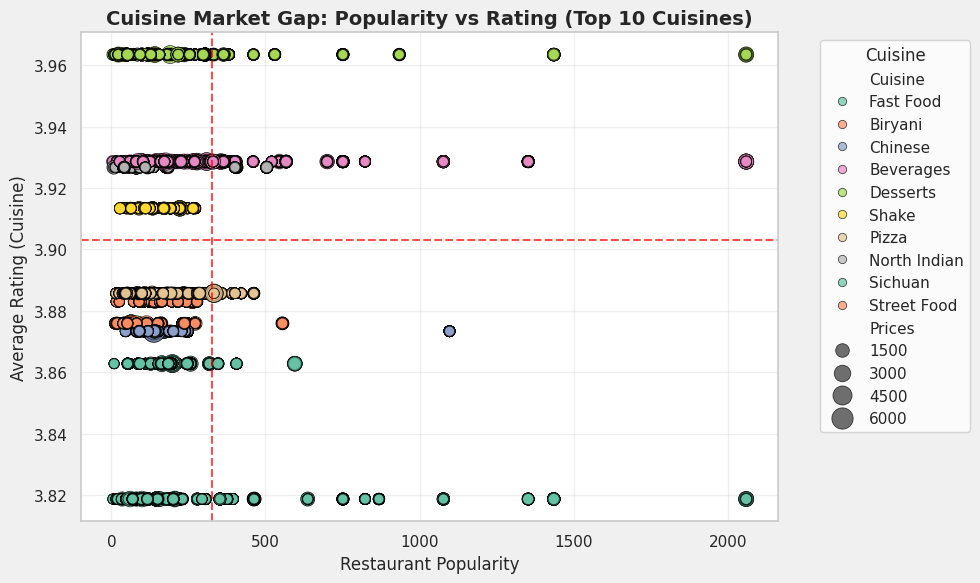

In [358]:
top_cuisines = zomato['Cuisine'].value_counts().head(10).index
subset = zomato[zomato['Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(10,6), facecolor='#f0f0f0')
sns.scatterplot(data=subset, x='Restaurant_Popularity', y='Avg_Rating_Cuisine', hue='Cuisine', size='Prices',
                sizes=(50,250), alpha=0.7, edgecolor='black', palette='Set2')
plt.axvline(subset['Restaurant_Popularity'].mean(), color='red', linestyle='--', alpha=0.7)
plt.axhline(subset['Avg_Rating_Cuisine'].mean(), color='red', linestyle='--', alpha=0.7)
plt.title('Cuisine Market Gap: Popularity vs Rating (Top 10 Cuisines)', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Popularity', fontsize=12); plt.ylabel('Average Rating (Cuisine)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cuisine')
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

**INSIGHTS**

* High rating, high popularity: beverages and desserts cluster above the 3.9 line with points extending far right, indicating strong consumer approval at scale.​

* High rating, low popularity: shakes and some dessert/beverage pockets sit above 3.9 but left of the popularity cut, suggesting under-served niches with room to add supply.​

* Low rating, high popularity: fast food and North Indian lie below 3.9 while spanning to the far right, signaling crowded categories where better execution can win share.​

* Low rating, low popularity: Sichuan and parts of biryani/chinese cohorts remain below 3.9 and under 300 popularity, indicating higher risk for immediate scale.​

* Price signals: bubble sizes are comparable across cuisines at similar popularity bands, implying perceived value rather than absolute price is driving rating differentials.

##**C. Restaurant Segment Profiling (Clustering)**
Goal: Identify natural market segments

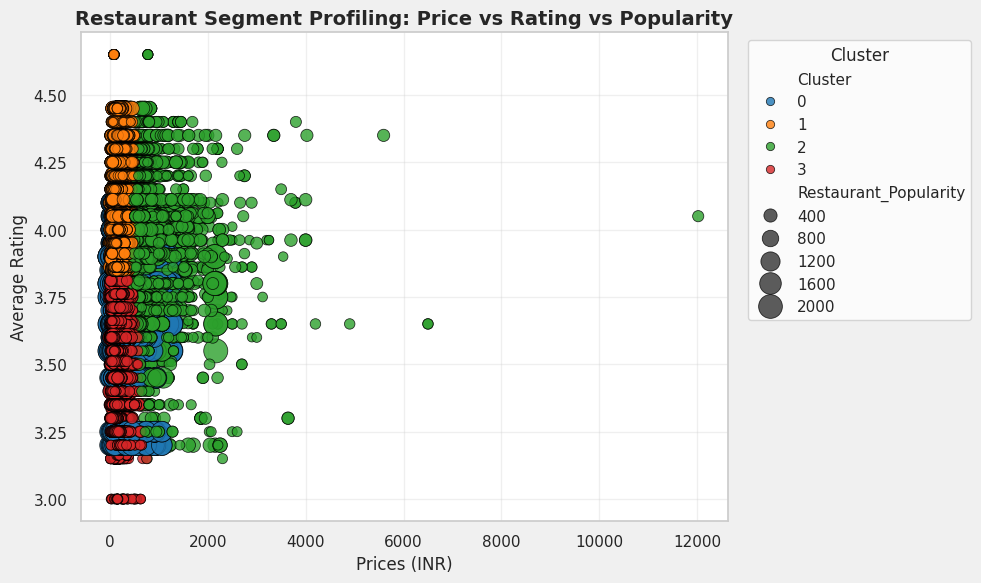

In [359]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data
X = zomato[['Prices','Average_Rating','Restaurant_Popularity']].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
zomato['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10,6), facecolor='#f0f0f0')
sns.scatterplot(data=zomato, x='Prices', y='Average_Rating', hue='Cluster', size='Restaurant_Popularity', palette='tab10', sizes=(40,300), alpha=0.8, edgecolor='black')
plt.title('Restaurant Segment Profiling: Price vs Rating vs Popularity', fontsize=14, fontweight='bold')
plt.xlabel('Prices (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

**INSIGHTS**

* Cluster pattern shows most restaurants under ₹1,500 with ratings concentrated between 3.2–4.1, indicating mid‑price is the dominant battlefield.​

* A distinct low‑price, high‑rating band exists (several points ≥4.3 at very low prices), signaling “value heroes” that win on price‑to‑quality.​

* A red cluster sits at low price with 3.0–3.4 ratings, marking budget underperformers that struggle to convert reputation into demand.​

* Premium outliers reach very high prices with mixed ratings (some ≈4.0+, many ≤4.0) and low density, implying limited but upsell‑worthy niches.

##**D. Price Elasticity Simulation**
Goal: Estimate how changing prices could affect expected ratings and votes (as a proxy for demand).

<Figure size 1200x600 with 0 Axes>

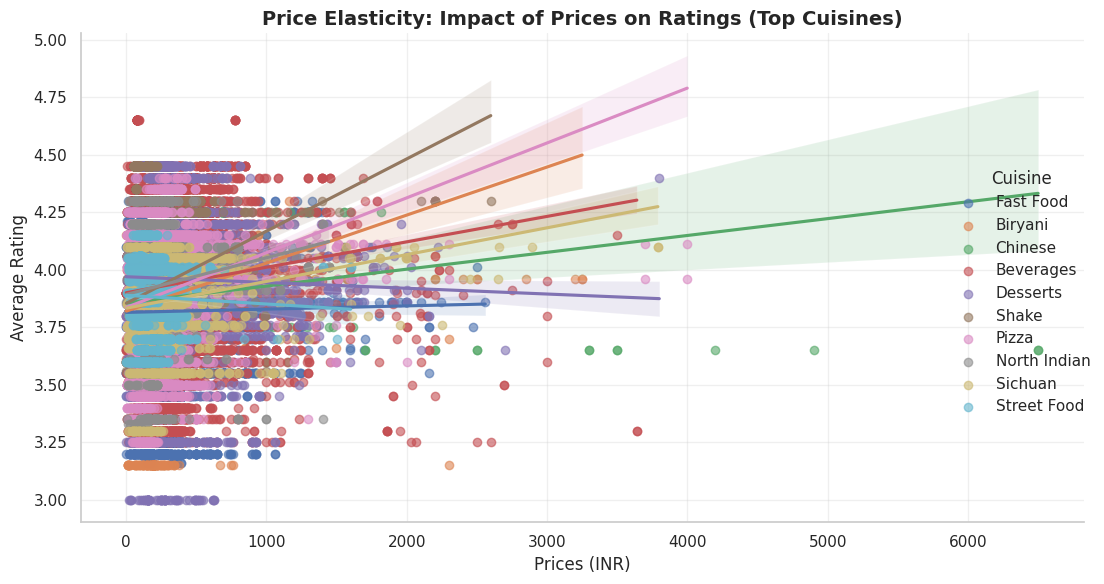

In [360]:
plt.figure(figsize=(12,6), facecolor='#f0f0f0')
sns.lmplot(x='Prices', y='Average_Rating', hue='Cuisine', data=zomato[zomato['Cuisine'].isin(top_cuisines)], height=6, aspect=1.6, scatter_kws={'alpha':0.6})
plt.title('Price Elasticity: Impact of Prices on Ratings (Top Cuisines)', fontsize=14, fontweight='bold')
plt.xlabel('Prices (INR)', fontsize=12); plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

**INSIGHTS**

* Positive elasticity: beverages and pizza regression lines rise with price, meaning premium positioning is tolerated and can co-exist with better ratings.​

* Flat elasticity: desserts and shakes show nearly horizontal trend lines, indicating ratings are independent of price and driven by execution quality alone.​

* Negative elasticity: fast food, North Indian, and street food trend slightly downward as price rises, suggesting customers penalize premium pricing in categories perceived as value plays.​

* Dense low‑price clusters: most observations sit under ₹500 with ratings spread 3.0–4.5, confirming low‑price mass‑market is the volume driver and high‑price plays are sparse.

#**11. Exploratory Data Analysis - Top N & Bottom N Analysis.**

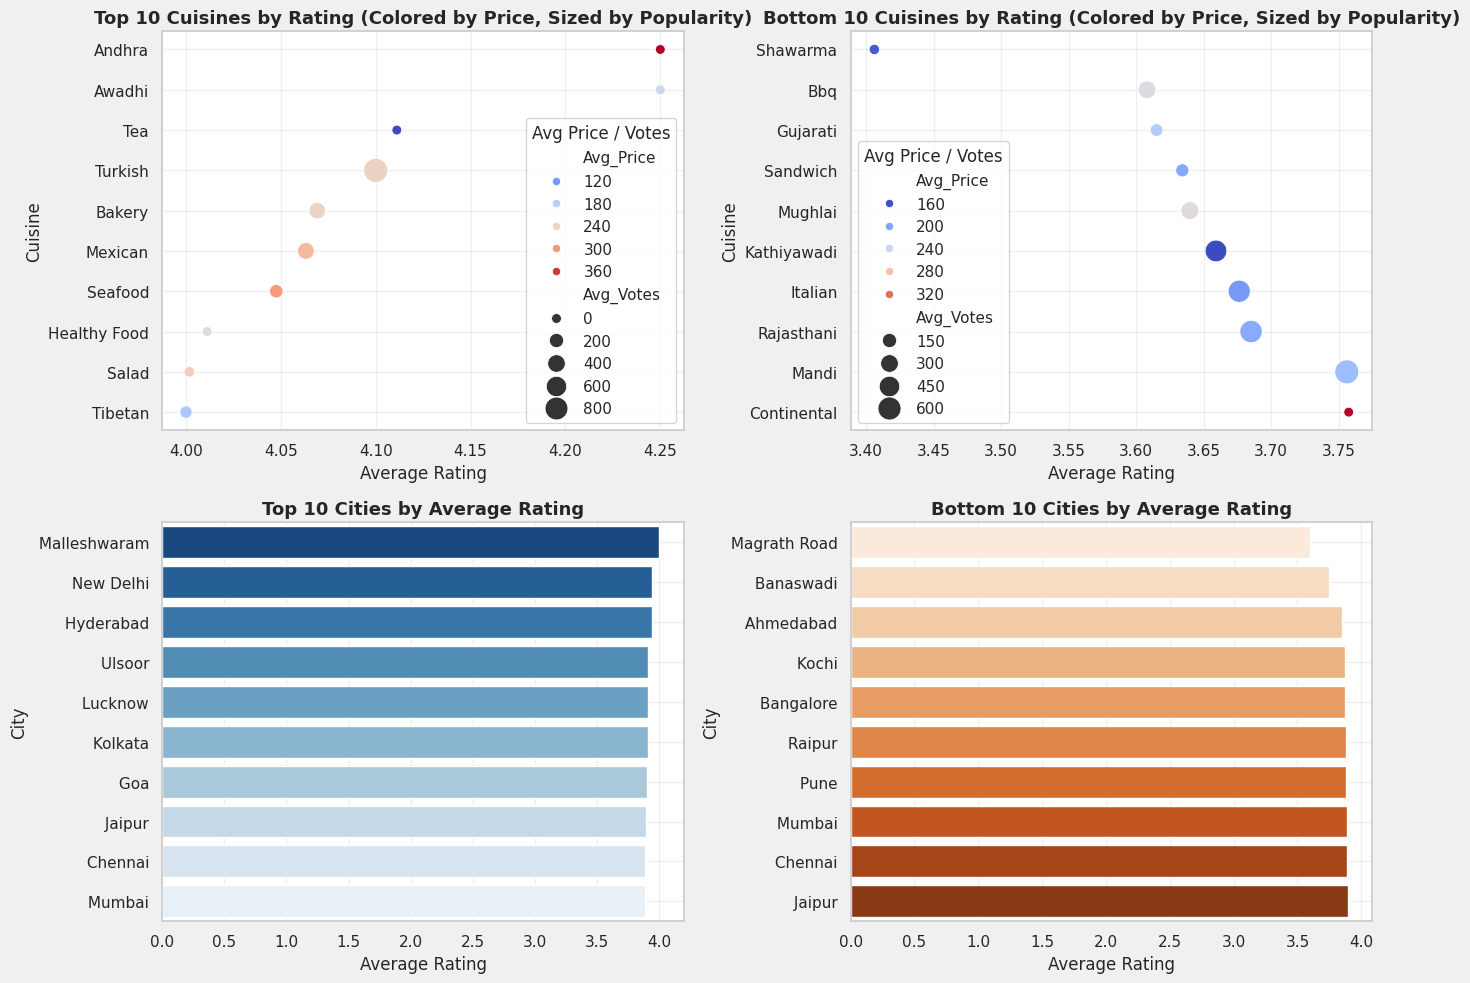

In [361]:
plt.figure(figsize=(14,10), facecolor='#f0f0f0')

# ---------- 1️⃣ Cuisine-level aggregation ----------
cuisine_agg = zomato.groupby('Cuisine').agg({
    'Average_Rating':'mean',
    'Prices':'mean',
    'Total_Votes':'mean'
}).reset_index().rename(columns={'Prices':'Avg_Price','Total_Votes':'Avg_Votes'})

top_cuisines = cuisine_agg.nlargest(10,'Average_Rating')
bottom_cuisines = cuisine_agg.nsmallest(10,'Average_Rating')

# ---------- 2️⃣ City-level aggregation ----------
city_agg = zomato.groupby('City').agg({'Average_Rating':'mean'}).reset_index()
top_cities = city_agg.nlargest(10,'Average_Rating')
bottom_cities = city_agg.nsmallest(10,'Average_Rating')

# ---------- Plot 1: Top 10 Cuisines ----------
plt.subplot(2,2,1)
sns.scatterplot(data=top_cuisines, x='Average_Rating', y='Cuisine', size='Avg_Votes', hue='Avg_Price', palette='coolwarm', sizes=(50,300))
plt.title('Top 10 Cuisines by Rating (Colored by Price, Sized by Popularity)', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Cuisine'); plt.legend(title='Avg Price / Votes'); plt.grid(alpha=0.3)

# ---------- Plot 2: Bottom 10 Cuisines ----------
plt.subplot(2,2,2)
sns.scatterplot(data=bottom_cuisines, x='Average_Rating', y='Cuisine', size='Avg_Votes', hue='Avg_Price', palette='coolwarm', sizes=(50,300))
plt.title('Bottom 10 Cuisines by Rating (Colored by Price, Sized by Popularity)', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Cuisine'); plt.legend(title='Avg Price / Votes'); plt.grid(alpha=0.3)

# ---------- Plot 3: Top 10 Cities ----------
plt.subplot(2,2,3)
sns.barplot(data=top_cities, y='City', x='Average_Rating', palette='Blues_r')
plt.title('Top 10 Cities by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('City'); plt.grid(alpha=0.3)

# ---------- Plot 4: Bottom 10 Cities ----------
plt.subplot(2,2,4)
sns.barplot(data=bottom_cities, y='City', x='Average_Rating', palette='Oranges')
plt.title('Bottom 10 Cities by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('City'); plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

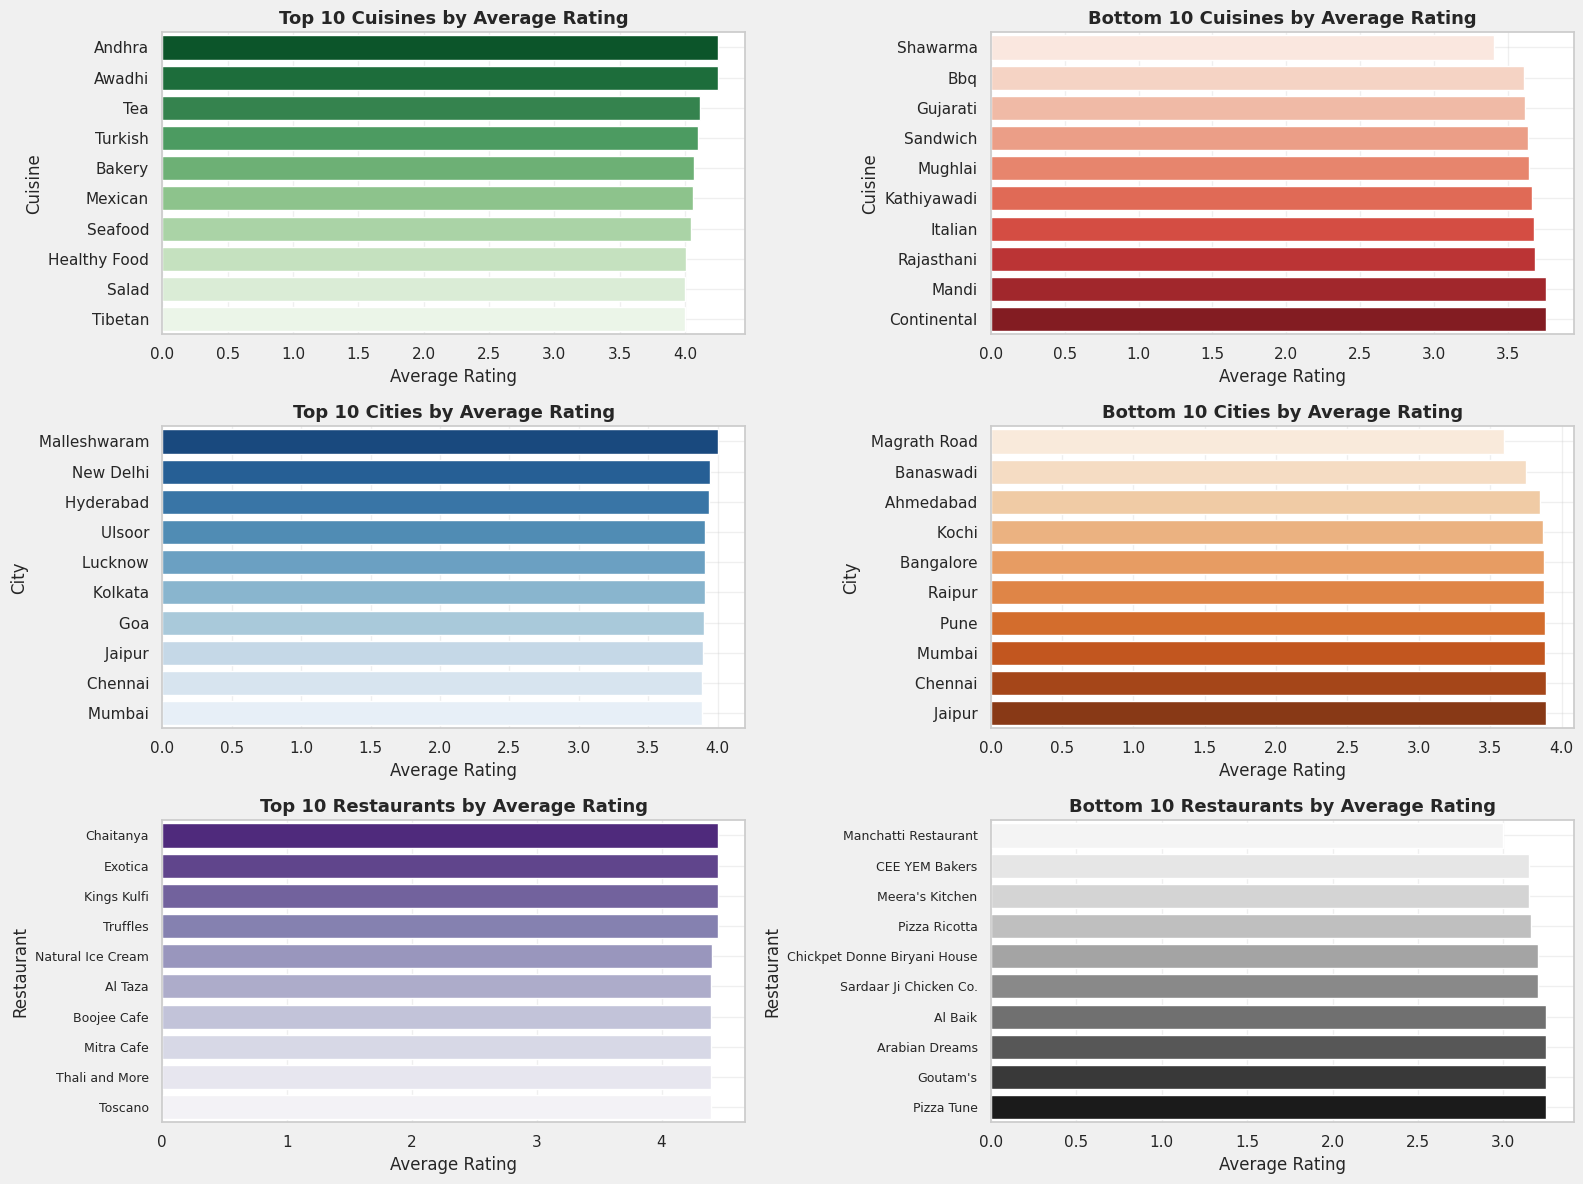

In [362]:
plt.figure(figsize=(16,12), facecolor='#f0f0f0')

# ===== 1️⃣ CUISINE ANALYSIS =====
cuisine_agg = zomato.groupby('Cuisine').agg({'Average_Rating':'mean','Prices':'mean','Total_Votes':'mean'}).reset_index()
top_cuisines = cuisine_agg.nlargest(10,'Average_Rating')
bottom_cuisines = cuisine_agg.nsmallest(10,'Average_Rating')

# Top Cuisines
plt.subplot(3,2,1)
sns.barplot(data=top_cuisines, y='Cuisine', x='Average_Rating', palette='Greens_r')
plt.title('Top 10 Cuisines by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Cuisine'); plt.grid(alpha=0.3)

# Bottom Cuisines
plt.subplot(3,2,2)
sns.barplot(data=bottom_cuisines, y='Cuisine', x='Average_Rating', palette='Reds')
plt.title('Bottom 10 Cuisines by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Cuisine'); plt.grid(alpha=0.3)

# ===== 2️⃣ CITY ANALYSIS =====
city_agg = zomato.groupby('City').agg({'Average_Rating':'mean','Avg_Price_City':'mean','Restaurant_Popularity':'mean'}).reset_index()
top_cities = city_agg.nlargest(10,'Average_Rating')
bottom_cities = city_agg.nsmallest(10,'Average_Rating')

# Top Cities
plt.subplot(3,2,3)
sns.barplot(data=top_cities, y='City', x='Average_Rating', palette='Blues_r')
plt.title('Top 10 Cities by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('City'); plt.grid(alpha=0.3)

# Bottom Cities
plt.subplot(3,2,4)
sns.barplot(data=bottom_cities, y='City', x='Average_Rating', palette='Oranges')
plt.title('Bottom 10 Cities by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('City'); plt.grid(alpha=0.3)

# ===== 3️⃣ RESTAURANT ANALYSIS =====
rest_agg = zomato.groupby('Restaurant_Name').agg({'Avg_Rating_Restaurant':'mean','Avg_Price_Restaurant':'mean','Total_Votes':'mean'}).reset_index()
top_rest = rest_agg.nlargest(10,'Avg_Rating_Restaurant')
bottom_rest = rest_agg.nsmallest(10,'Avg_Rating_Restaurant')

# Top Restaurants
plt.subplot(3,2,5)
sns.barplot(data=top_rest, y='Restaurant_Name', x='Avg_Rating_Restaurant', palette='Purples_r')
plt.title('Top 10 Restaurants by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Restaurant'); plt.grid(alpha=0.3)
plt.yticks(fontsize=9)

# Bottom Restaurants
plt.subplot(3,2,6)
sns.barplot(data=bottom_rest, y='Restaurant_Name', x='Avg_Rating_Restaurant', palette='Greys')
plt.title('Bottom 10 Restaurants by Average Rating', fontsize=13, fontweight='bold')
plt.xlabel('Average Rating'); plt.ylabel('Restaurant'); plt.grid(alpha=0.3)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

**INSIGHTS**

* Top cuisines by rating are Andhra, Awadhi, Tea, Turkish, Bakery, Mexican, Seafood, Healthy Food, Salad, and Tibetan, clustering around ~4.0–4.25 with bubble sizes suggesting solid popularity at moderate prices.​

* Bottom cuisines by rating include Continental, Mandi, Rajasthani, Italian, Kathiyawadi, Mughlai, Sandwich, Gujarati, BBQ, and Shawarma, indicating execution risk if used as primary launch pillars.​

* Higher‑rated cities/localities are led by Malleswaram and New Delhi, with Hyderabad and Ulsoor close behind; the “bottom 10” still hover near ~3.9, showing overall city differences are subtle.​

* Top restaurants by rating are dominated by dessert/ice‑cream/café brands (e.g., Kings Kulfi, Natural Ice Cream, Truffles, Boojee Cafe), reinforcing sweets/beverages as reliable high‑rating categories.

#**12. Final Recommendation**

Launch a mid‑price, delivery‑first, hero‑SKU brand that wins on value‑for‑money and fast social proof, targeting 4.2+ ratings and rapid vote velocity in a handful of proven hotspots before rolling out citywide.​

Anchor pricing at ₹199–₹299 with an entry at ≤₹199 and selective premiums at ≥₹349, while keeping 70–80% of the menu “not expensive” versus local reference to maximize conversion.​

##**A. Positioning and pricing**

* Position in the mid‑range (₹150–₹300 per customer) where demand density and vote volume are highest; avoid broad premium positioning unless tied to a distinct experience pillar.​

* Set a three‑tier price architecture: entry anchors (≤₹199) for trial, core anchors (₹199–₹299) for volume, and limited premium heroes (₹349–₹399) for ARPU without shifting value perception.​

* Engineer bundles and “good‑better‑best” versions to drive Price_per_Vote into lower deciles; change pack size or bundle structure before list price whenever ratings slip.​

##**B. Menu architecture**

* Launch with 10–15 hero SKUs and a total 40–80 high‑velocity items, avoiding oversized catalogs and long/complex combo names to consolidate discovery and votes.​

* Core mix for traction: beverages, desserts, shakes, pizza, fast food, and biryani; add niche‑premium signatures from bakery, seafood, or Turkish for differentiation and upsell.​

* Mark 3–5 items as BESTSELLER/MUST TRY on day one, keep 70–80% of SKUs priced “not expensive,” and defer ultra‑niche items to rotating specials after scale.​

##**C. Channel strategy**

* Operate delivery‑first with packaging that preserves heat, texture, and integrity; standardize speed SLAs and aggregator playbooks for offers, imagery, and review prompts.​

* In dine‑leaning cities run a hybrid (great dining plus optimized delivery), but still prioritize delivery‑friendly categories where channel ratings meet or beat dine‑in.​

* Build a vote‑velocity engine: one‑tap reviews at delivery completion, 24–48h reminders, light incentives, and rapid owner responses to compound recency and volume.​

##**D. Geography and rollout**

* Open first nodes in Abids, Gomti Nagar, Charminar, and Egmore to pair 4.0+ ratings with mid‑market price points and strong discovery.​

* City phasing: Phase 1 Kolkata (Fast Food primary + Beverages satellite), Phase 2 Kochi (Desserts) and Chennai (Fast Food), Phase 3 Mumbai (Chinese‑led) and Jaipur (Desserts), with Bangalore as the multi‑brand hub.​

* Within each city, use delivery‑radius coverage to tap adjacent micro‑markets before adding dine‑in formats.​

##**E. Quality moat and SOPs**

* Operate for 4.2+ across Dining_Rating and Delivery_Rating, recognizing small uplifts are highly differentiating in compressed distributions.​

* Build SOPs on tangibles, reliability, responsiveness, assurance, and empathy; audit taste variance, ticket times, and recovery scripts; run mystery orders in underperforming localities.​

* Standardize eco‑friendly, reinforced packaging and measure temperature‑at‑open and pack integrity to close the delivery–dine gap.​

##**F. Growth loops and social proof**

* Target early thresholds: Delivery_Votes >23 in weeks 1–2, Dining_Votes >217 and Total_Votes >447 in weeks 3–6, using sampling, bundles, and limited‑time discounts.​

* Prune or rework SKUs stuck in Low Popularity (<196) and scale winners past High Popularity (>318) across localities.​

* Use NEW badges for 2–3 weeks, then consolidate traffic to BESTSELLER tags once velocity is established.​

##**G. Financial guardrails**

* Control COGS with tight vendor specs and portion control; push margin through bundles, add‑ons, and signatures instead of headline price hikes that risk rating drag.​

* Keep the assortment lean and monitor contribution by SKU; double down on the top 20% of items that deliver most votes and profit.​

* Track Price_per_Vote and contribution margin jointly; aim to sit below local PPV medians while maintaining target margins via engineered packs.​

##**H. City–cuisine–price fit**

* Price near local medians (≈₹220–₹260) in target hotspots; reserve metro‑premium tests (e.g., Mumbai ₹299–₹329 for beverages/pizza) for positive‑elasticity categories.​

* Localize lightly: Andhra/Seafood in Bangalore; Pizza/Healthy/Mithai in Chennai; Biryani/Desserts/Wraps in Hyderabad; Mithai/Kebab/Turkish in Jaipur; Pizza/Wraps/Turkish in Mumbai.​

* Avoid leading with fast food in new markets unless delivery ops are best‑in‑class; keep it as an add‑on where desserts/shakes anchor demand.​

##**I. 90‑day operating plan and KPIs**

* Weeks 0–2: go live with 10–15 hero SKUs, delivery packaging, NEW badges, and entry/core price anchors; hit Delivery_Votes >23 per hero and on‑time >90%.​

* Weeks 3–6: expand bundles, shift tags to BESTSELLER, prune laggards, and drive Dining_Votes >217 and Total_Votes >447 per hero; ratings trending ≥4.2.​

* Weeks 7–12: replicate winners to a second node, add 1–2 premium signatures, and run city‑specific ±5–10% price tests with halt rules (popularity drop >10% or rating delta ≤0.05).​

* Dashboard: blended rating, delivery vs dine gap, Price_per_Vote, vote velocity, repeat rate, CAC payback, AOV, item‑level contribution, and on‑time/pack‑integrity metrics.​

##**J. Risk controls**

* Competitive shields: stay inside mid‑price clusters while exceeding channel ratings; avoid direct fights with national QSRs on breadth—win on speed, value, and localized heroes.​

* Elasticity management: apply premium only to positive‑elasticity cuisines (beverages/pizza), lock value pricing for negative‑elasticity ones (fast food/North Indian/street food).​

* Expansion discipline: enter new localities only after hitting node‑level KPIs for rating ≥4.2, repeat ≥35%, and stable PPV below market median for 4 consecutive weeks.